# Machine Learning Practical: Coursework 1

**Release date: Monday 10th October 2016**  
**Due date: 16:00 Thursday 27th October 2016**

Instructions for the coursework are [available as a PDF here](http://www.inf.ed.ac.uk/teaching/courses/mlp/2016/coursework_1.pdf).

## Part 1: Learning rate schedules

In [19]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [20]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

### Define function to train model and plot statistics

In [21]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedulers):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, schedulers)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

### Set-up

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropyError, CrossEntropySoftmaxError
from mlp.models import SingleLayerModel, MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, UniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.data_providers import MNISTDataProvider
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler, ExponentialLearningRateScheduler
%matplotlib inline
plt.style.use('ggplot')

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', rng=rng)
valid_data = MNISTDataProvider('valid', rng=rng)

### Constant learning rate baseline


--------------------------------------------------------------------------------
learning_rate=0.05 init_scale=0.10
--------------------------------------------------------------------------------


Epoch 5: 0.88s to complete
    error(train)=3.35e-01, acc(train)=9.06e-01, error(valid)=3.12e-01, acc(valid)=9.11e-01
Epoch 10: 1.43s to complete
    error(train)=2.50e-01, acc(train)=9.27e-01, error(valid)=2.37e-01, acc(valid)=9.31e-01
Epoch 15: 1.21s to complete
    error(train)=2.03e-01, acc(train)=9.41e-01, error(valid)=1.95e-01, acc(valid)=9.45e-01
Epoch 20: 0.94s to complete
    error(train)=1.69e-01, acc(train)=9.51e-01, error(valid)=1.67e-01, acc(valid)=9.54e-01
Epoch 25: 1.21s to complete
    error(train)=1.44e-01, acc(train)=9.58e-01, error(valid)=1.48e-01, acc(valid)=9.60e-01
Epoch 30: 1.67s to complete
    error(train)=1.24e-01, acc(train)=9.64e-01, error(valid)=1.34e-01, acc(valid)=9.62e-01
Epoch 35: 2.55s to complete
    error(train)=1.09e-01, acc(train)=9.69e-01, error(valid)=1.24e-01, acc(valid)=9.66e-01
Epoch 40: 1.03s to complete
    error(train)=9.52e-02, acc(train)=9.73e-01, error(valid)=1.15e-01, acc(valid)=9.67e-01
Epoch 45: 1.14s to complete
    error(train)=8.36

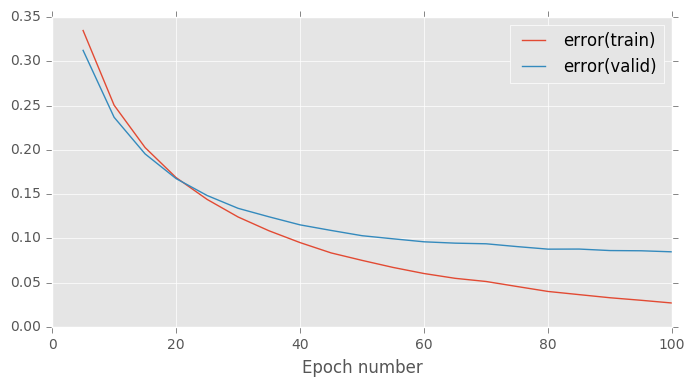

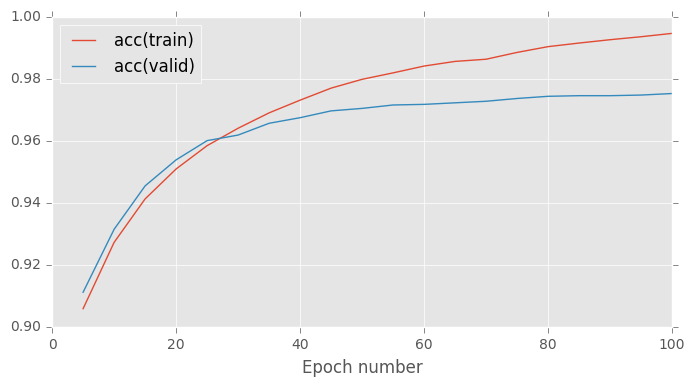

    final error(train) = 2.70e-02
    final error(valid) = 8.48e-02
    final acc(train)   = 9.95e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.42s


In [27]:
# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rate = 0.05 # learning rate for gradient descent
input_dim, output_dim, hidden_dim = 784, 10, 100

schedulers = [ConstantLearningRateScheduler(learning_rate)]

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

init_scale = 0.1  # scale for random parameter initialisation
final_errors_train = []
final_errors_valid = []
final_accs_train = []
final_accs_valid = []

print('-' * 80)
print('learning_rate={0:.2f} init_scale={1:.2f}'
      .format(learning_rate, init_scale))
print('-' * 80)
# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a parameter initialiser which will sample random uniform values
# from [-init_scale, init_scale]
param_init = UniformInit(-init_scale, init_scale, rng=rng)

# Create a model with two affine layers
hidden_dim = 100
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

# Initialise a cross entropy error object
error = CrossEntropySoftmaxError()

# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedulers)

plt.show()

print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

final_errors_train.append(stats[-1, keys['error(train)']])
final_errors_valid.append(stats[-1, keys['error(valid)']])
final_accs_train.append(stats[-1, keys['acc(train)']])
final_accs_valid.append(stats[-1, keys['acc(valid)']])

In [30]:
print 'final error (train): '
print final_errors_train
print '\n'

print 'final error (valid): '
print final_errors_valid
print '\n'

print 'final accuracy (train): '
print final_accs_train
print '\n'

print 'final accuracy (valid): '
print final_accs_valid
print '\n'

print 'run time:'
print run_time
print '\n'

final error (train): 
[0.027009221068124065]


final error (valid): 
[0.084797542734579637]


final accuracy (train): 
[0.99470000000000303]


final accuracy (valid): 
[0.97529999999999861]


run time:
141.769266129




In [ ]:
def update_params(self, grads_wrt_params):
        for param, delta_param, SSG, grad in zip(self.params, self.delta_params, self.SSGs, grads_wrt_params):                       
            SSG += grad**2 #sum squared gradient
            delta_param += -float(self.learning_rate)*grad/(np.sqrt(SSG) + 1.0e-6) 
            param += delta_param
    def update_params(self, grads_wrt_params):
        for param, sq_grad, grad in zip(self.params, self.sq_grads, grads_wrt_params):
            sq_grad += grad**2
            param += -self.learning_rate / (np.sqrt(sq_grad) + 1e-08) * grad

### Using exponential scheduler

--------------------------------------------------------------------------------
learning_rate=0.07 init_scale=0.10 r=16
--------------------------------------------------------------------------------


Epoch 5: 0.88s to complete
    error(train)=3.15e-01, acc(train)=9.10e-01, error(valid)=2.94e-01, acc(valid)=9.16e-01
Epoch 10: 1.33s to complete
    error(train)=2.50e-01, acc(train)=9.27e-01, error(valid)=2.37e-01, acc(valid)=9.31e-01
Epoch 15: 0.90s to complete
    error(train)=2.15e-01, acc(train)=9.38e-01, error(valid)=2.06e-01, acc(valid)=9.42e-01
Epoch 20: 0.90s to complete
    error(train)=1.97e-01, acc(train)=9.43e-01, error(valid)=1.90e-01, acc(valid)=9.47e-01
Epoch 25: 0.89s to complete
    error(train)=1.85e-01, acc(train)=9.47e-01, error(valid)=1.80e-01, acc(valid)=9.50e-01
Epoch 30: 0.94s to complete
    error(train)=1.77e-01, acc(train)=9.49e-01, error(valid)=1.73e-01, acc(valid)=9.52e-01
Epoch 35: 0.97s to complete
    error(train)=1.71e-01, acc(train)=9.51e-01, error(valid)=1.69e-01, acc(valid)=9.53e-01
Epoch 40: 0.90s to complete
    error(train)=1.67e-01, acc(train)=9.52e-01, error(valid)=1.66e-01, acc(valid)=9.54e-01
Epoch 45: 0.90s to complete
    error(train)=1.64

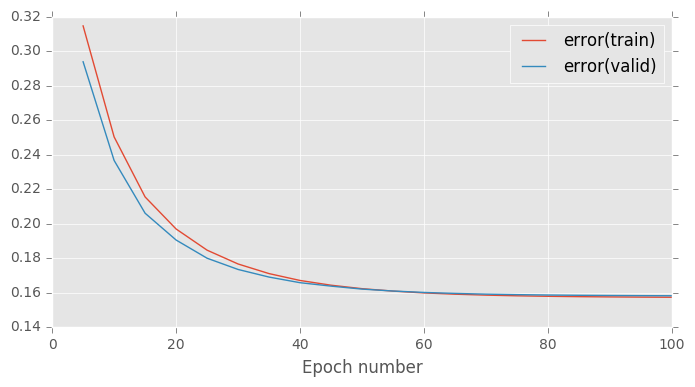

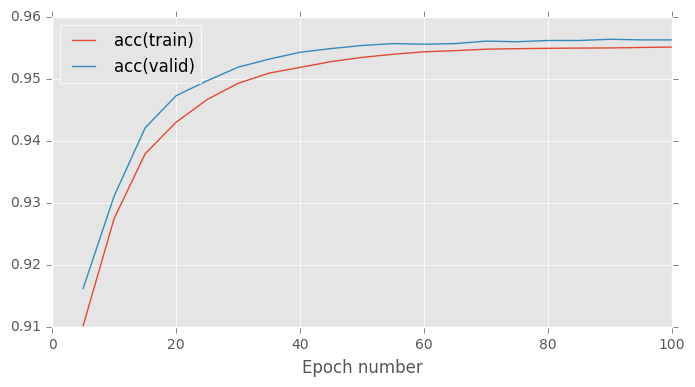

    final error(train) = 1.57e-01
    final error(valid) = 1.58e-01
    final acc(train)   = 9.55e-01
    final acc(valid)   = 9.56e-01
    run time per epoch = 1.17s
--------------------------------------------------------------------------------
learning_rate=0.07 init_scale=0.10 r=50
--------------------------------------------------------------------------------


Epoch 5: 1.35s to complete
    error(train)=3.05e-01, acc(train)=9.12e-01, error(valid)=2.85e-01, acc(valid)=9.18e-01
Epoch 10: 0.96s to complete
    error(train)=2.31e-01, acc(train)=9.33e-01, error(valid)=2.20e-01, acc(valid)=9.37e-01
Epoch 15: 0.96s to complete
    error(train)=1.85e-01, acc(train)=9.47e-01, error(valid)=1.80e-01, acc(valid)=9.50e-01
Epoch 20: 0.93s to complete
    error(train)=1.58e-01, acc(train)=9.55e-01, error(valid)=1.59e-01, acc(valid)=9.55e-01
Epoch 25: 1.79s to complete
    error(train)=1.37e-01, acc(train)=9.60e-01, error(valid)=1.43e-01, acc(valid)=9.61e-01
Epoch 30: 2.03s to complete
    error(train)=1.22e-01, acc(train)=9.64e-01, error(valid)=1.33e-01, acc(valid)=9.63e-01
Epoch 35: 0.86s to complete
    error(train)=1.12e-01, acc(train)=9.69e-01, error(valid)=1.25e-01, acc(valid)=9.66e-01
Epoch 40: 0.87s to complete
    error(train)=1.03e-01, acc(train)=9.71e-01, error(valid)=1.19e-01, acc(valid)=9.66e-01
Epoch 45: 0.87s to complete
    error(train)=9.52

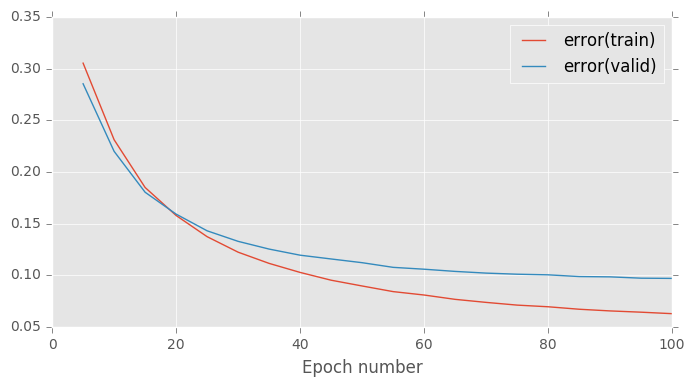

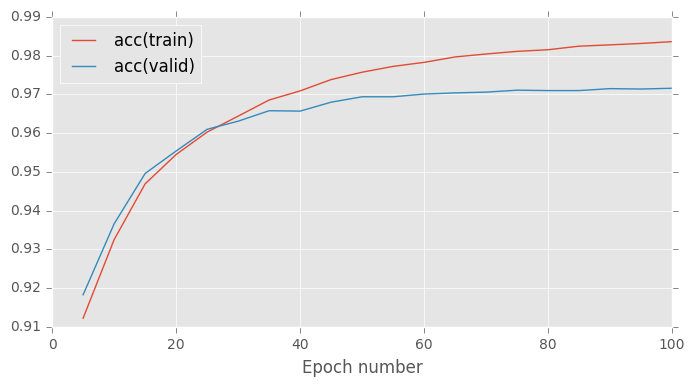

    final error(train) = 6.28e-02
    final error(valid) = 9.70e-02
    final acc(train)   = 9.84e-01
    final acc(valid)   = 9.72e-01
    run time per epoch = 1.26s
--------------------------------------------------------------------------------
learning_rate=0.07 init_scale=0.10 r=150
--------------------------------------------------------------------------------


Epoch 5: 1.12s to complete
    error(train)=3.02e-01, acc(train)=9.13e-01, error(valid)=2.83e-01, acc(valid)=9.19e-01
Epoch 10: 0.99s to complete
    error(train)=2.25e-01, acc(train)=9.34e-01, error(valid)=2.15e-01, acc(valid)=9.39e-01
Epoch 15: 1.23s to complete
    error(train)=1.75e-01, acc(train)=9.49e-01, error(valid)=1.72e-01, acc(valid)=9.52e-01
Epoch 20: 1.75s to complete
    error(train)=1.45e-01, acc(train)=9.58e-01, error(valid)=1.50e-01, acc(valid)=9.58e-01
Epoch 25: 0.89s to complete
    error(train)=1.21e-01, acc(train)=9.65e-01, error(valid)=1.32e-01, acc(valid)=9.63e-01
Epoch 30: 0.99s to complete
    error(train)=1.05e-01, acc(train)=9.70e-01, error(valid)=1.21e-01, acc(valid)=9.65e-01
Epoch 35: 0.88s to complete
    error(train)=9.21e-02, acc(train)=9.75e-01, error(valid)=1.13e-01, acc(valid)=9.68e-01
Epoch 40: 1.32s to complete
    error(train)=8.22e-02, acc(train)=9.77e-01, error(valid)=1.07e-01, acc(valid)=9.69e-01
Epoch 45: 1.15s to complete
    error(train)=7.34

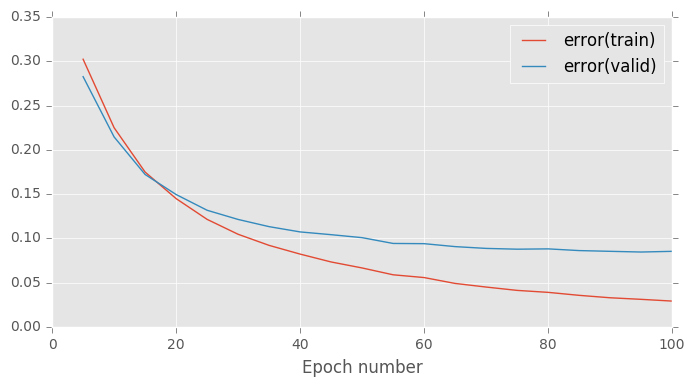

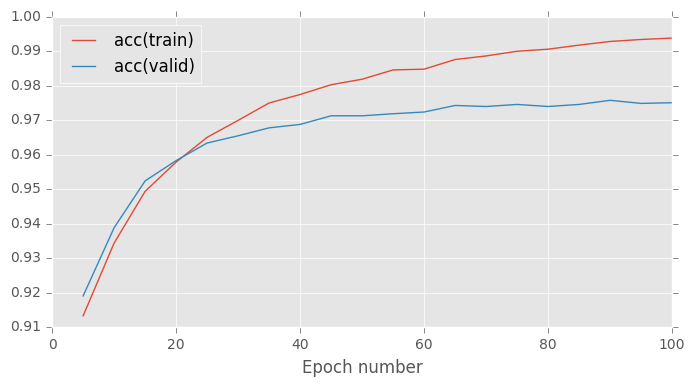

    final error(train) = 2.92e-02
    final error(valid) = 8.54e-02
    final acc(train)   = 9.94e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.32s
--------------------------------------------------------------------------------
learning_rate=0.20 init_scale=0.10 r=16
--------------------------------------------------------------------------------


Epoch 5: 1.02s to complete
    error(train)=1.88e-01, acc(train)=9.45e-01, error(valid)=1.82e-01, acc(valid)=9.49e-01
Epoch 10: 0.93s to complete
    error(train)=1.26e-01, acc(train)=9.64e-01, error(valid)=1.34e-01, acc(valid)=9.62e-01
Epoch 15: 0.88s to complete
    error(train)=9.60e-02, acc(train)=9.73e-01, error(valid)=1.15e-01, acc(valid)=9.68e-01
Epoch 20: 0.88s to complete
    error(train)=8.18e-02, acc(train)=9.77e-01, error(valid)=1.07e-01, acc(valid)=9.69e-01
Epoch 25: 0.89s to complete
    error(train)=7.23e-02, acc(train)=9.81e-01, error(valid)=1.01e-01, acc(valid)=9.70e-01
Epoch 30: 1.42s to complete
    error(train)=6.68e-02, acc(train)=9.82e-01, error(valid)=9.85e-02, acc(valid)=9.71e-01
Epoch 35: 1.00s to complete
    error(train)=6.31e-02, acc(train)=9.84e-01, error(valid)=9.69e-02, acc(valid)=9.72e-01
Epoch 40: 1.19s to complete
    error(train)=6.04e-02, acc(train)=9.84e-01, error(valid)=9.48e-02, acc(valid)=9.72e-01
Epoch 45: 2.26s to complete
    error(train)=5.83

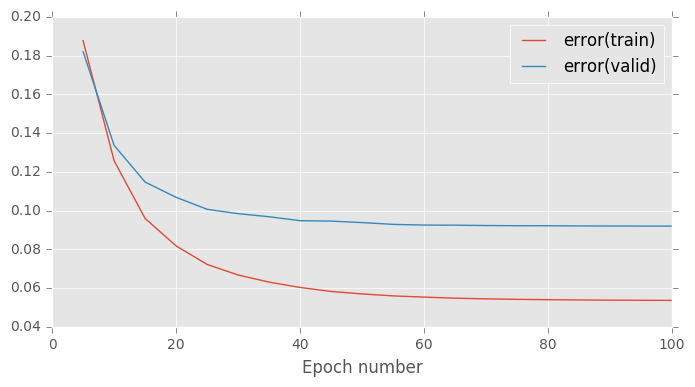

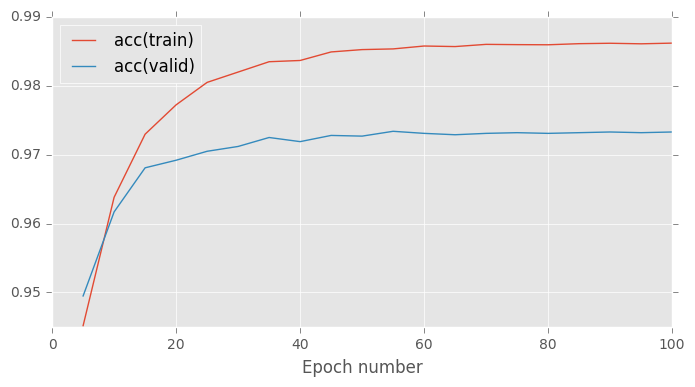

    final error(train) = 5.37e-02
    final error(valid) = 9.21e-02
    final acc(train)   = 9.86e-01
    final acc(valid)   = 9.73e-01
    run time per epoch = 1.35s
--------------------------------------------------------------------------------
learning_rate=0.20 init_scale=0.10 r=50
--------------------------------------------------------------------------------


Epoch 5: 1.02s to complete
    error(train)=1.80e-01, acc(train)=9.47e-01, error(valid)=1.76e-01, acc(valid)=9.51e-01
Epoch 10: 0.92s to complete
    error(train)=1.10e-01, acc(train)=9.68e-01, error(valid)=1.23e-01, acc(valid)=9.64e-01
Epoch 15: 0.92s to complete
    error(train)=7.53e-02, acc(train)=9.79e-01, error(valid)=1.04e-01, acc(valid)=9.71e-01
Epoch 20: 0.92s to complete
    error(train)=5.73e-02, acc(train)=9.84e-01, error(valid)=9.51e-02, acc(valid)=9.72e-01
Epoch 25: 0.91s to complete
    error(train)=4.43e-02, acc(train)=9.88e-01, error(valid)=8.92e-02, acc(valid)=9.74e-01
Epoch 30: 0.90s to complete
    error(train)=3.46e-02, acc(train)=9.92e-01, error(valid)=8.67e-02, acc(valid)=9.75e-01
Epoch 35: 0.91s to complete
    error(train)=2.85e-02, acc(train)=9.94e-01, error(valid)=8.38e-02, acc(valid)=9.75e-01
Epoch 40: 3.14s to complete
    error(train)=2.37e-02, acc(train)=9.96e-01, error(valid)=8.20e-02, acc(valid)=9.76e-01
Epoch 45: 0.97s to complete
    error(train)=2.06

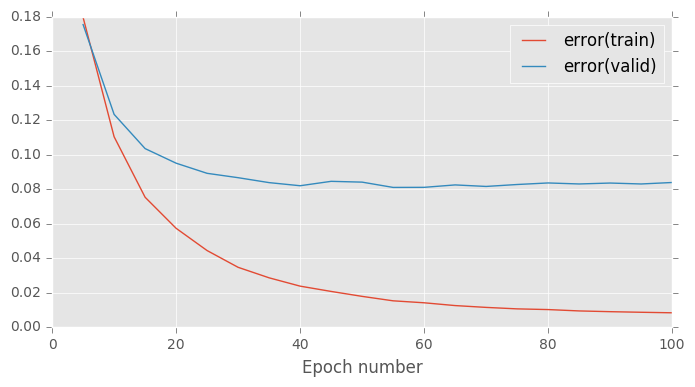

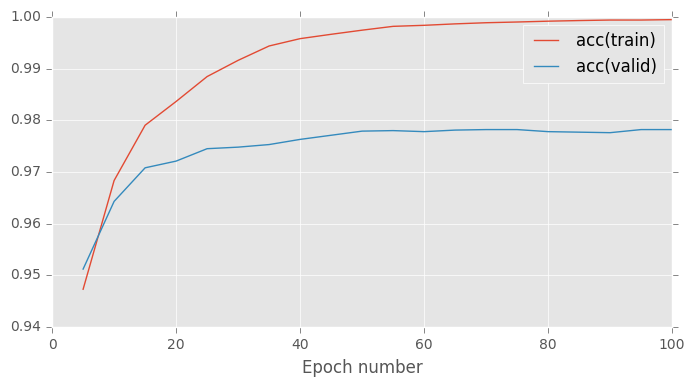

    final error(train) = 8.22e-03
    final error(valid) = 8.39e-02
    final acc(train)   = 9.99e-01
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.40s
--------------------------------------------------------------------------------
learning_rate=0.20 init_scale=0.10 r=150
--------------------------------------------------------------------------------


Epoch 5: 1.37s to complete
    error(train)=1.77e-01, acc(train)=9.48e-01, error(valid)=1.74e-01, acc(valid)=9.52e-01
Epoch 10: 0.93s to complete
    error(train)=1.06e-01, acc(train)=9.70e-01, error(valid)=1.21e-01, acc(valid)=9.65e-01
Epoch 15: 0.92s to complete
    error(train)=6.91e-02, acc(train)=9.81e-01, error(valid)=1.01e-01, acc(valid)=9.71e-01
Epoch 20: 1.93s to complete
    error(train)=5.04e-02, acc(train)=9.86e-01, error(valid)=9.29e-02, acc(valid)=9.72e-01
Epoch 25: 2.59s to complete
    error(train)=3.71e-02, acc(train)=9.90e-01, error(valid)=8.84e-02, acc(valid)=9.75e-01
Epoch 30: 1.00s to complete
    error(train)=2.57e-02, acc(train)=9.95e-01, error(valid)=8.51e-02, acc(valid)=9.76e-01
Epoch 35: 0.99s to complete
    error(train)=2.02e-02, acc(train)=9.97e-01, error(valid)=8.37e-02, acc(valid)=9.76e-01
Epoch 40: 0.95s to complete
    error(train)=1.47e-02, acc(train)=9.98e-01, error(valid)=8.22e-02, acc(valid)=9.78e-01
Epoch 45: 0.96s to complete
    error(train)=1.21

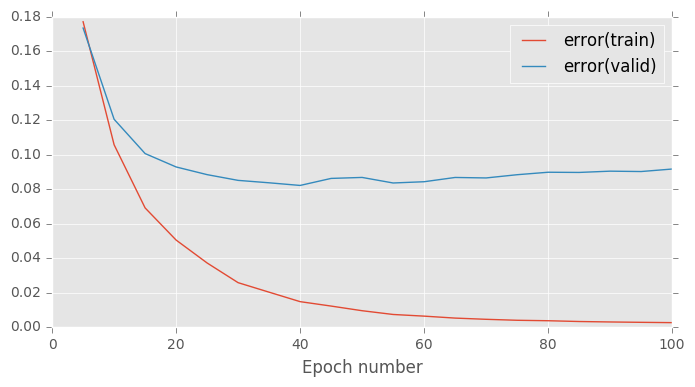

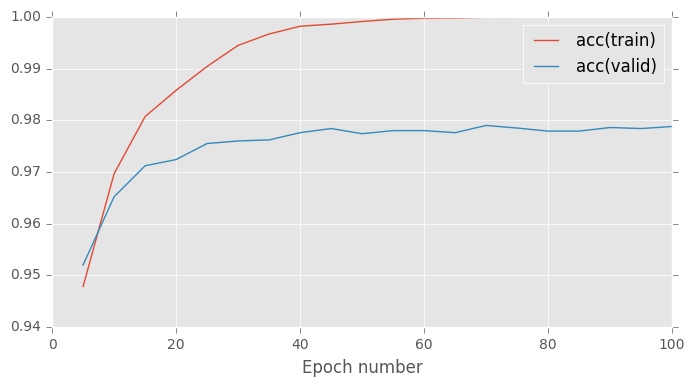

    final error(train) = 2.50e-03
    final error(valid) = 9.17e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.79e-01
    run time per epoch = 1.33s
--------------------------------------------------------------------------------
learning_rate=0.60 init_scale=0.10 r=16
--------------------------------------------------------------------------------


Epoch 5: 0.92s to complete
    error(train)=9.22e-02, acc(train)=9.72e-01, error(valid)=1.14e-01, acc(valid)=9.68e-01
Epoch 10: 0.93s to complete
    error(train)=4.68e-02, acc(train)=9.87e-01, error(valid)=8.97e-02, acc(valid)=9.73e-01
Epoch 15: 1.72s to complete
    error(train)=2.88e-02, acc(train)=9.93e-01, error(valid)=8.61e-02, acc(valid)=9.75e-01
Epoch 20: 0.90s to complete
    error(train)=1.85e-02, acc(train)=9.97e-01, error(valid)=8.34e-02, acc(valid)=9.75e-01
Epoch 25: 0.91s to complete
    error(train)=1.46e-02, acc(train)=9.98e-01, error(valid)=8.34e-02, acc(valid)=9.77e-01
Epoch 30: 0.94s to complete
    error(train)=1.21e-02, acc(train)=9.99e-01, error(valid)=8.48e-02, acc(valid)=9.76e-01
Epoch 35: 0.92s to complete
    error(train)=1.07e-02, acc(train)=9.99e-01, error(valid)=8.45e-02, acc(valid)=9.77e-01
Epoch 40: 0.92s to complete
    error(train)=9.67e-03, acc(train)=9.99e-01, error(valid)=8.46e-02, acc(valid)=9.76e-01
Epoch 45: 0.93s to complete
    error(train)=9.09

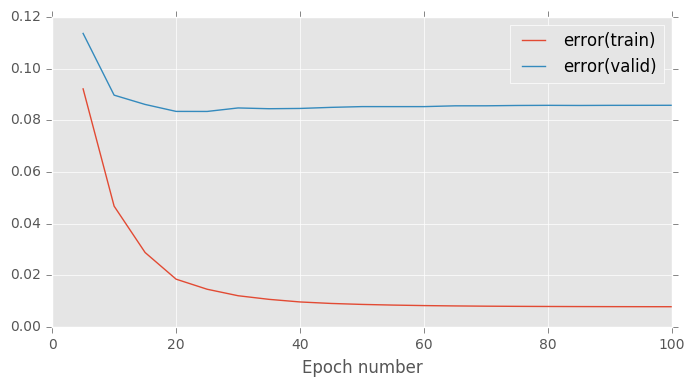

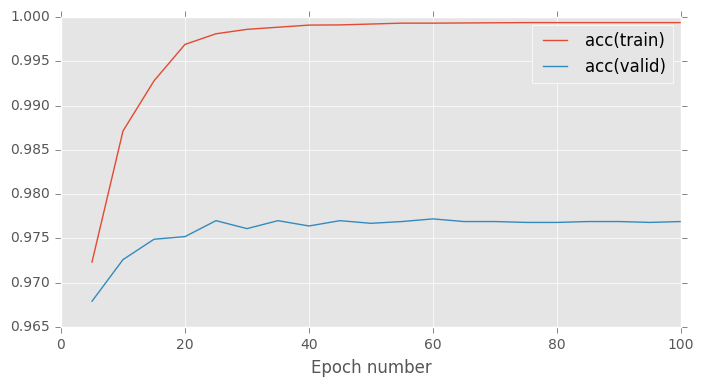

    final error(train) = 7.83e-03
    final error(valid) = 8.58e-02
    final acc(train)   = 9.99e-01
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.20s
--------------------------------------------------------------------------------
learning_rate=0.60 init_scale=0.10 r=50
--------------------------------------------------------------------------------


Epoch 5: 0.95s to complete
    error(train)=8.88e-02, acc(train)=9.73e-01, error(valid)=1.12e-01, acc(valid)=9.68e-01
Epoch 10: 0.91s to complete
    error(train)=4.19e-02, acc(train)=9.88e-01, error(valid)=9.22e-02, acc(valid)=9.72e-01
Epoch 15: 0.94s to complete
    error(train)=2.08e-02, acc(train)=9.95e-01, error(valid)=8.84e-02, acc(valid)=9.75e-01
Epoch 20: 0.94s to complete
    error(train)=9.94e-03, acc(train)=9.99e-01, error(valid)=8.84e-02, acc(valid)=9.75e-01
Epoch 25: 0.92s to complete
    error(train)=5.99e-03, acc(train)=1.00e+00, error(valid)=8.98e-02, acc(valid)=9.77e-01
Epoch 30: 0.92s to complete
    error(train)=4.00e-03, acc(train)=1.00e+00, error(valid)=9.40e-02, acc(valid)=9.76e-01
Epoch 35: 0.93s to complete
    error(train)=2.86e-03, acc(train)=1.00e+00, error(valid)=9.26e-02, acc(valid)=9.77e-01
Epoch 40: 0.90s to complete
    error(train)=2.24e-03, acc(train)=1.00e+00, error(valid)=9.49e-02, acc(valid)=9.77e-01
Epoch 45: 0.91s to complete
    error(train)=1.94

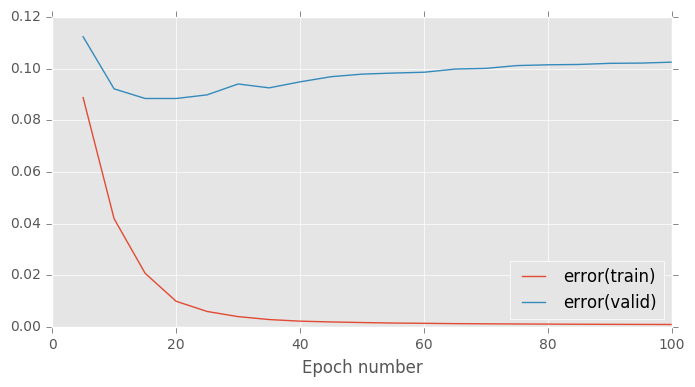

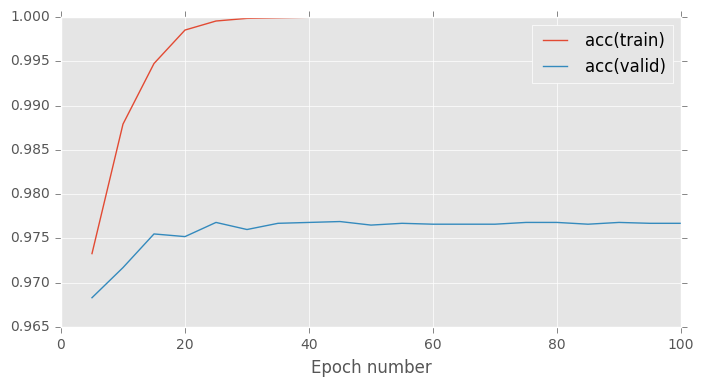

    final error(train) = 9.53e-04
    final error(valid) = 1.03e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.17s
--------------------------------------------------------------------------------
learning_rate=0.60 init_scale=0.10 r=150
--------------------------------------------------------------------------------


Epoch 5: 1.16s to complete
    error(train)=8.78e-02, acc(train)=9.74e-01, error(valid)=1.12e-01, acc(valid)=9.68e-01
Epoch 10: 0.92s to complete
    error(train)=4.09e-02, acc(train)=9.88e-01, error(valid)=9.36e-02, acc(valid)=9.72e-01
Epoch 15: 0.90s to complete
    error(train)=1.91e-02, acc(train)=9.95e-01, error(valid)=8.99e-02, acc(valid)=9.75e-01
Epoch 20: 0.94s to complete
    error(train)=8.25e-03, acc(train)=9.99e-01, error(valid)=9.12e-02, acc(valid)=9.75e-01
Epoch 25: 0.94s to complete
    error(train)=4.25e-03, acc(train)=1.00e+00, error(valid)=9.24e-02, acc(valid)=9.77e-01
Epoch 30: 0.90s to complete
    error(train)=2.65e-03, acc(train)=1.00e+00, error(valid)=9.74e-02, acc(valid)=9.76e-01
Epoch 35: 0.91s to complete
    error(train)=1.80e-03, acc(train)=1.00e+00, error(valid)=9.64e-02, acc(valid)=9.77e-01
Epoch 40: 1.46s to complete
    error(train)=1.35e-03, acc(train)=1.00e+00, error(valid)=9.92e-02, acc(valid)=9.78e-01
Epoch 45: 1.25s to complete
    error(train)=1.14

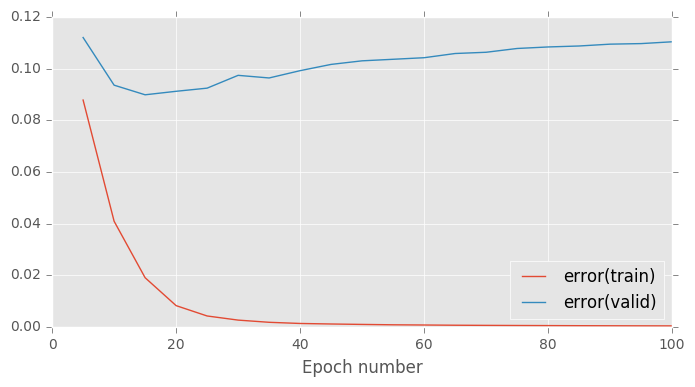

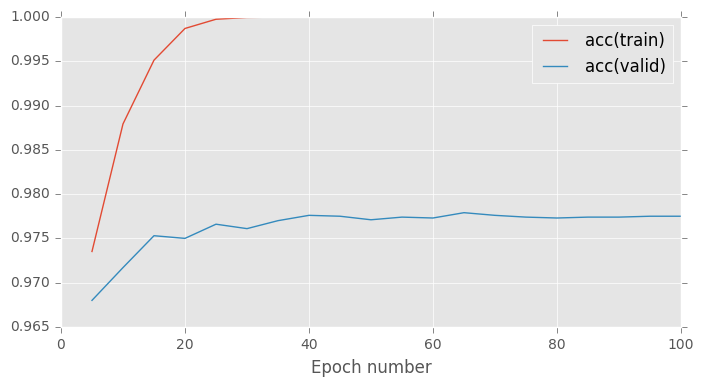

    final error(train) = 4.09e-04
    final error(valid) = 1.10e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 1.14s


In [65]:
# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
initial_learning_rate = 0.2  # learning rate for gradient descent **************************************
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

learning_rates = np.array([0.33, 1., 3.]) * initial_learning_rate
rs = np.maximum(np.floor(np.array([0.33, 1., 3.]) * batch_size), 1)
initial_error_matrix = np.ones((len(learning_rates), len(rs)), dtype='float') * float('inf')

init_scale = 0.1  # scale for random parameter initialisation
final_errors_train_exp = initial_error_matrix.copy()
final_errors_valid_exp = initial_error_matrix.copy()
final_accs_train_exp = initial_error_matrix.copy()
final_accs_valid_exp = initial_error_matrix.copy()
index_values_exp = initial_error_matrix.copy()

# Iterate over learning rates and values of r
for l_idx, learning_rate in enumerate(learning_rates):
    for r_idx, r in enumerate(rs):
        
        schedulers = [ExponentialLearningRateScheduler(initial_learning_rate = learning_rate, r = r)]

        print('-' * 80)
        print('learning_rate={0:.2f} init_scale={1:.2f} r={2:.0f}'
              .format(learning_rate, init_scale, r))
        print('-' * 80)
        
        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
        rng.seed(seed)
        train_data.reset()
        valid_data.reset()

        # Alter data-provider batch size
        train_data.batch_size = batch_size 
        valid_data.batch_size = batch_size

        # Create a parameter initialiser which will sample random uniform values
        # from [-init_scale, init_scale]
        param_init = UniformInit(-init_scale, init_scale, rng=rng)

        # Create a model with two affine layers
        hidden_dim = 100
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

        # Initialise a cross entropy error object
        error = CrossEntropySoftmaxError()

        # Use a basic gradient descent learning rule
        learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedulers)

        plt.show()
        
        # Print stats for all 
        print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
        print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
        print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
        print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
        print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)
        
        final_errors_train_exp[l_idx, r_idx] = stats[-1, keys['error(train)']]
        final_errors_valid_exp[l_idx, r_idx] = stats[-1, keys['error(valid)']]
        final_accs_train_exp[l_idx, r_idx] = stats[-1, keys['acc(train)']]
        final_accs_valid_exp[l_idx, r_idx] = stats[-1, keys['acc(valid)']]
        
        print '\n'
        
        print 'final errors (train): '
        print final_errors_train_exp
        print '\n'

        print 'final errors (valid): '
        print final_errors_valid_exp
        print '\n'

        print 'final accuracy (train): '
        print final_accs_trian_exp
        print '\n'

        print 'final accuracy (valid): '
        print final_accs_valid_exp
        print '\n'

### Final errors and accuracy

In [73]:
print 'learning rates: '
print learning_rates

print '\n'
print 'r values: '
print rs

print '\n'

print 'final errors (train): '
print final_errors_train_exp
print '\n'

print 'final errors (valid): '
print final_errors_valid_exp
print '\n'

print 'final accuracy (train): '
print final_accs_train_exp
print '\n'

print 'final accuracy (valid): '
print final_accs_valid_exp
print '\n'

learning rates: 
[ 0.066  0.2    0.6  ]


r values: 
[  16.   50.  150.]


final errors (train): 
[[ 0.15724404  0.06284451  0.02920153]
 [ 0.05370546  0.00821606  0.00250081]
 [ 0.00782891  0.00095267  0.00040937]]


final errors (valid): 
[[ 0.15810575  0.09698305  0.08536351]
 [ 0.09205492  0.08387255  0.09169008]
 [ 0.08580172  0.10250399  0.11038189]]


final accuracy (train): 
[[ 0.95514  0.98362  0.99386]
 [ 0.9862   0.99948  1.     ]
 [ 0.99936  1.       1.     ]]


final accuracy (valid): 
[[ 0.9563  0.9716  0.9751]
 [ 0.9733  0.9782  0.9788]
 [ 0.9769  0.9767  0.9775]]




## Part 2: Momentum learning rule

In [7]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

### With constant momentum

--------------------------------------------------------------------------------
mom_coeff=0.00
--------------------------------------------------------------------------------


Epoch 5: 1.71s to complete
    error(train)=1.78e+00, acc(train)=6.35e-01, error(valid)=1.77e+00, acc(valid)=6.55e-01
Epoch 10: 2.08s to complete
    error(train)=1.00e+00, acc(train)=7.53e-01, error(valid)=9.72e-01, acc(valid)=7.83e-01
Epoch 15: 0.93s to complete
    error(train)=7.07e-01, acc(train)=8.13e-01, error(valid)=6.70e-01, acc(valid)=8.35e-01
Epoch 20: 0.90s to complete
    error(train)=5.64e-01, acc(train)=8.48e-01, error(valid)=5.29e-01, acc(valid)=8.63e-01
Epoch 25: 0.90s to complete
    error(train)=4.80e-01, acc(train)=8.71e-01, error(valid)=4.48e-01, acc(valid)=8.80e-01
Epoch 30: 0.88s to complete
    error(train)=4.27e-01, acc(train)=8.85e-01, error(valid)=3.97e-01, acc(valid)=8.92e-01
Epoch 35: 0.88s to complete
    error(train)=3.91e-01, acc(train)=8.93e-01, error(valid)=3.65e-01, acc(valid)=8.99e-01
Epoch 40: 0.87s to complete
    error(train)=3.67e-01, acc(train)=8.99e-01, error(valid)=3.41e-01, acc(valid)=9.04e-01
Epoch 45: 1.59s to complete
    error(train)=3.48

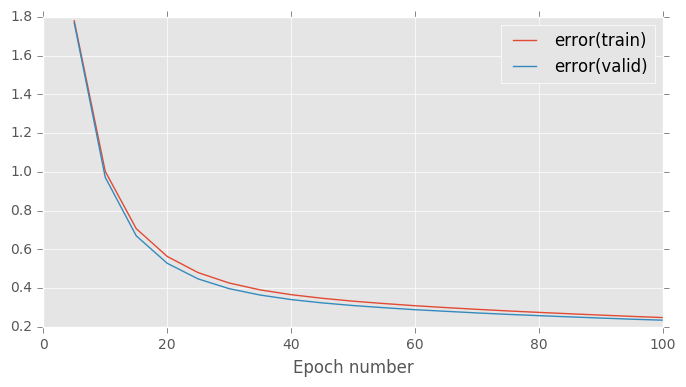

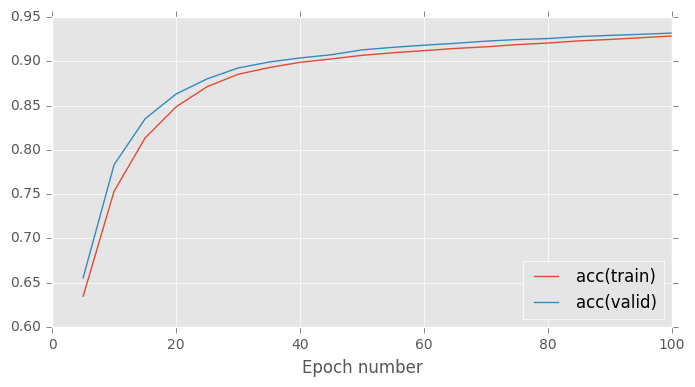

    final error(train) = 2.48e-01
    final error(valid) = 2.35e-01
    final acc(train)   = 9.29e-01
    final acc(valid)   = 9.32e-01
    run time per epoch = 1.35s


final errors (train): 
['0.24839407']


final errors (valid): 
['0.23482993']


final accuracy (train): 
['0.92852000']


final accuracy (valid): 
['0.93180000']


--------------------------------------------------------------------------------
mom_coeff=0.05
--------------------------------------------------------------------------------


Epoch 5: 0.91s to complete
    error(train)=1.73e+00, acc(train)=6.42e-01, error(valid)=1.72e+00, acc(valid)=6.62e-01
Epoch 10: 1.00s to complete
    error(train)=9.58e-01, acc(train)=7.63e-01, error(valid)=9.26e-01, acc(valid)=7.91e-01
Epoch 15: 0.98s to complete
    error(train)=6.78e-01, acc(train)=8.21e-01, error(valid)=6.41e-01, acc(valid)=8.38e-01
Epoch 20: 0.86s to complete
    error(train)=5.43e-01, acc(train)=8.54e-01, error(valid)=5.08e-01, acc(valid)=8.69e-01
Epoch 25: 0.88s to complete
    error(train)=4.64e-01, acc(train)=8.76e-01, error(valid)=4.32e-01, acc(valid)=8.84e-01
Epoch 30: 0.87s to complete
    error(train)=4.14e-01, acc(train)=8.88e-01, error(valid)=3.86e-01, acc(valid)=8.95e-01
Epoch 35: 0.86s to complete
    error(train)=3.81e-01, acc(train)=8.95e-01, error(valid)=3.55e-01, acc(valid)=9.01e-01
Epoch 40: 0.88s to complete
    error(train)=3.58e-01, acc(train)=9.00e-01, error(valid)=3.33e-01, acc(valid)=9.06e-01
Epoch 45: 0.90s to complete
    error(train)=3.41

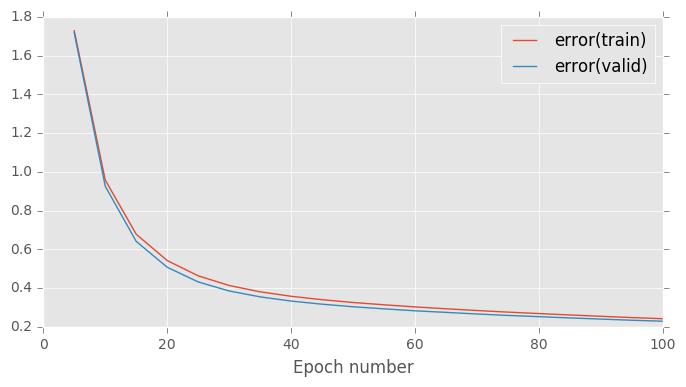

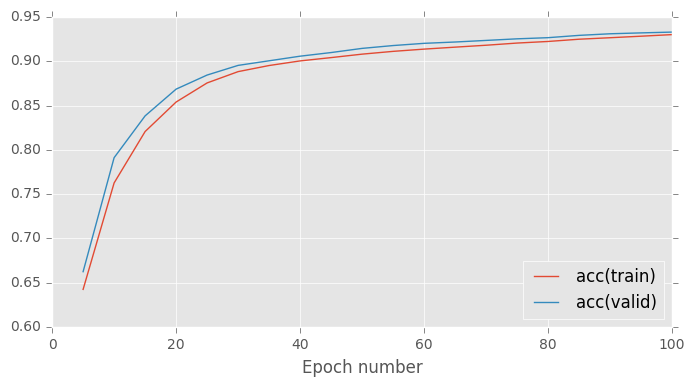

    final error(train) = 2.42e-01
    final error(valid) = 2.29e-01
    final acc(train)   = 9.30e-01
    final acc(valid)   = 9.33e-01
    run time per epoch = 1.30s


final errors (train): 
['0.24839407', '0.24231615']


final errors (valid): 
['0.23482993', '0.22949588']


final accuracy (train): 
['0.92852000', '0.93006000']


final accuracy (valid): 
['0.93180000', '0.93290000']


--------------------------------------------------------------------------------
mom_coeff=0.75
--------------------------------------------------------------------------------


Epoch 5: 1.12s to complete
    error(train)=5.65e-01, acc(train)=8.50e-01, error(valid)=5.29e-01, acc(valid)=8.65e-01
Epoch 10: 1.08s to complete
    error(train)=3.68e-01, acc(train)=8.98e-01, error(valid)=3.43e-01, acc(valid)=9.04e-01
Epoch 15: 1.94s to complete
    error(train)=3.11e-01, acc(train)=9.11e-01, error(valid)=2.90e-01, acc(valid)=9.17e-01
Epoch 20: 1.45s to complete
    error(train)=2.76e-01, acc(train)=9.20e-01, error(valid)=2.59e-01, acc(valid)=9.25e-01
Epoch 25: 0.86s to complete
    error(train)=2.49e-01, acc(train)=9.28e-01, error(valid)=2.35e-01, acc(valid)=9.32e-01
Epoch 30: 3.00s to complete
    error(train)=2.28e-01, acc(train)=9.34e-01, error(valid)=2.16e-01, acc(valid)=9.39e-01
Epoch 35: 0.94s to complete
    error(train)=2.09e-01, acc(train)=9.40e-01, error(valid)=2.01e-01, acc(valid)=9.44e-01
Epoch 40: 1.17s to complete
    error(train)=1.94e-01, acc(train)=9.44e-01, error(valid)=1.88e-01, acc(valid)=9.48e-01
Epoch 45: 1.73s to complete
    error(train)=1.80

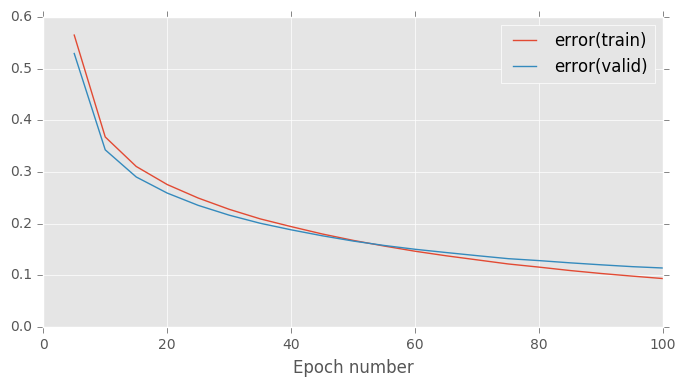

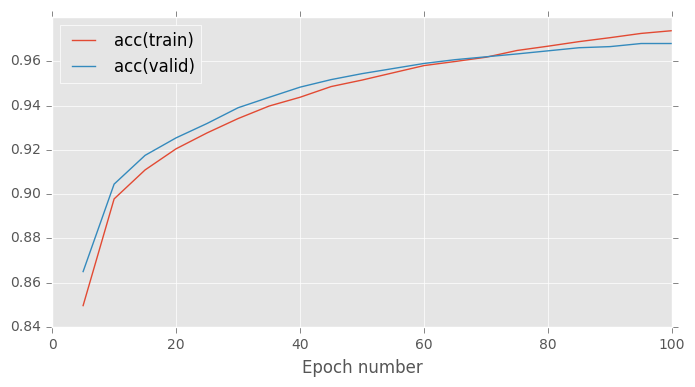

    final error(train) = 9.36e-02
    final error(valid) = 1.14e-01
    final acc(train)   = 9.74e-01
    final acc(valid)   = 9.68e-01
    run time per epoch = 1.48s


final errors (train): 
['0.24839407', '0.24231615', '0.09361105']


final errors (valid): 
['0.23482993', '0.22949588', '0.11405074']


final accuracy (train): 
['0.92852000', '0.93006000', '0.97380000']


final accuracy (valid): 
['0.93180000', '0.93290000', '0.96800000']


--------------------------------------------------------------------------------
mom_coeff=0.90
--------------------------------------------------------------------------------


Epoch 5: 2.00s to complete
    error(train)=3.35e-01, acc(train)=9.06e-01, error(valid)=3.12e-01, acc(valid)=9.12e-01
Epoch 10: 1.97s to complete
    error(train)=2.51e-01, acc(train)=9.27e-01, error(valid)=2.37e-01, acc(valid)=9.31e-01
Epoch 15: 0.96s to complete
    error(train)=2.03e-01, acc(train)=9.40e-01, error(valid)=1.96e-01, acc(valid)=9.44e-01
Epoch 20: 0.94s to complete
    error(train)=1.69e-01, acc(train)=9.51e-01, error(valid)=1.68e-01, acc(valid)=9.53e-01
Epoch 25: 1.18s to complete
    error(train)=1.44e-01, acc(train)=9.58e-01, error(valid)=1.49e-01, acc(valid)=9.59e-01
Epoch 30: 1.31s to complete
    error(train)=1.24e-01, acc(train)=9.64e-01, error(valid)=1.35e-01, acc(valid)=9.62e-01
Epoch 35: 1.07s to complete
    error(train)=1.08e-01, acc(train)=9.69e-01, error(valid)=1.23e-01, acc(valid)=9.66e-01
Epoch 40: 1.03s to complete
    error(train)=9.54e-02, acc(train)=9.73e-01, error(valid)=1.15e-01, acc(valid)=9.68e-01
Epoch 45: 1.09s to complete
    error(train)=8.40

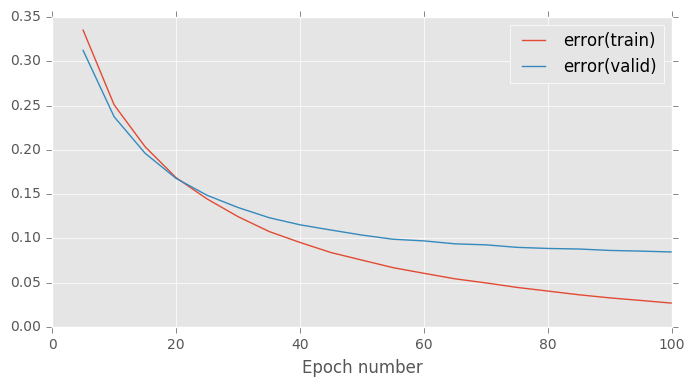

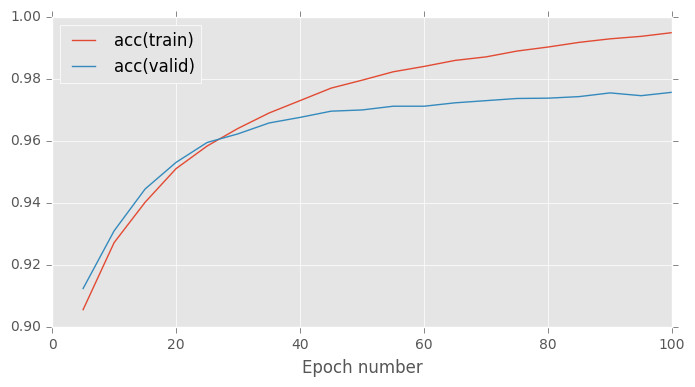

    final error(train) = 2.68e-02
    final error(valid) = 8.46e-02
    final acc(train)   = 9.95e-01
    final acc(valid)   = 9.76e-01
    run time per epoch = 1.34s


final errors (train): 
['0.24839407', '0.24231615', '0.09361105', '0.02684721']


final errors (valid): 
['0.23482993', '0.22949588', '0.11405074', '0.08462026']


final accuracy (train): 
['0.92852000', '0.93006000', '0.97380000', '0.99494000']


final accuracy (valid): 
['0.93180000', '0.93290000', '0.96800000', '0.97570000']


--------------------------------------------------------------------------------
mom_coeff=0.95
--------------------------------------------------------------------------------


Epoch 5: 0.91s to complete
    error(train)=2.53e-01, acc(train)=9.27e-01, error(valid)=2.38e-01, acc(valid)=9.32e-01
Epoch 10: 0.89s to complete
    error(train)=1.71e-01, acc(train)=9.51e-01, error(valid)=1.69e-01, acc(valid)=9.52e-01
Epoch 15: 0.87s to complete
    error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.35e-01, acc(valid)=9.62e-01
Epoch 20: 0.89s to complete
    error(train)=9.59e-02, acc(train)=9.73e-01, error(valid)=1.16e-01, acc(valid)=9.67e-01
Epoch 25: 0.87s to complete
    error(train)=7.76e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.71e-01
Epoch 30: 0.89s to complete
    error(train)=6.45e-02, acc(train)=9.83e-01, error(valid)=9.94e-02, acc(valid)=9.72e-01
Epoch 35: 1.03s to complete
    error(train)=5.15e-02, acc(train)=9.86e-01, error(valid)=9.35e-02, acc(valid)=9.73e-01
Epoch 40: 1.53s to complete
    error(train)=4.18e-02, acc(train)=9.90e-01, error(valid)=8.79e-02, acc(valid)=9.75e-01
Epoch 45: 1.84s to complete
    error(train)=3.38

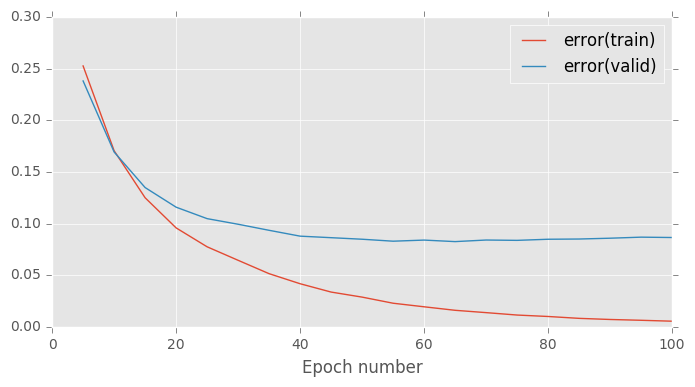

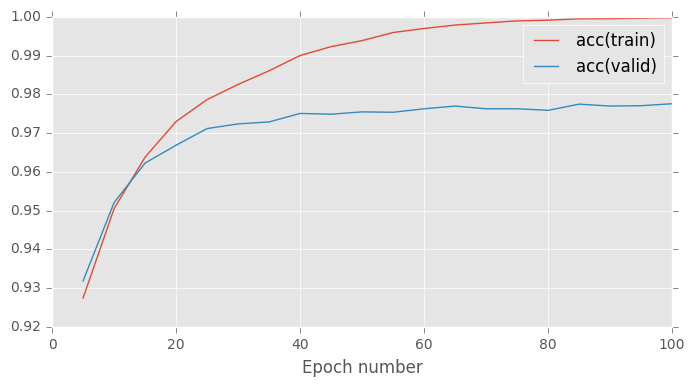

    final error(train) = 5.56e-03
    final error(valid) = 8.65e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.23s


final errors (train): 
['0.24839407', '0.24231615', '0.09361105', '0.02684721', '0.00556075']


final errors (valid): 
['0.23482993', '0.22949588', '0.11405074', '0.08462026', '0.08654265']


final accuracy (train): 
['0.92852000', '0.93006000', '0.97380000', '0.99494000', '0.99976000']


final accuracy (valid): 
['0.93180000', '0.93290000', '0.96800000', '0.97570000', '0.97760000']


--------------------------------------------------------------------------------
mom_coeff=0.99
--------------------------------------------------------------------------------


Epoch 5: 1.18s to complete
    error(train)=9.51e-02, acc(train)=9.72e-01, error(valid)=1.15e-01, acc(valid)=9.68e-01
Epoch 10: 0.90s to complete
    error(train)=4.33e-02, acc(train)=9.88e-01, error(valid)=9.12e-02, acc(valid)=9.74e-01
Epoch 15: 1.05s to complete
    error(train)=2.12e-02, acc(train)=9.95e-01, error(valid)=8.45e-02, acc(valid)=9.77e-01
Epoch 20: 1.13s to complete
    error(train)=1.00e-02, acc(train)=9.98e-01, error(valid)=8.38e-02, acc(valid)=9.76e-01
Epoch 25: 0.93s to complete
    error(train)=6.39e-03, acc(train)=1.00e+00, error(valid)=8.54e-02, acc(valid)=9.77e-01
Epoch 30: 0.98s to complete
    error(train)=3.17e-03, acc(train)=1.00e+00, error(valid)=8.85e-02, acc(valid)=9.77e-01
Epoch 35: 0.96s to complete
    error(train)=2.16e-03, acc(train)=1.00e+00, error(valid)=8.85e-02, acc(valid)=9.78e-01
Epoch 40: 0.88s to complete
    error(train)=1.44e-03, acc(train)=1.00e+00, error(valid)=9.10e-02, acc(valid)=9.78e-01
Epoch 45: 1.24s to complete
    error(train)=1.21

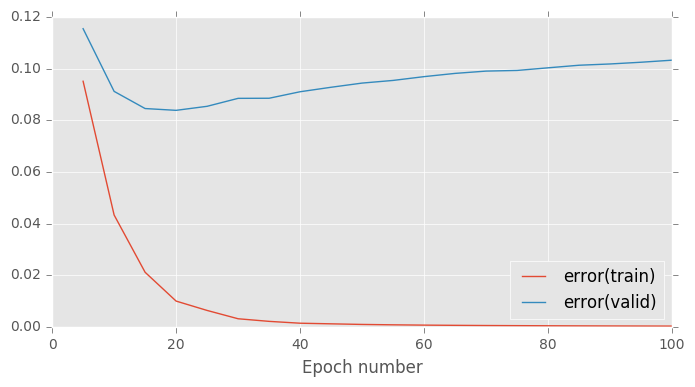

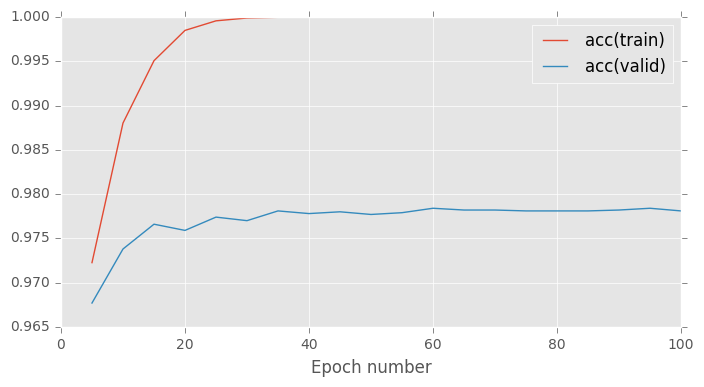

    final error(train) = 3.29e-04
    final error(valid) = 1.03e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.78e-01
    run time per epoch = 1.16s


final errors (train): 
['0.24839407', '0.24231615', '0.09361105', '0.02684721', '0.00556075', '0.00032884']


final errors (valid): 
['0.23482993', '0.22949588', '0.11405074', '0.08462026', '0.08654265', '0.10326414']


final accuracy (train): 
['0.92852000', '0.93006000', '0.97380000', '0.99494000', '0.99976000', '1.00000000']


final accuracy (valid): 
['0.93180000', '0.93290000', '0.96800000', '0.97570000', '0.97760000', '0.97810000']




In [22]:
from mlp.learning_rules import MomentumLearningRule

# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rate = 0.005  # learning rate for gradient descent
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

init_scale = 0.1  # scale for random parameter initialisation

mom_coeffs = [0, 0.05, 0.75, 0.9, 0.95, 0.99]  # scale for random parameter initialisation
final_errors_train_mom = []
final_errors_valid_mom = []
final_accs_train_mom = []
final_accs_valid_mom = []

# Iterate over momentum coefficients
for mom_coeff in mom_coeffs:

    schedulers = [ConstantLearningRateScheduler(learning_rate)]

    print('-' * 80)
    print('mom_coeff={0:.2f}'
          .format(mom_coeff))
    print('-' * 80)

    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    # Create a parameter initialiser which will sample random uniform values
    # from [-init_scale, init_scale]
    param_init = UniformInit(-init_scale, init_scale, rng=rng)

    # Create a model with two affine layers
    hidden_dim = 100
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    # Initialise a cross entropy error object
    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = MomentumLearningRule(learning_rate=learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedulers)

    plt.show()

    # Print stats for all 
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train_mom.append(stats[-1, keys['error(train)']])
    final_errors_valid_mom.append(stats[-1, keys['error(valid)']])
    final_accs_train_mom.append(stats[-1, keys['acc(train)']])
    final_accs_valid_mom.append(stats[-1, keys['acc(valid)']])

    print '\n'

    print 'final errors (train): '
    print ["{0:.8f}".format(x) for x in final_errors_train_mom]
    print '\n'

    print 'final errors (valid): '
    print ["{0:.8f}".format(x) for x in final_errors_valid_mom]
    print '\n'

    print 'final accuracy (train): '
    print ["{0:.8f}".format(x) for x in final_accs_train_mom]
    print '\n'

    print 'final accuracy (valid): '
    print ["{0:.8f}".format(x) for x in final_accs_valid_mom]
    print '\n'

### With increasing momentum

--------------------------------------------------------------------------------
alpha = 0.1
tao = 1
gamma = 0.1
--------------------------------------------------------------------------------


Epoch 5: 1.11s to complete
    error(train)=1.68e+00, acc(train)=6.49e-01, error(valid)=1.66e+00, acc(valid)=6.71e-01
Epoch 10: 1.24s to complete
    error(train)=9.16e-01, acc(train)=7.71e-01, error(valid)=8.83e-01, acc(valid)=7.99e-01
Epoch 15: 1.93s to complete
    error(train)=6.51e-01, acc(train)=8.28e-01, error(valid)=6.14e-01, acc(valid)=8.45e-01
Epoch 20: 1.33s to complete
    error(train)=5.22e-01, acc(train)=8.60e-01, error(valid)=4.88e-01, acc(valid)=8.73e-01
Epoch 25: 1.11s to complete
    error(train)=4.48e-01, acc(train)=8.80e-01, error(valid)=4.17e-01, acc(valid)=8.87e-01
Epoch 30: 1.22s to complete
    error(train)=4.02e-01, acc(train)=8.91e-01, error(valid)=3.74e-01, acc(valid)=8.97e-01
Epoch 35: 1.16s to complete
    error(train)=3.71e-01, acc(train)=8.97e-01, error(valid)=3.46e-01, acc(valid)=9.03e-01
Epoch 40: 1.28s to complete
    error(train)=3.50e-01, acc(train)=9.02e-01, error(valid)=3.26e-01, acc(valid)=9.07e-01
Epoch 45: 1.34s to complete
    error(train)=3.33

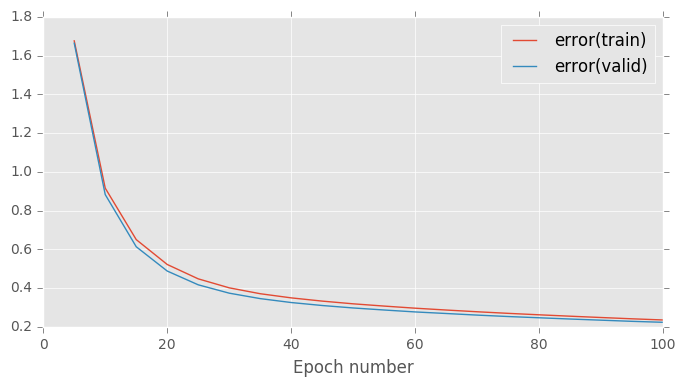

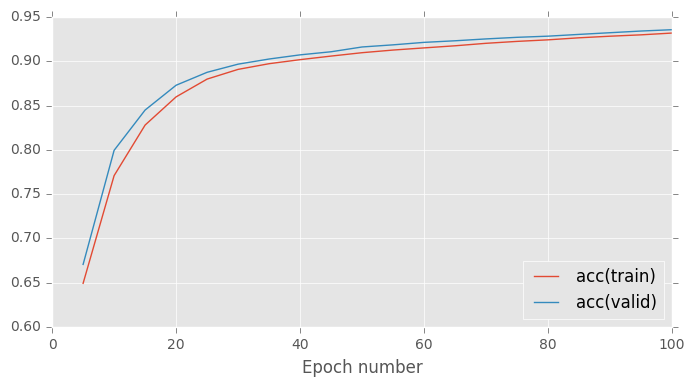

    final error(train) = 2.36e-01
    final error(valid) = 2.24e-01
    final acc(train)   = 9.32e-01
    final acc(valid)   = 9.36e-01
    run time per epoch = 1.55s


final errors (train): 
['0.23598215']


final errors (valid): 
['0.22395605']


final accuracy (train): 
['0.93182000']


final accuracy (valid): 
['0.93560000']


--------------------------------------------------------------------------------
alpha = 0.1
tao = 1
gamma = 0.5
--------------------------------------------------------------------------------


Epoch 5: 1.30s to complete
    error(train)=1.70e+00, acc(train)=6.47e-01, error(valid)=1.69e+00, acc(valid)=6.68e-01
Epoch 10: 1.13s to complete
    error(train)=9.27e-01, acc(train)=7.69e-01, error(valid)=8.94e-01, acc(valid)=7.96e-01
Epoch 15: 1.36s to complete
    error(train)=6.56e-01, acc(train)=8.26e-01, error(valid)=6.19e-01, acc(valid)=8.43e-01
Epoch 20: 1.19s to complete
    error(train)=5.25e-01, acc(train)=8.59e-01, error(valid)=4.91e-01, acc(valid)=8.72e-01
Epoch 25: 1.33s to complete
    error(train)=4.50e-01, acc(train)=8.79e-01, error(valid)=4.19e-01, acc(valid)=8.87e-01
Epoch 30: 1.26s to complete
    error(train)=4.03e-01, acc(train)=8.90e-01, error(valid)=3.76e-01, acc(valid)=8.97e-01
Epoch 35: 1.19s to complete
    error(train)=3.72e-01, acc(train)=8.97e-01, error(valid)=3.47e-01, acc(valid)=9.02e-01
Epoch 40: 1.20s to complete
    error(train)=3.51e-01, acc(train)=9.02e-01, error(valid)=3.27e-01, acc(valid)=9.07e-01
Epoch 45: 1.31s to complete
    error(train)=3.34

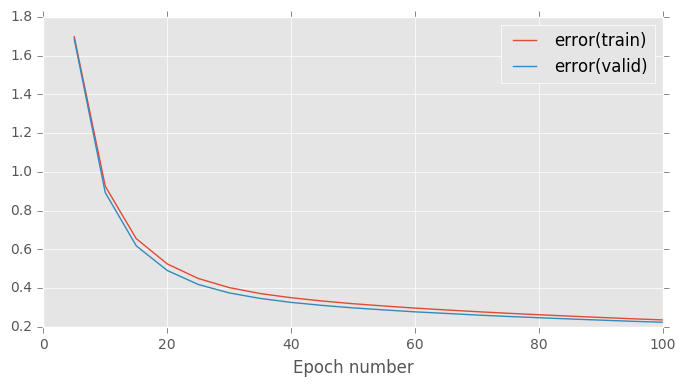

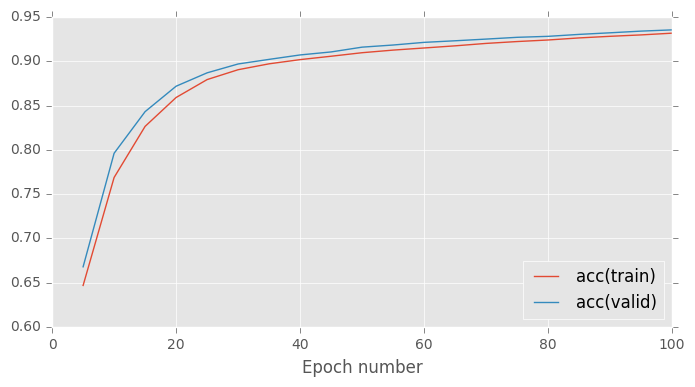

    final error(train) = 2.36e-01
    final error(valid) = 2.24e-01
    final acc(train)   = 9.32e-01
    final acc(valid)   = 9.35e-01
    run time per epoch = 1.49s


final errors (train): 
['0.23598215', '0.23624986']


final errors (valid): 
['0.22395605', '0.22419003']


final accuracy (train): 
['0.93182000', '0.93168000']


final accuracy (valid): 
['0.93560000', '0.93540000']


--------------------------------------------------------------------------------
alpha = 0.1
tao = 1
gamma = 0.9
--------------------------------------------------------------------------------


Epoch 5: 1.45s to complete
    error(train)=1.72e+00, acc(train)=6.44e-01, error(valid)=1.71e+00, acc(valid)=6.65e-01
Epoch 10: 1.09s to complete
    error(train)=9.37e-01, acc(train)=7.67e-01, error(valid)=9.04e-01, acc(valid)=7.94e-01
Epoch 15: 1.27s to complete
    error(train)=6.61e-01, acc(train)=8.25e-01, error(valid)=6.24e-01, acc(valid)=8.43e-01
Epoch 20: 1.23s to complete
    error(train)=5.28e-01, acc(train)=8.58e-01, error(valid)=4.94e-01, acc(valid)=8.71e-01
Epoch 25: 1.23s to complete
    error(train)=4.52e-01, acc(train)=8.79e-01, error(valid)=4.21e-01, acc(valid)=8.87e-01
Epoch 30: 1.36s to complete
    error(train)=4.04e-01, acc(train)=8.90e-01, error(valid)=3.77e-01, acc(valid)=8.97e-01
Epoch 35: 1.27s to complete
    error(train)=3.73e-01, acc(train)=8.97e-01, error(valid)=3.48e-01, acc(valid)=9.02e-01
Epoch 40: 1.21s to complete
    error(train)=3.51e-01, acc(train)=9.02e-01, error(valid)=3.27e-01, acc(valid)=9.07e-01
Epoch 45: 1.34s to complete
    error(train)=3.34

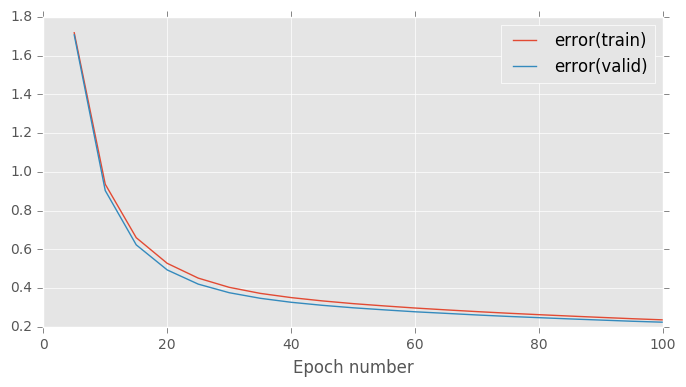

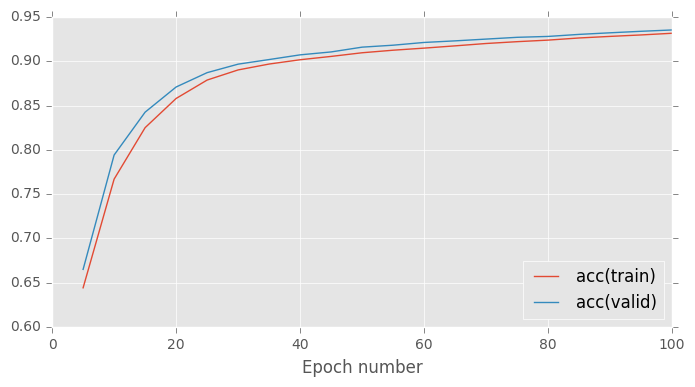

    final error(train) = 2.37e-01
    final error(valid) = 2.24e-01
    final acc(train)   = 9.32e-01
    final acc(valid)   = 9.35e-01
    run time per epoch = 1.59s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000']


--------------------------------------------------------------------------------
alpha = 0.1
tao = 3
gamma = 0.3
--------------------------------------------------------------------------------


Epoch 5: 1.10s to complete
    error(train)=1.68e+00, acc(train)=6.49e-01, error(valid)=1.67e+00, acc(valid)=6.70e-01
Epoch 10: 1.25s to complete
    error(train)=9.18e-01, acc(train)=7.70e-01, error(valid)=8.85e-01, acc(valid)=7.99e-01
Epoch 15: 1.09s to complete
    error(train)=6.52e-01, acc(train)=8.28e-01, error(valid)=6.15e-01, acc(valid)=8.44e-01
Epoch 20: 1.48s to complete
    error(train)=5.23e-01, acc(train)=8.60e-01, error(valid)=4.89e-01, acc(valid)=8.73e-01
Epoch 25: 1.07s to complete
    error(train)=4.49e-01, acc(train)=8.80e-01, error(valid)=4.18e-01, acc(valid)=8.87e-01
Epoch 30: 1.12s to complete
    error(train)=4.02e-01, acc(train)=8.91e-01, error(valid)=3.75e-01, acc(valid)=8.97e-01
Epoch 35: 1.13s to complete
    error(train)=3.72e-01, acc(train)=8.97e-01, error(valid)=3.46e-01, acc(valid)=9.02e-01
Epoch 40: 1.36s to complete
    error(train)=3.50e-01, acc(train)=9.02e-01, error(valid)=3.26e-01, acc(valid)=9.07e-01
Epoch 45: 1.20s to complete
    error(train)=3.33

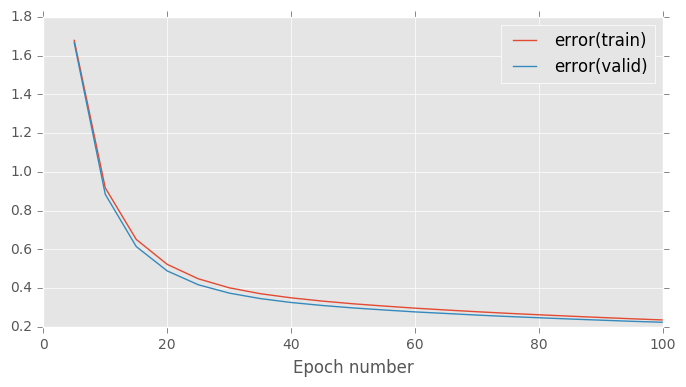

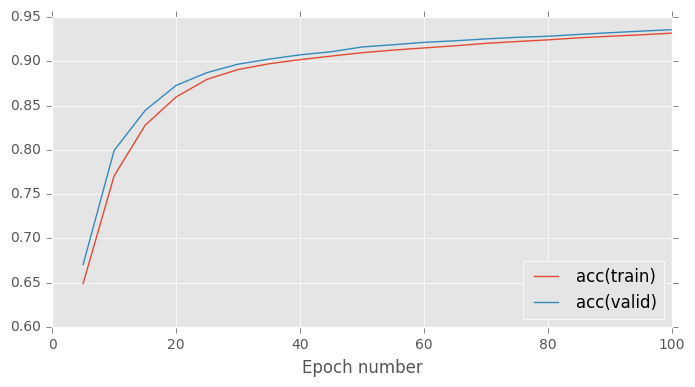

    final error(train) = 2.36e-01
    final error(valid) = 2.24e-01
    final acc(train)   = 9.32e-01
    final acc(valid)   = 9.36e-01
    run time per epoch = 1.39s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000']


--------------------------------------------------------------------------------
alpha = 0.1
tao = 3
gamma = 1.5
--------------------------------------------------------------------------------


Epoch 5: 1.06s to complete
    error(train)=1.71e+00, acc(train)=6.45e-01, error(valid)=1.70e+00, acc(valid)=6.66e-01
Epoch 10: 1.06s to complete
    error(train)=9.35e-01, acc(train)=7.67e-01, error(valid)=9.02e-01, acc(valid)=7.95e-01
Epoch 15: 1.07s to complete
    error(train)=6.61e-01, acc(train)=8.25e-01, error(valid)=6.24e-01, acc(valid)=8.43e-01
Epoch 20: 1.18s to complete
    error(train)=5.28e-01, acc(train)=8.58e-01, error(valid)=4.94e-01, acc(valid)=8.71e-01
Epoch 25: 1.41s to complete
    error(train)=4.52e-01, acc(train)=8.79e-01, error(valid)=4.21e-01, acc(valid)=8.87e-01
Epoch 30: 1.32s to complete
    error(train)=4.05e-01, acc(train)=8.90e-01, error(valid)=3.77e-01, acc(valid)=8.97e-01
Epoch 35: 1.24s to complete
    error(train)=3.73e-01, acc(train)=8.97e-01, error(valid)=3.48e-01, acc(valid)=9.02e-01
Epoch 40: 1.10s to complete
    error(train)=3.52e-01, acc(train)=9.02e-01, error(valid)=3.27e-01, acc(valid)=9.07e-01
Epoch 45: 1.03s to complete
    error(train)=3.35

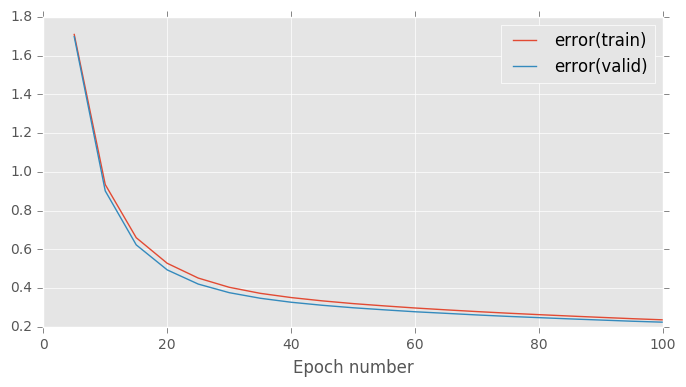

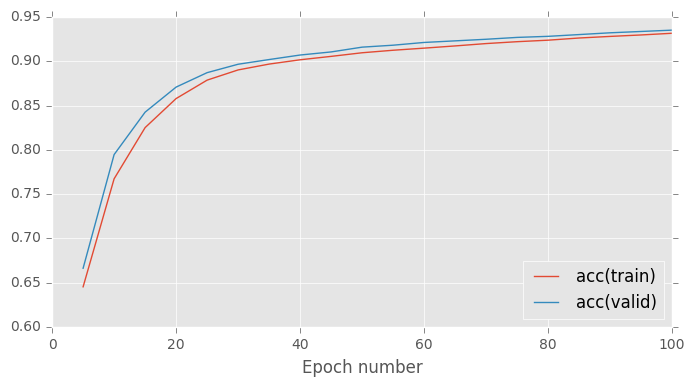

    final error(train) = 2.37e-01
    final error(valid) = 2.25e-01
    final acc(train)   = 9.32e-01
    final acc(valid)   = 9.35e-01
    run time per epoch = 1.35s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000']


--------------------------------------------------------------------------------
alpha = 0.1
tao = 3
gamma = 2.7
--------------------------------------------------------------------------------


Epoch 5: 1.04s to complete
    error(train)=1.74e+00, acc(train)=6.41e-01, error(valid)=1.73e+00, acc(valid)=6.62e-01
Epoch 10: 1.03s to complete
    error(train)=9.52e-01, acc(train)=7.64e-01, error(valid)=9.20e-01, acc(valid)=7.92e-01
Epoch 15: 1.06s to complete
    error(train)=6.69e-01, acc(train)=8.23e-01, error(valid)=6.32e-01, acc(valid)=8.41e-01
Epoch 20: 1.10s to complete
    error(train)=5.34e-01, acc(train)=8.56e-01, error(valid)=5.00e-01, acc(valid)=8.70e-01
Epoch 25: 1.04s to complete
    error(train)=4.56e-01, acc(train)=8.78e-01, error(valid)=4.25e-01, acc(valid)=8.86e-01
Epoch 30: 1.35s to complete
    error(train)=4.07e-01, acc(train)=8.90e-01, error(valid)=3.79e-01, acc(valid)=8.96e-01
Epoch 35: 1.04s to complete
    error(train)=3.75e-01, acc(train)=8.96e-01, error(valid)=3.50e-01, acc(valid)=9.02e-01
Epoch 40: 1.06s to complete
    error(train)=3.53e-01, acc(train)=9.01e-01, error(valid)=3.29e-01, acc(valid)=9.07e-01
Epoch 45: 1.31s to complete
    error(train)=3.36

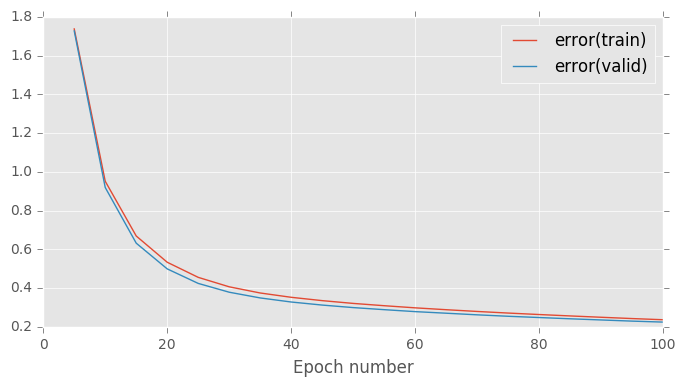

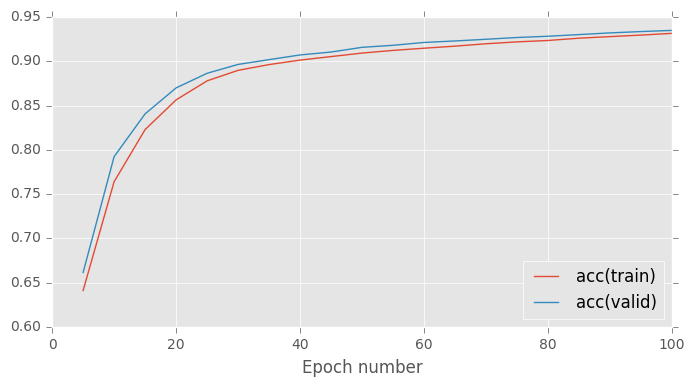

    final error(train) = 2.37e-01
    final error(valid) = 2.25e-01
    final acc(train)   = 9.31e-01
    final acc(valid)   = 9.35e-01
    run time per epoch = 1.31s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000']


--------------------------------------------------------------------------------
alpha = 0.1
tao = 9
gamma = 0.9
--------------------------------------------------------------------------------


Epoch 5: 1.02s to complete
    error(train)=1.68e+00, acc(train)=6.49e-01, error(valid)=1.67e+00, acc(valid)=6.70e-01
Epoch 10: 1.03s to complete
    error(train)=9.20e-01, acc(train)=7.70e-01, error(valid)=8.87e-01, acc(valid)=7.98e-01
Epoch 15: 1.00s to complete
    error(train)=6.53e-01, acc(train)=8.27e-01, error(valid)=6.16e-01, acc(valid)=8.44e-01
Epoch 20: 1.00s to complete
    error(train)=5.24e-01, acc(train)=8.59e-01, error(valid)=4.90e-01, acc(valid)=8.73e-01
Epoch 25: 1.02s to complete
    error(train)=4.49e-01, acc(train)=8.79e-01, error(valid)=4.18e-01, acc(valid)=8.87e-01
Epoch 30: 1.03s to complete
    error(train)=4.03e-01, acc(train)=8.91e-01, error(valid)=3.75e-01, acc(valid)=8.97e-01
Epoch 35: 1.01s to complete
    error(train)=3.72e-01, acc(train)=8.97e-01, error(valid)=3.47e-01, acc(valid)=9.02e-01
Epoch 40: 1.01s to complete
    error(train)=3.51e-01, acc(train)=9.02e-01, error(valid)=3.26e-01, acc(valid)=9.07e-01
Epoch 45: 1.01s to complete
    error(train)=3.34

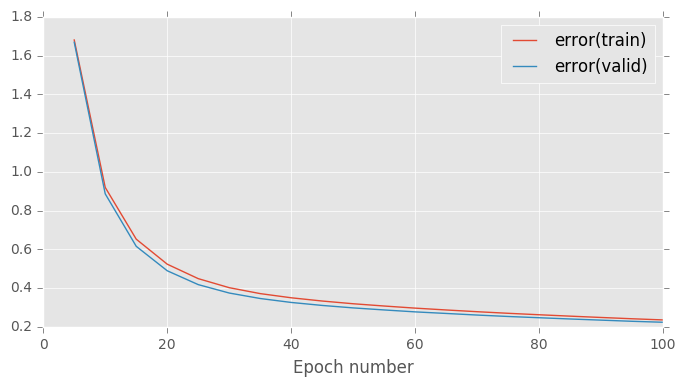

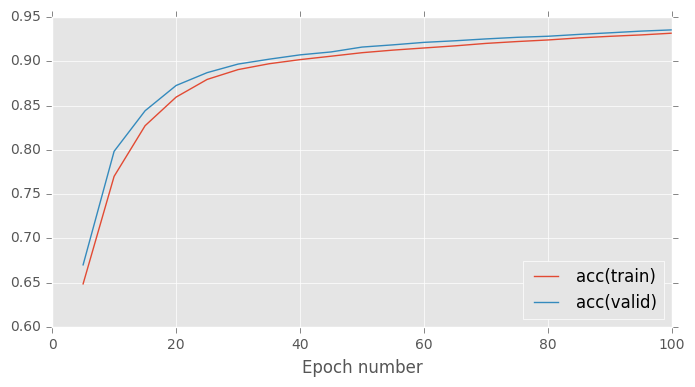

    final error(train) = 2.36e-01
    final error(valid) = 2.24e-01
    final acc(train)   = 9.32e-01
    final acc(valid)   = 9.35e-01
    run time per epoch = 1.36s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000']


--------------------------------------------------------------------------------
alpha = 0.1
tao = 9
gamma = 4.5
--------------------------------------------------------------------------------


Epoch 5: 1.03s to complete
    error(train)=1.72e+00, acc(train)=6.44e-01, error(valid)=1.71e+00, acc(valid)=6.65e-01
Epoch 10: 1.15s to complete
    error(train)=9.45e-01, acc(train)=7.65e-01, error(valid)=9.12e-01, acc(valid)=7.93e-01
Epoch 15: 1.00s to complete
    error(train)=6.67e-01, acc(train)=8.24e-01, error(valid)=6.30e-01, acc(valid)=8.41e-01
Epoch 20: 1.42s to complete
    error(train)=5.33e-01, acc(train)=8.57e-01, error(valid)=4.99e-01, acc(valid)=8.70e-01
Epoch 25: 1.19s to complete
    error(train)=4.56e-01, acc(train)=8.78e-01, error(valid)=4.24e-01, acc(valid)=8.86e-01
Epoch 30: 1.16s to complete
    error(train)=4.07e-01, acc(train)=8.90e-01, error(valid)=3.79e-01, acc(valid)=8.96e-01
Epoch 35: 1.19s to complete
    error(train)=3.75e-01, acc(train)=8.96e-01, error(valid)=3.50e-01, acc(valid)=9.02e-01
Epoch 40: 1.16s to complete
    error(train)=3.53e-01, acc(train)=9.01e-01, error(valid)=3.29e-01, acc(valid)=9.07e-01
Epoch 45: 1.15s to complete
    error(train)=3.36

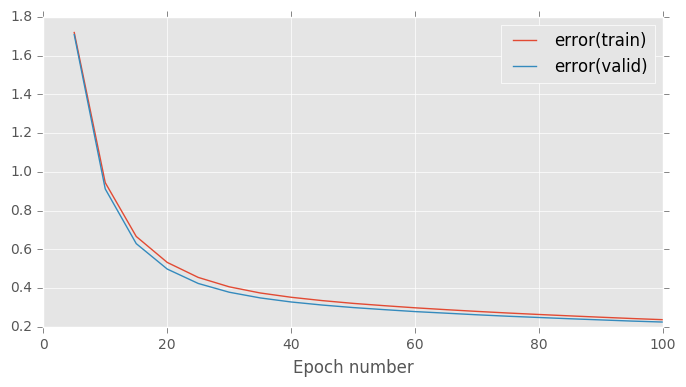

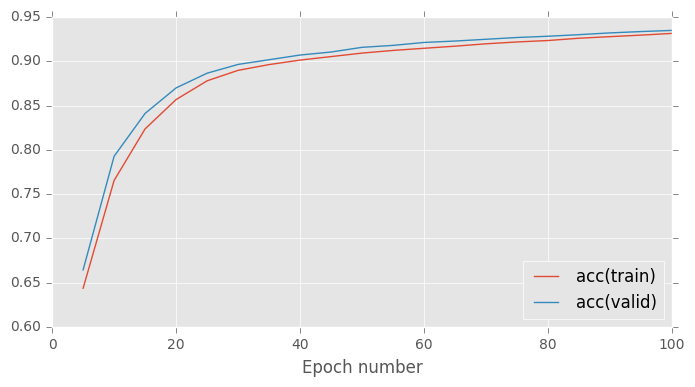

    final error(train) = 2.37e-01
    final error(valid) = 2.25e-01
    final acc(train)   = 9.31e-01
    final acc(valid)   = 9.35e-01
    run time per epoch = 1.42s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000', '0.93480000']


--------------------------------------------------------------------------------
alpha = 0.1
tao = 9
gamma = 8.1
--------------------------------------------------------------------------------


Epoch 5: 1.50s to complete
    error(train)=1.75e+00, acc(train)=6.39e-01, error(valid)=1.74e+00, acc(valid)=6.59e-01
Epoch 10: 1.71s to complete
    error(train)=9.70e-01, acc(train)=7.61e-01, error(valid)=9.38e-01, acc(valid)=7.89e-01
Epoch 15: 1.56s to complete
    error(train)=6.81e-01, acc(train)=8.20e-01, error(valid)=6.44e-01, acc(valid)=8.38e-01
Epoch 20: 0.99s to complete
    error(train)=5.42e-01, acc(train)=8.54e-01, error(valid)=5.07e-01, acc(valid)=8.68e-01
Epoch 25: 1.12s to complete
    error(train)=4.62e-01, acc(train)=8.76e-01, error(valid)=4.30e-01, acc(valid)=8.85e-01
Epoch 30: 1.09s to complete
    error(train)=4.12e-01, acc(train)=8.89e-01, error(valid)=3.83e-01, acc(valid)=8.96e-01
Epoch 35: 1.28s to complete
    error(train)=3.79e-01, acc(train)=8.96e-01, error(valid)=3.53e-01, acc(valid)=9.01e-01
Epoch 40: 2.16s to complete
    error(train)=3.56e-01, acc(train)=9.01e-01, error(valid)=3.31e-01, acc(valid)=9.06e-01
Epoch 45: 1.33s to complete
    error(train)=3.38

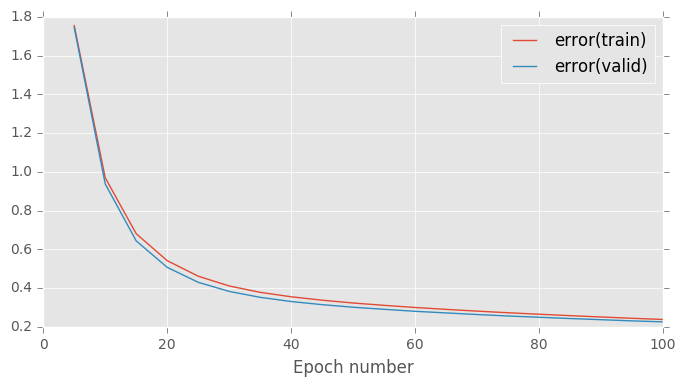

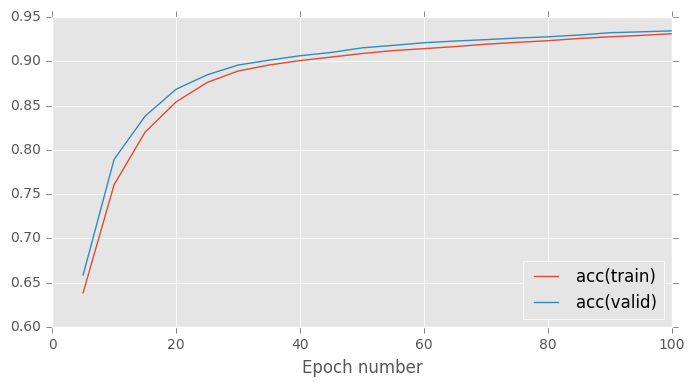

    final error(train) = 2.39e-01
    final error(valid) = 2.26e-01
    final acc(train)   = 9.31e-01
    final acc(valid)   = 9.34e-01
    run time per epoch = 1.42s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000', '0.93480000', '0.93430000']


--------------------------------------------------------------------------------
alpha = 0.5
tao = 1
gamma = 0.1
--------------------------------------------------------------------------------


Epoch 5: 1.20s to complete
    error(train)=1.04e+00, acc(train)=7.38e-01, error(valid)=1.01e+00, acc(valid)=7.65e-01
Epoch 10: 1.21s to complete
    error(train)=5.77e-01, acc(train)=8.47e-01, error(valid)=5.41e-01, acc(valid)=8.63e-01
Epoch 15: 1.21s to complete
    error(train)=4.33e-01, acc(train)=8.84e-01, error(valid)=4.03e-01, acc(valid)=8.91e-01
Epoch 20: 4.41s to complete
    error(train)=3.69e-01, acc(train)=8.98e-01, error(valid)=3.44e-01, acc(valid)=9.03e-01
Epoch 25: 1.33s to complete
    error(train)=3.35e-01, acc(train)=9.05e-01, error(valid)=3.12e-01, acc(valid)=9.11e-01
Epoch 30: 1.03s to complete
    error(train)=3.11e-01, acc(train)=9.12e-01, error(valid)=2.91e-01, acc(valid)=9.19e-01
Epoch 35: 1.53s to complete
    error(train)=2.92e-01, acc(train)=9.16e-01, error(valid)=2.74e-01, acc(valid)=9.22e-01
Epoch 40: 1.09s to complete
    error(train)=2.77e-01, acc(train)=9.21e-01, error(valid)=2.60e-01, acc(valid)=9.25e-01
Epoch 45: 1.17s to complete
    error(train)=2.62

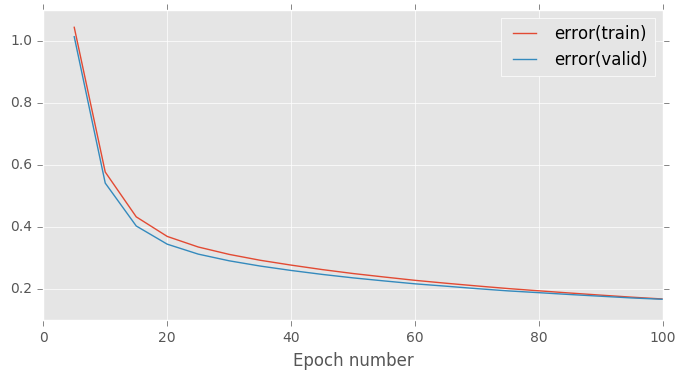

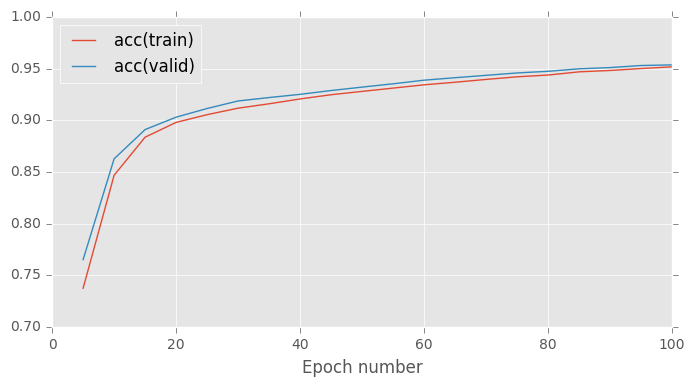

    final error(train) = 1.68e-01
    final error(valid) = 1.67e-01
    final acc(train)   = 9.52e-01
    final acc(valid)   = 9.54e-01
    run time per epoch = 1.71s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000', '0.93480000', '0.93430000', '0.95360000']


--------------------------------------------------------------------------------
alpha = 0.5
tao = 1
gamma = 0.5
--------------------------------------------------

Epoch 5: 1.39s to complete
    error(train)=1.20e+00, acc(train)=7.10e-01, error(valid)=1.17e+00, acc(valid)=7.39e-01
Epoch 10: 1.34s to complete
    error(train)=6.22e-01, acc(train)=8.36e-01, error(valid)=5.86e-01, acc(valid)=8.54e-01
Epoch 15: 1.25s to complete
    error(train)=4.53e-01, acc(train)=8.78e-01, error(valid)=4.23e-01, acc(valid)=8.87e-01
Epoch 20: 1.97s to complete
    error(train)=3.80e-01, acc(train)=8.96e-01, error(valid)=3.55e-01, acc(valid)=9.01e-01
Epoch 25: 2.33s to complete
    error(train)=3.43e-01, acc(train)=9.04e-01, error(valid)=3.19e-01, acc(valid)=9.10e-01
Epoch 30: 1.21s to complete
    error(train)=3.17e-01, acc(train)=9.10e-01, error(valid)=2.96e-01, acc(valid)=9.17e-01
Epoch 35: 1.07s to complete
    error(train)=2.97e-01, acc(train)=9.15e-01, error(valid)=2.78e-01, acc(valid)=9.22e-01
Epoch 40: 1.19s to complete
    error(train)=2.81e-01, acc(train)=9.19e-01, error(valid)=2.63e-01, acc(valid)=9.24e-01
Epoch 45: 1.44s to complete
    error(train)=2.66

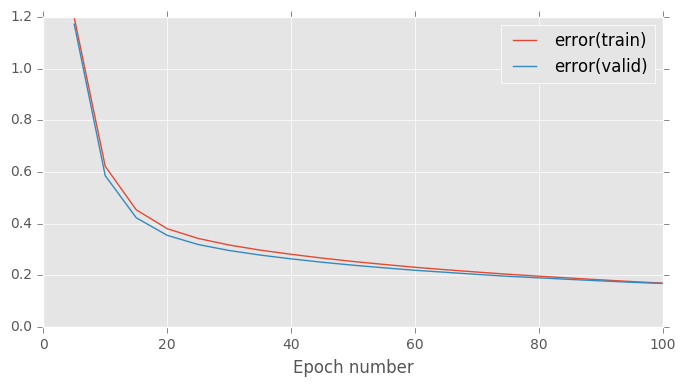

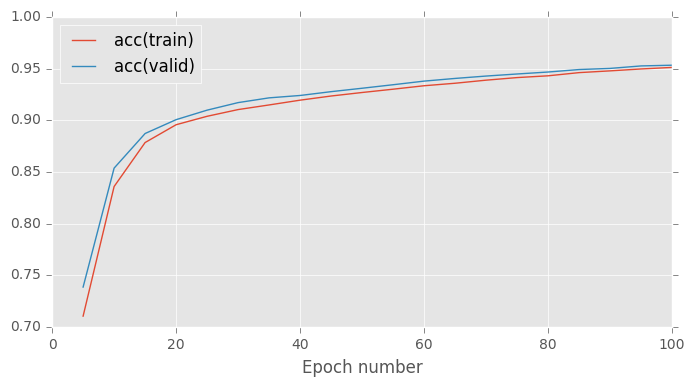

    final error(train) = 1.70e-01
    final error(valid) = 1.68e-01
    final acc(train)   = 9.51e-01
    final acc(valid)   = 9.53e-01
    run time per epoch = 1.53s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000', '0.93480000', '0.93430000', '0.95360000', '0.95330000']


--------------------------------------------------------------------------------
alpha = 0.5
tao = 1
gamma 

Epoch 5: 1.18s to complete
    error(train)=1.34e+00, acc(train)=6.90e-01, error(valid)=1.32e+00, acc(valid)=7.16e-01
Epoch 10: 1.73s to complete
    error(train)=6.63e-01, acc(train)=8.27e-01, error(valid)=6.27e-01, acc(valid)=8.45e-01
Epoch 15: 1.45s to complete
    error(train)=4.73e-01, acc(train)=8.74e-01, error(valid)=4.41e-01, acc(valid)=8.83e-01
Epoch 20: 1.04s to complete
    error(train)=3.90e-01, acc(train)=8.94e-01, error(valid)=3.64e-01, acc(valid)=9.00e-01
Epoch 25: 1.02s to complete
    error(train)=3.49e-01, acc(train)=9.03e-01, error(valid)=3.25e-01, acc(valid)=9.08e-01
Epoch 30: 1.05s to complete
    error(train)=3.22e-01, acc(train)=9.09e-01, error(valid)=3.00e-01, acc(valid)=9.16e-01
Epoch 35: 1.13s to complete
    error(train)=3.02e-01, acc(train)=9.14e-01, error(valid)=2.82e-01, acc(valid)=9.20e-01
Epoch 40: 1.08s to complete
    error(train)=2.85e-01, acc(train)=9.19e-01, error(valid)=2.67e-01, acc(valid)=9.23e-01
Epoch 45: 1.75s to complete
    error(train)=2.70

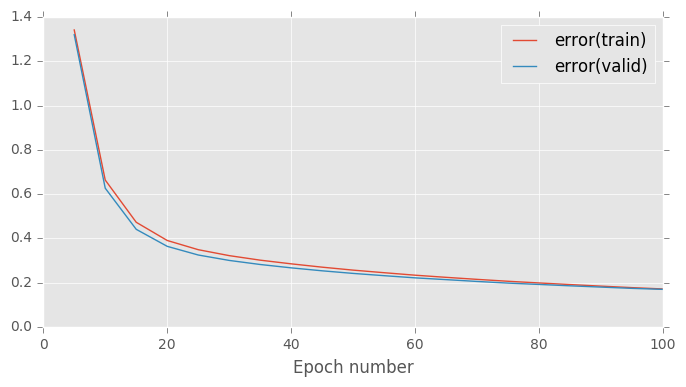

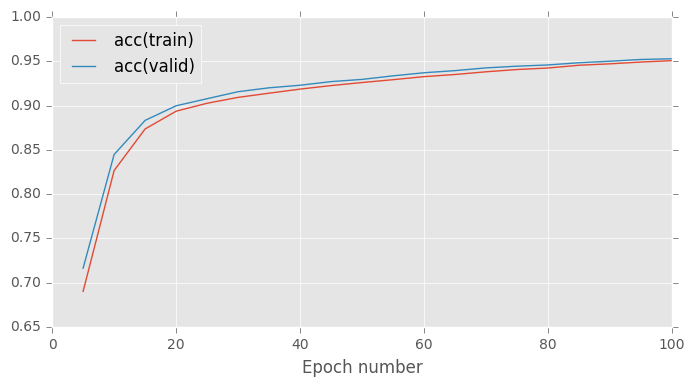

    final error(train) = 1.71e-01
    final error(valid) = 1.70e-01
    final acc(train)   = 9.51e-01
    final acc(valid)   = 9.53e-01
    run time per epoch = 1.48s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000', '0.93480000', '0.93430000', '0.95360000', '0.95330000', '0.95280000']


---------------------------------------------------

Epoch 5: 1.51s to complete
    error(train)=1.06e+00, acc(train)=7.34e-01, error(valid)=1.03e+00, acc(valid)=7.61e-01
Epoch 10: 1.32s to complete
    error(train)=5.85e-01, acc(train)=8.45e-01, error(valid)=5.49e-01, acc(valid)=8.60e-01
Epoch 15: 1.22s to complete
    error(train)=4.37e-01, acc(train)=8.83e-01, error(valid)=4.07e-01, acc(valid)=8.90e-01
Epoch 20: 1.17s to complete
    error(train)=3.72e-01, acc(train)=8.97e-01, error(valid)=3.47e-01, acc(valid)=9.03e-01
Epoch 25: 1.95s to complete
    error(train)=3.37e-01, acc(train)=9.05e-01, error(valid)=3.14e-01, acc(valid)=9.11e-01
Epoch 30: 1.22s to complete
    error(train)=3.13e-01, acc(train)=9.11e-01, error(valid)=2.92e-01, acc(valid)=9.18e-01
Epoch 35: 1.26s to complete
    error(train)=2.94e-01, acc(train)=9.16e-01, error(valid)=2.75e-01, acc(valid)=9.22e-01
Epoch 40: 1.18s to complete
    error(train)=2.78e-01, acc(train)=9.20e-01, error(valid)=2.61e-01, acc(valid)=9.25e-01
Epoch 45: 1.18s to complete
    error(train)=2.64

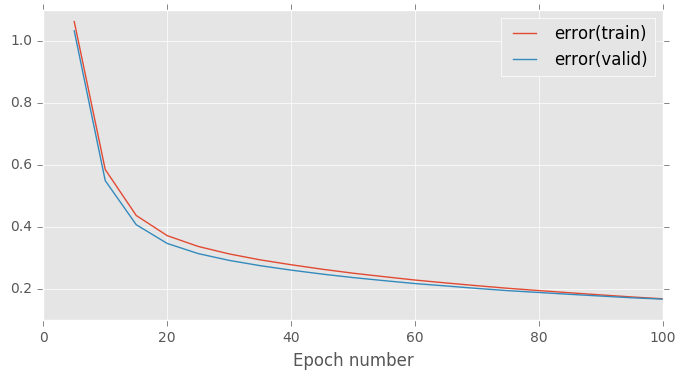

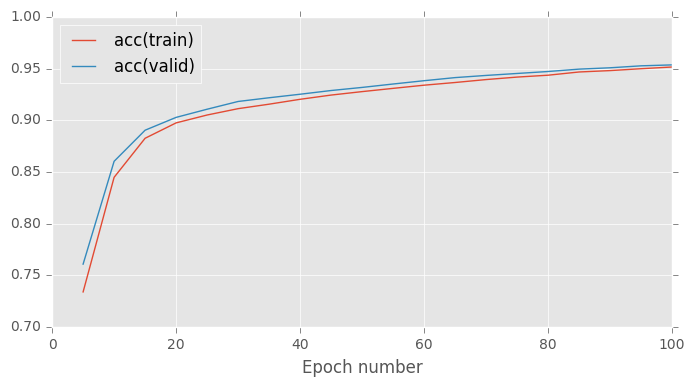

    final error(train) = 1.68e-01
    final error(valid) = 1.67e-01
    final acc(train)   = 9.52e-01
    final acc(valid)   = 9.54e-01
    run time per epoch = 1.41s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000', '0.95156000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000', '0.93480000', '0.93430000', '0.95360000', '0.95330000', '0.95280000', '0.95360000

Epoch 5: 1.23s to complete
    error(train)=1.30e+00, acc(train)=6.96e-01, error(valid)=1.27e+00, acc(valid)=7.23e-01
Epoch 10: 1.15s to complete
    error(train)=6.64e-01, acc(train)=8.26e-01, error(valid)=6.27e-01, acc(valid)=8.45e-01
Epoch 15: 1.06s to complete
    error(train)=4.76e-01, acc(train)=8.72e-01, error(valid)=4.44e-01, acc(valid)=8.83e-01
Epoch 20: 1.04s to complete
    error(train)=3.93e-01, acc(train)=8.93e-01, error(valid)=3.67e-01, acc(valid)=8.99e-01
Epoch 25: 1.04s to complete
    error(train)=3.51e-01, acc(train)=9.02e-01, error(valid)=3.27e-01, acc(valid)=9.07e-01
Epoch 30: 1.13s to complete
    error(train)=3.24e-01, acc(train)=9.09e-01, error(valid)=3.02e-01, acc(valid)=9.15e-01
Epoch 35: 1.08s to complete
    error(train)=3.03e-01, acc(train)=9.14e-01, error(valid)=2.84e-01, acc(valid)=9.20e-01
Epoch 40: 1.03s to complete
    error(train)=2.87e-01, acc(train)=9.18e-01, error(valid)=2.68e-01, acc(valid)=9.22e-01
Epoch 45: 1.25s to complete
    error(train)=2.72

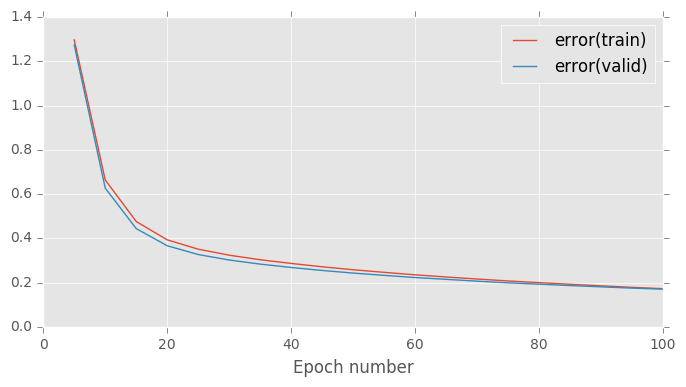

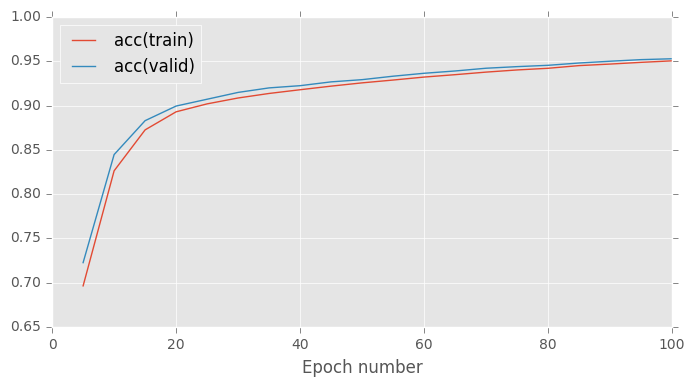

    final error(train) = 1.73e-01
    final error(valid) = 1.71e-01
    final acc(train)   = 9.50e-01
    final acc(valid)   = 9.53e-01
    run time per epoch = 1.42s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000', '0.95156000', '0.95044000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000', '0.93480000', '0.93430000', '0.95360000

Epoch 5: 1.04s to complete
    error(train)=1.51e+00, acc(train)=6.69e-01, error(valid)=1.49e+00, acc(valid)=6.94e-01
Epoch 10: 1.02s to complete
    error(train)=7.40e-01, acc(train)=8.09e-01, error(valid)=7.04e-01, acc(valid)=8.29e-01
Epoch 15: 2.46s to complete
    error(train)=5.14e-01, acc(train)=8.62e-01, error(valid)=4.81e-01, acc(valid)=8.76e-01
Epoch 20: 1.25s to complete
    error(train)=4.15e-01, acc(train)=8.88e-01, error(valid)=3.87e-01, acc(valid)=8.96e-01
Epoch 25: 1.57s to complete
    error(train)=3.64e-01, acc(train)=8.99e-01, error(valid)=3.39e-01, acc(valid)=9.05e-01
Epoch 30: 1.17s to complete
    error(train)=3.34e-01, acc(train)=9.06e-01, error(valid)=3.11e-01, acc(valid)=9.12e-01
Epoch 35: 1.08s to complete
    error(train)=3.12e-01, acc(train)=9.11e-01, error(valid)=2.91e-01, acc(valid)=9.18e-01
Epoch 40: 1.21s to complete
    error(train)=2.94e-01, acc(train)=9.16e-01, error(valid)=2.75e-01, acc(valid)=9.21e-01
Epoch 45: 1.18s to complete
    error(train)=2.79

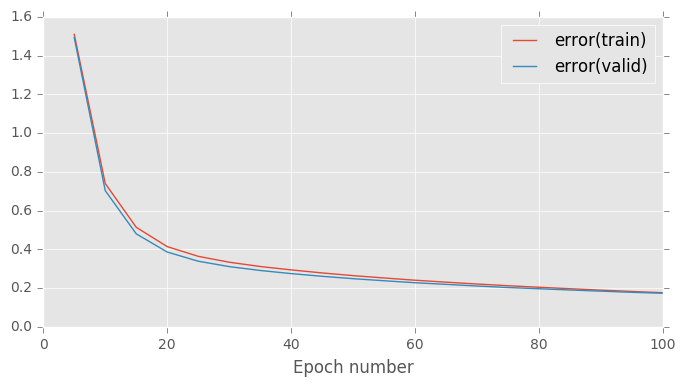

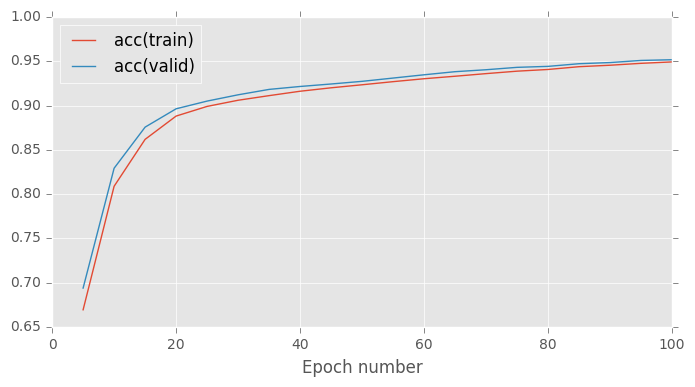

    final error(train) = 1.77e-01
    final error(valid) = 1.74e-01
    final acc(train)   = 9.49e-01
    final acc(valid)   = 9.52e-01
    run time per epoch = 1.46s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000', '0.95156000', '0.95044000', '0.94924000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000', '0.93510000', '0.93480000', '0.93540000

Epoch 5: 1.27s to complete
    error(train)=1.08e+00, acc(train)=7.30e-01, error(valid)=1.05e+00, acc(valid)=7.58e-01
Epoch 10: 1.18s to complete
    error(train)=5.95e-01, acc(train)=8.43e-01, error(valid)=5.59e-01, acc(valid)=8.59e-01
Epoch 15: 2.52s to complete
    error(train)=4.43e-01, acc(train)=8.81e-01, error(valid)=4.13e-01, acc(valid)=8.89e-01
Epoch 20: 1.27s to complete
    error(train)=3.76e-01, acc(train)=8.97e-01, error(valid)=3.50e-01, acc(valid)=9.02e-01
Epoch 25: 1.22s to complete
    error(train)=3.40e-01, acc(train)=9.04e-01, error(valid)=3.17e-01, acc(valid)=9.10e-01
Epoch 30: 1.24s to complete
    error(train)=3.15e-01, acc(train)=9.11e-01, error(valid)=2.94e-01, acc(valid)=9.18e-01
Epoch 35: 1.22s to complete
    error(train)=2.96e-01, acc(train)=9.15e-01, error(valid)=2.77e-01, acc(valid)=9.22e-01
Epoch 40: 1.35s to complete
    error(train)=2.80e-01, acc(train)=9.20e-01, error(valid)=2.63e-01, acc(valid)=9.24e-01
Epoch 45: 3.20s to complete
    error(train)=2.66

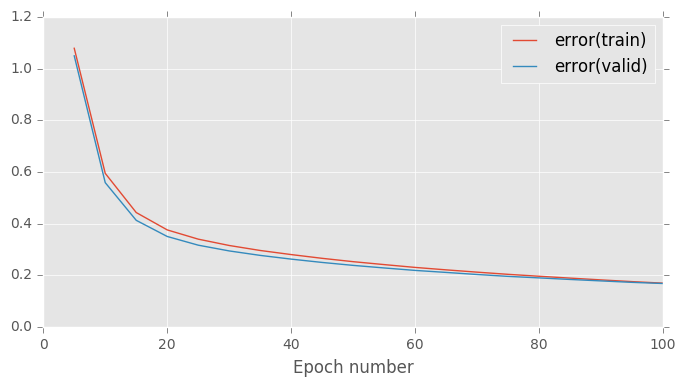

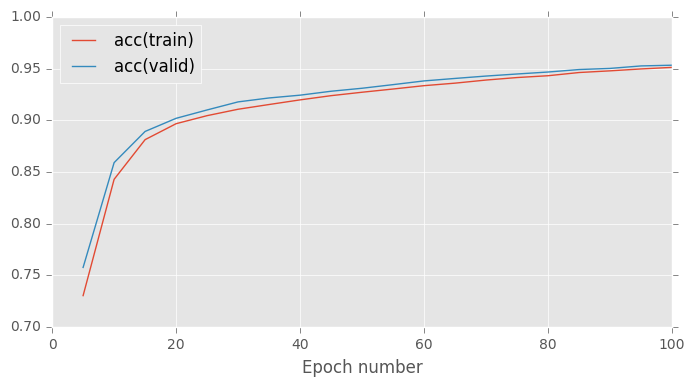

    final error(train) = 1.70e-01
    final error(valid) = 1.68e-01
    final acc(train)   = 9.51e-01
    final acc(valid)   = 9.53e-01
    run time per epoch = 1.50s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000', '0.95156000', '0.95044000', '0.94924000', '0.95120000']


final accuracy (valid): 
['0.93560000', '0.93540000', '0.93530000', '0.93560000

Epoch 5: 1.25s to complete
    error(train)=1.38e+00, acc(train)=6.84e-01, error(valid)=1.36e+00, acc(valid)=7.12e-01
Epoch 10: 1.19s to complete
    error(train)=7.13e-01, acc(train)=8.15e-01, error(valid)=6.77e-01, acc(valid)=8.36e-01
Epoch 15: 1.25s to complete
    error(train)=5.08e-01, acc(train)=8.64e-01, error(valid)=4.74e-01, acc(valid)=8.77e-01
Epoch 20: 1.20s to complete
    error(train)=4.14e-01, acc(train)=8.88e-01, error(valid)=3.86e-01, acc(valid)=8.96e-01
Epoch 25: 1.17s to complete
    error(train)=3.65e-01, acc(train)=8.99e-01, error(valid)=3.40e-01, acc(valid)=9.05e-01
Epoch 30: 1.24s to complete
    error(train)=3.35e-01, acc(train)=9.06e-01, error(valid)=3.13e-01, acc(valid)=9.12e-01
Epoch 35: 1.17s to complete
    error(train)=3.13e-01, acc(train)=9.11e-01, error(valid)=2.93e-01, acc(valid)=9.18e-01
Epoch 40: 1.21s to complete
    error(train)=2.96e-01, acc(train)=9.16e-01, error(valid)=2.77e-01, acc(valid)=9.21e-01
Epoch 45: 1.17s to complete
    error(train)=2.81

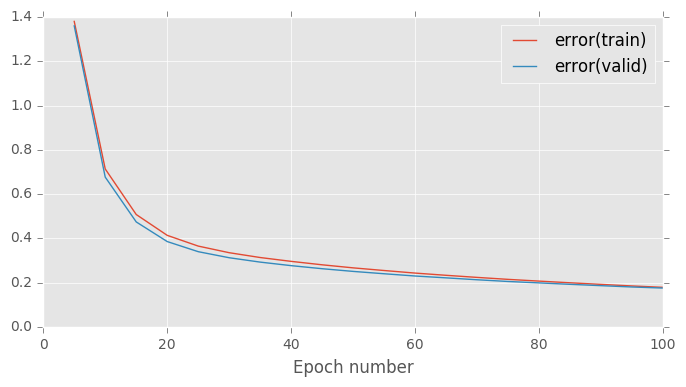

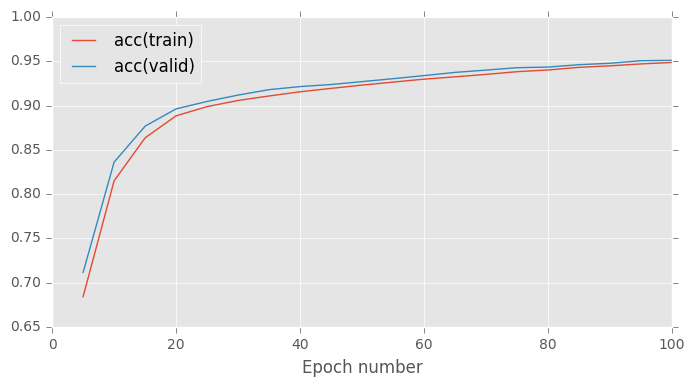

    final error(train) = 1.79e-01
    final error(valid) = 1.76e-01
    final acc(train)   = 9.49e-01
    final acc(valid)   = 9.51e-01
    run time per epoch = 1.55s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000', '0.95156000', '0.95044000', '0.94924000', '0.95120000', '0.94864000']


final accuracy (valid): 
['0.93560000

Epoch 5: 1.16s to complete
    error(train)=1.64e+00, acc(train)=6.55e-01, error(valid)=1.62e+00, acc(valid)=6.78e-01
Epoch 10: 1.98s to complete
    error(train)=8.33e-01, acc(train)=7.89e-01, error(valid)=7.98e-01, acc(valid)=8.12e-01
Epoch 15: 1.13s to complete
    error(train)=5.73e-01, acc(train)=8.47e-01, error(valid)=5.38e-01, acc(valid)=8.62e-01
Epoch 20: 1.14s to complete
    error(train)=4.54e-01, acc(train)=8.78e-01, error(valid)=4.23e-01, acc(valid)=8.87e-01
Epoch 25: 1.17s to complete
    error(train)=3.91e-01, acc(train)=8.94e-01, error(valid)=3.64e-01, acc(valid)=9.00e-01
Epoch 30: 1.16s to complete
    error(train)=3.54e-01, acc(train)=9.01e-01, error(valid)=3.30e-01, acc(valid)=9.07e-01
Epoch 35: 1.14s to complete
    error(train)=3.29e-01, acc(train)=9.07e-01, error(valid)=3.07e-01, acc(valid)=9.14e-01
Epoch 40: 1.17s to complete
    error(train)=3.10e-01, acc(train)=9.12e-01, error(valid)=2.89e-01, acc(valid)=9.18e-01
Epoch 45: 1.18s to complete
    error(train)=2.93

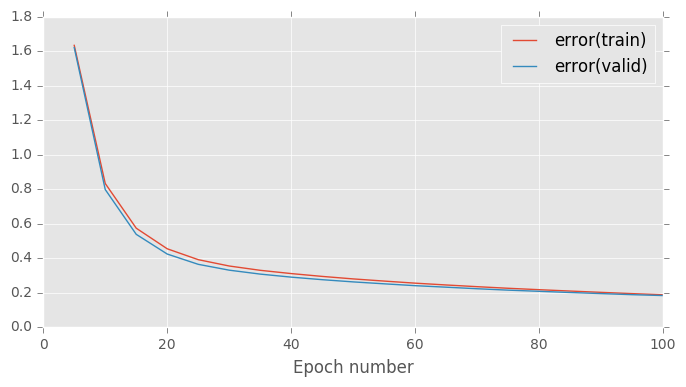

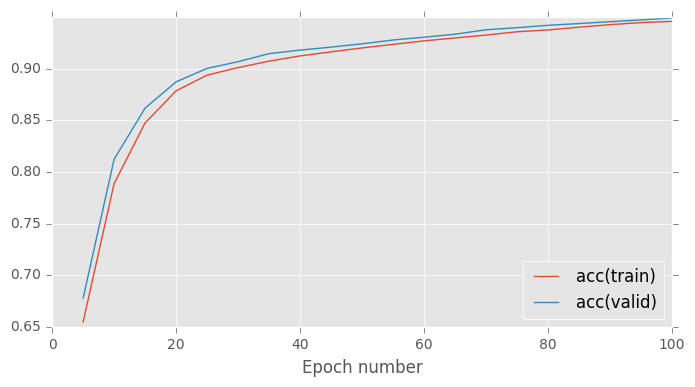

    final error(train) = 1.87e-01
    final error(valid) = 1.82e-01
    final acc(train)   = 9.46e-01
    final acc(valid)   = 9.49e-01
    run time per epoch = 1.35s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000', '0.95156000', '0.95044000', '0.94924000', '0.95120000', '0.94864000', '0.94572000

Epoch 5: 1.40s to complete
    error(train)=3.84e-01, acc(train)=8.95e-01, error(valid)=3.58e-01, acc(valid)=9.00e-01
Epoch 10: 1.22s to complete
    error(train)=2.75e-01, acc(train)=9.20e-01, error(valid)=2.59e-01, acc(valid)=9.26e-01
Epoch 15: 1.06s to complete
    error(train)=2.22e-01, acc(train)=9.35e-01, error(valid)=2.12e-01, acc(valid)=9.39e-01
Epoch 20: 1.07s to complete
    error(train)=1.83e-01, acc(train)=9.47e-01, error(valid)=1.80e-01, acc(valid)=9.50e-01
Epoch 25: 1.24s to complete
    error(train)=1.57e-01, acc(train)=9.55e-01, error(valid)=1.58e-01, acc(valid)=9.58e-01
Epoch 30: 1.29s to complete
    error(train)=1.35e-01, acc(train)=9.61e-01, error(valid)=1.42e-01, acc(valid)=9.61e-01
Epoch 35: 1.15s to complete
    error(train)=1.16e-01, acc(train)=9.66e-01, error(valid)=1.29e-01, acc(valid)=9.63e-01
Epoch 40: 1.26s to complete
    error(train)=1.03e-01, acc(train)=9.71e-01, error(valid)=1.20e-01, acc(valid)=9.66e-01
Epoch 45: 1.23s to complete
    error(train)=9.02

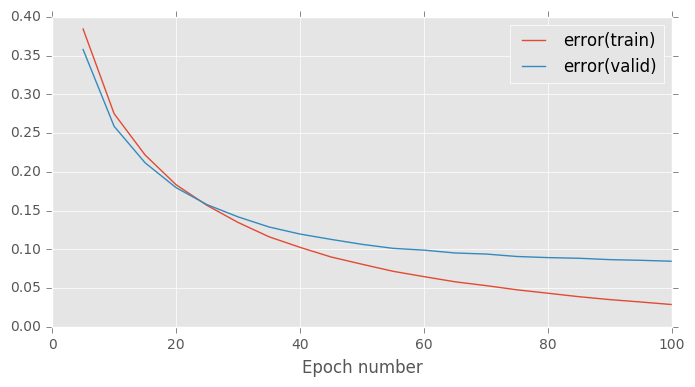

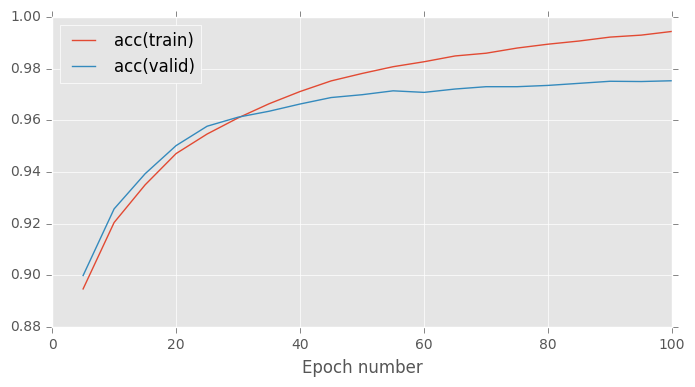

    final error(train) = 2.89e-02
    final error(valid) = 8.48e-02
    final acc(train)   = 9.94e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.36s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000', '0.95156000', '0.95044000', '0.94924000', '0.95120000

Epoch 5: 1.61s to complete
    error(train)=5.90e-01, acc(train)=8.43e-01, error(valid)=5.54e-01, acc(valid)=8.59e-01
Epoch 10: 1.49s to complete
    error(train)=3.33e-01, acc(train)=9.05e-01, error(valid)=3.11e-01, acc(valid)=9.13e-01
Epoch 15: 1.24s to complete
    error(train)=2.66e-01, acc(train)=9.22e-01, error(valid)=2.51e-01, acc(valid)=9.26e-01
Epoch 20: 1.22s to complete
    error(train)=2.21e-01, acc(train)=9.36e-01, error(valid)=2.11e-01, acc(valid)=9.41e-01
Epoch 25: 1.55s to complete
    error(train)=1.89e-01, acc(train)=9.46e-01, error(valid)=1.83e-01, acc(valid)=9.49e-01
Epoch 30: 1.17s to complete
    error(train)=1.62e-01, acc(train)=9.53e-01, error(valid)=1.63e-01, acc(valid)=9.56e-01
Epoch 35: 1.20s to complete
    error(train)=1.40e-01, acc(train)=9.59e-01, error(valid)=1.46e-01, acc(valid)=9.59e-01
Epoch 40: 1.31s to complete
    error(train)=1.23e-01, acc(train)=9.64e-01, error(valid)=1.34e-01, acc(valid)=9.62e-01
Epoch 45: 1.17s to complete
    error(train)=1.08

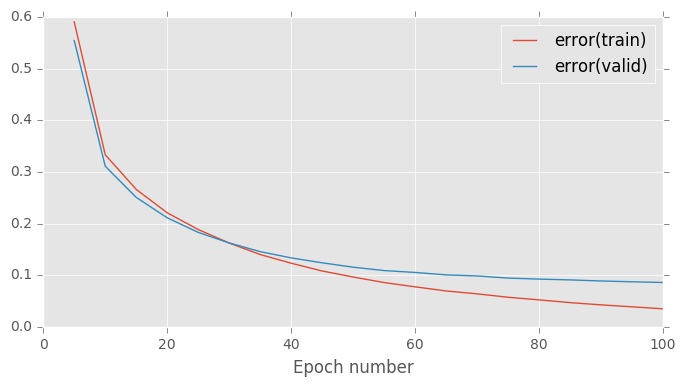

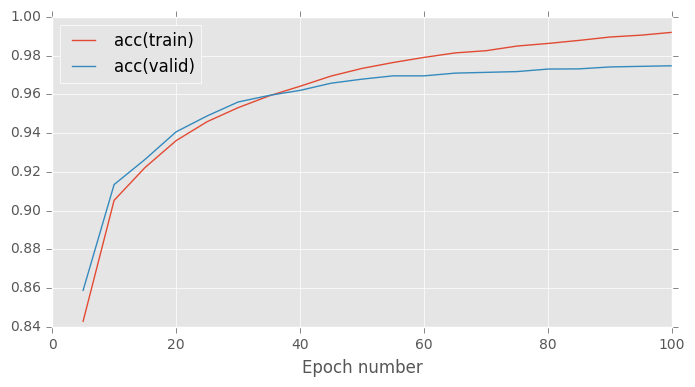

    final error(train) = 3.51e-02
    final error(valid) = 8.60e-02
    final acc(train)   = 9.92e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.49s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432', '0.03509021']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200', '0.08602184']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000', '0.95156000', '0.95044000

Epoch 5: 1.12s to complete
    error(train)=8.03e-01, acc(train)=7.94e-01, error(valid)=7.67e-01, acc(valid)=8.19e-01
Epoch 10: 1.20s to complete
    error(train)=3.79e-01, acc(train)=8.95e-01, error(valid)=3.54e-01, acc(valid)=9.02e-01
Epoch 15: 1.14s to complete
    error(train)=2.96e-01, acc(train)=9.14e-01, error(valid)=2.77e-01, acc(valid)=9.19e-01
Epoch 20: 1.13s to complete
    error(train)=2.47e-01, acc(train)=9.29e-01, error(valid)=2.34e-01, acc(valid)=9.33e-01
Epoch 25: 1.02s to complete
    error(train)=2.11e-01, acc(train)=9.39e-01, error(valid)=2.02e-01, acc(valid)=9.44e-01
Epoch 30: 1.16s to complete
    error(train)=1.82e-01, acc(train)=9.48e-01, error(valid)=1.78e-01, acc(valid)=9.51e-01
Epoch 35: 1.25s to complete
    error(train)=1.58e-01, acc(train)=9.54e-01, error(valid)=1.59e-01, acc(valid)=9.56e-01
Epoch 40: 1.26s to complete
    error(train)=1.39e-01, acc(train)=9.60e-01, error(valid)=1.45e-01, acc(valid)=9.61e-01
Epoch 45: 1.23s to complete
    error(train)=1.22

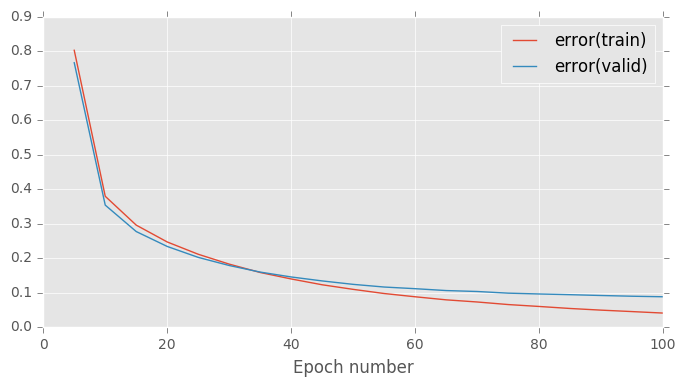

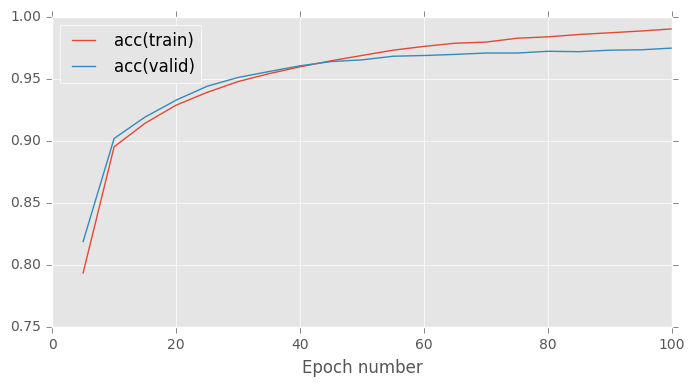

    final error(train) = 4.03e-02
    final error(valid) = 8.76e-02
    final acc(train)   = 9.90e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.43s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432', '0.03509021', '0.04027335']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200', '0.08602184', '0.08762988']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000', '0.95116000', '0.95066000

Epoch 5: 1.14s to complete
    error(train)=4.13e-01, acc(train)=8.89e-01, error(valid)=3.85e-01, acc(valid)=8.95e-01
Epoch 10: 1.68s to complete
    error(train)=2.91e-01, acc(train)=9.16e-01, error(valid)=2.73e-01, acc(valid)=9.22e-01
Epoch 15: 1.01s to complete
    error(train)=2.36e-01, acc(train)=9.31e-01, error(valid)=2.24e-01, acc(valid)=9.35e-01
Epoch 20: 1.02s to complete
    error(train)=1.96e-01, acc(train)=9.43e-01, error(valid)=1.90e-01, acc(valid)=9.46e-01
Epoch 25: 1.01s to complete
    error(train)=1.68e-01, acc(train)=9.52e-01, error(valid)=1.67e-01, acc(valid)=9.55e-01
Epoch 30: 1.03s to complete
    error(train)=1.45e-01, acc(train)=9.58e-01, error(valid)=1.49e-01, acc(valid)=9.60e-01
Epoch 35: 1.02s to complete
    error(train)=1.25e-01, acc(train)=9.64e-01, error(valid)=1.35e-01, acc(valid)=9.62e-01
Epoch 40: 1.04s to complete
    error(train)=1.10e-01, acc(train)=9.69e-01, error(valid)=1.25e-01, acc(valid)=9.64e-01
Epoch 45: 1.03s to complete
    error(train)=9.71

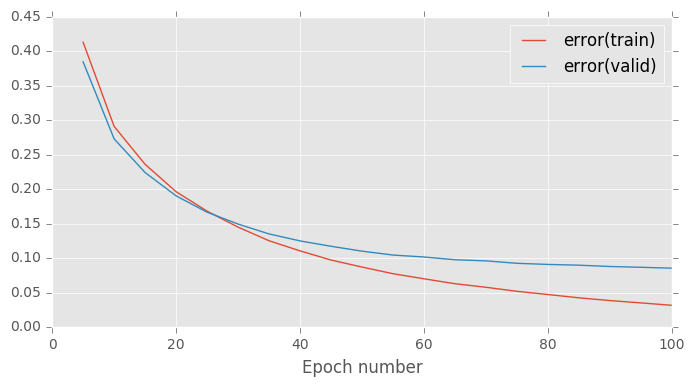

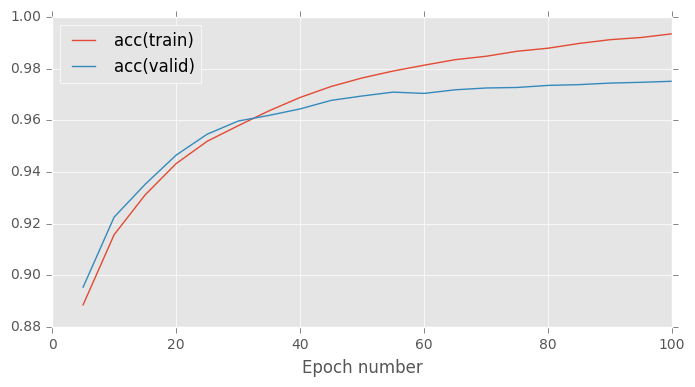

    final error(train) = 3.14e-02
    final error(valid) = 8.53e-02
    final acc(train)   = 9.93e-01
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.23s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432', '0.03509021', '0.04027335', '0.03138287']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200', '0.08602184', '0.08762988', '0.08531713']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000', '0.93106000', '0.95172000

Epoch 5: 1.04s to complete
    error(train)=7.83e-01, acc(train)=7.98e-01, error(valid)=7.46e-01, acc(valid)=8.22e-01
Epoch 10: 1.03s to complete
    error(train)=3.96e-01, acc(train)=8.91e-01, error(valid)=3.69e-01, acc(valid)=9.00e-01
Epoch 15: 1.03s to complete
    error(train)=3.10e-01, acc(train)=9.11e-01, error(valid)=2.89e-01, acc(valid)=9.17e-01
Epoch 20: 1.02s to complete
    error(train)=2.62e-01, acc(train)=9.25e-01, error(valid)=2.47e-01, acc(valid)=9.29e-01
Epoch 25: 1.02s to complete
    error(train)=2.26e-01, acc(train)=9.35e-01, error(valid)=2.15e-01, acc(valid)=9.39e-01
Epoch 30: 1.02s to complete
    error(train)=1.97e-01, acc(train)=9.44e-01, error(valid)=1.90e-01, acc(valid)=9.47e-01
Epoch 35: 1.40s to complete
    error(train)=1.72e-01, acc(train)=9.50e-01, error(valid)=1.70e-01, acc(valid)=9.53e-01
Epoch 40: 1.02s to complete
    error(train)=1.52e-01, acc(train)=9.56e-01, error(valid)=1.55e-01, acc(valid)=9.58e-01
Epoch 45: 1.02s to complete
    error(train)=1.35

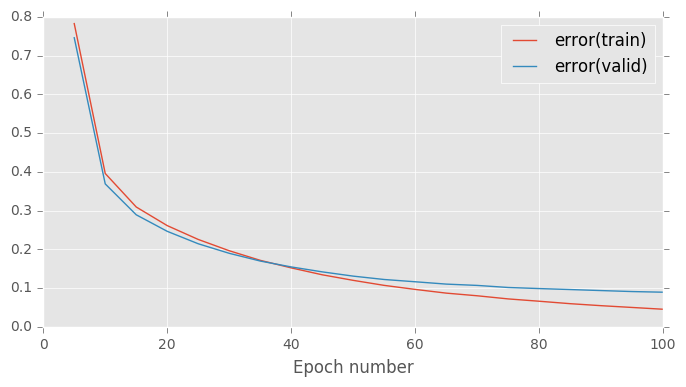

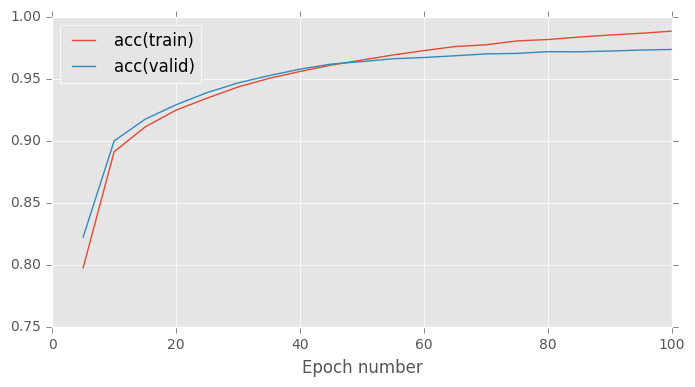

    final error(train) = 4.57e-02
    final error(valid) = 8.96e-02
    final acc(train)   = 9.89e-01
    final acc(valid)   = 9.74e-01
    run time per epoch = 1.26s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432', '0.03509021', '0.04027335', '0.03138287', '0.04565912']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200', '0.08602184', '0.08762988', '0.08531713', '0.08963656']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000', '0.93168000', '0.93144000

Epoch 5: 1.57s to complete
    error(train)=1.17e+00, acc(train)=7.16e-01, error(valid)=1.15e+00, acc(valid)=7.44e-01
Epoch 10: 1.33s to complete
    error(train)=5.11e-01, acc(train)=8.64e-01, error(valid)=4.78e-01, acc(valid)=8.77e-01
Epoch 15: 1.19s to complete
    error(train)=3.59e-01, acc(train)=9.00e-01, error(valid)=3.35e-01, acc(valid)=9.06e-01
Epoch 20: 1.26s to complete
    error(train)=3.02e-01, acc(train)=9.14e-01, error(valid)=2.82e-01, acc(valid)=9.20e-01
Epoch 25: 1.17s to complete
    error(train)=2.63e-01, acc(train)=9.24e-01, error(valid)=2.47e-01, acc(valid)=9.28e-01
Epoch 30: 1.14s to complete
    error(train)=2.31e-01, acc(train)=9.33e-01, error(valid)=2.19e-01, acc(valid)=9.38e-01
Epoch 35: 1.44s to complete
    error(train)=2.04e-01, acc(train)=9.41e-01, error(valid)=1.96e-01, acc(valid)=9.45e-01
Epoch 40: 1.74s to complete
    error(train)=1.82e-01, acc(train)=9.47e-01, error(valid)=1.78e-01, acc(valid)=9.51e-01
Epoch 45: 1.07s to complete
    error(train)=1.62

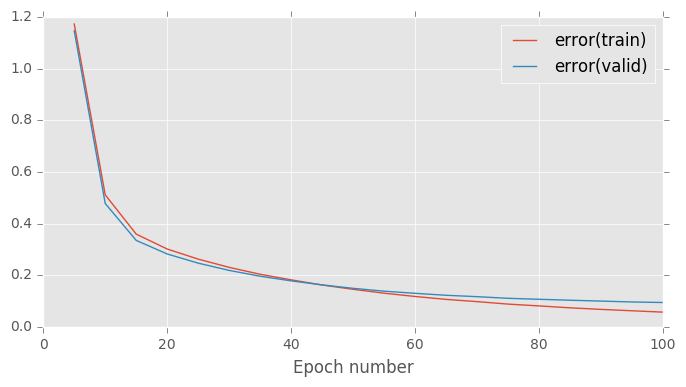

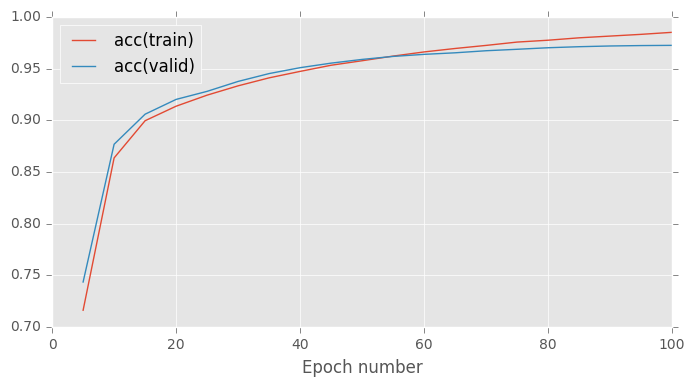

    final error(train) = 5.73e-02
    final error(valid) = 9.46e-02
    final acc(train)   = 9.85e-01
    final acc(valid)   = 9.72e-01
    run time per epoch = 1.67s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432', '0.03509021', '0.04027335', '0.03138287', '0.04565912', '0.05731860']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200', '0.08602184', '0.08762988', '0.08531713', '0.08963656', '0.09456435']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000', '0.93158000', '0.93148000

Epoch 5: 1.05s to complete
    error(train)=4.40e-01, acc(train)=8.82e-01, error(valid)=4.10e-01, acc(valid)=8.90e-01
Epoch 10: 1.43s to complete
    error(train)=3.08e-01, acc(train)=9.12e-01, error(valid)=2.88e-01, acc(valid)=9.19e-01
Epoch 15: 1.46s to complete
    error(train)=2.53e-01, acc(train)=9.27e-01, error(valid)=2.39e-01, acc(valid)=9.29e-01
Epoch 20: 1.19s to complete
    error(train)=2.13e-01, acc(train)=9.38e-01, error(valid)=2.05e-01, acc(valid)=9.43e-01
Epoch 25: 1.16s to complete
    error(train)=1.84e-01, acc(train)=9.47e-01, error(valid)=1.80e-01, acc(valid)=9.50e-01
Epoch 30: 1.91s to complete
    error(train)=1.60e-01, acc(train)=9.54e-01, error(valid)=1.61e-01, acc(valid)=9.57e-01
Epoch 35: 1.24s to complete
    error(train)=1.39e-01, acc(train)=9.60e-01, error(valid)=1.45e-01, acc(valid)=9.59e-01
Epoch 40: 1.96s to complete
    error(train)=1.23e-01, acc(train)=9.64e-01, error(valid)=1.34e-01, acc(valid)=9.62e-01
Epoch 45: 1.19s to complete
    error(train)=1.09

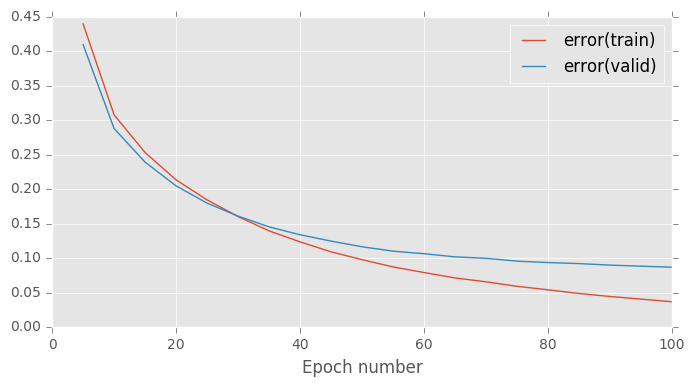

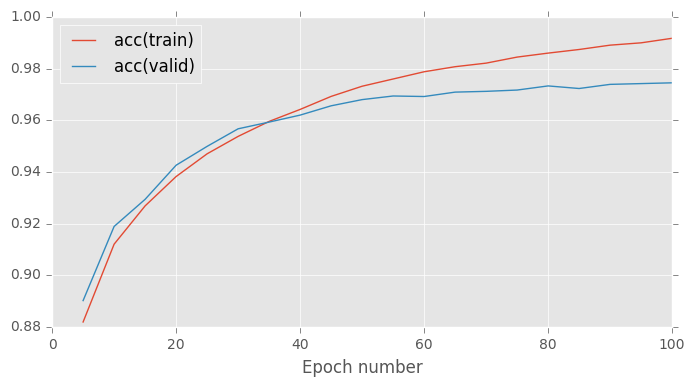

    final error(train) = 3.65e-02
    final error(valid) = 8.68e-02
    final acc(train)   = 9.92e-01
    final acc(valid)   = 9.74e-01
    run time per epoch = 1.54s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432', '0.03509021', '0.04027335', '0.03138287', '0.04565912', '0.05731860', '0.03651405']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200', '0.08602184', '0.08762988', '0.08531713', '0.08963656', '0.09456435', '0.08676014']


final accuracy (train): 
['0.93182000', '0.93168000', '0.93158000', '0.93176000

Epoch 5: 1.10s to complete
    error(train)=9.49e-01, acc(train)=7.59e-01, error(valid)=9.16e-01, acc(valid)=7.87e-01
Epoch 10: 1.20s to complete
    error(train)=4.84e-01, acc(train)=8.70e-01, error(valid)=4.52e-01, acc(valid)=8.82e-01
Epoch 15: 1.32s to complete
    error(train)=3.60e-01, acc(train)=8.99e-01, error(valid)=3.35e-01, acc(valid)=9.06e-01
Epoch 20: 1.18s to complete
    error(train)=3.08e-01, acc(train)=9.12e-01, error(valid)=2.88e-01, acc(valid)=9.19e-01
Epoch 25: 1.20s to complete
    error(train)=2.72e-01, acc(train)=9.22e-01, error(valid)=2.55e-01, acc(valid)=9.26e-01
Epoch 30: 1.12s to complete
    error(train)=2.42e-01, acc(train)=9.30e-01, error(valid)=2.29e-01, acc(valid)=9.34e-01
Epoch 35: 1.28s to complete
    error(train)=2.17e-01, acc(train)=9.37e-01, error(valid)=2.07e-01, acc(valid)=9.42e-01
Epoch 40: 1.16s to complete
    error(train)=1.96e-01, acc(train)=9.43e-01, error(valid)=1.89e-01, acc(valid)=9.48e-01
Epoch 45: 1.20s to complete
    error(train)=1.76

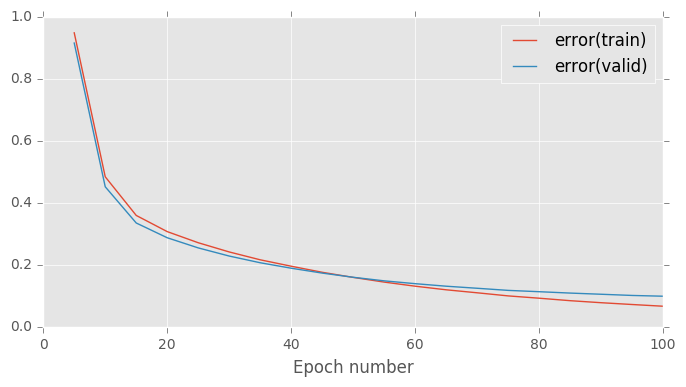

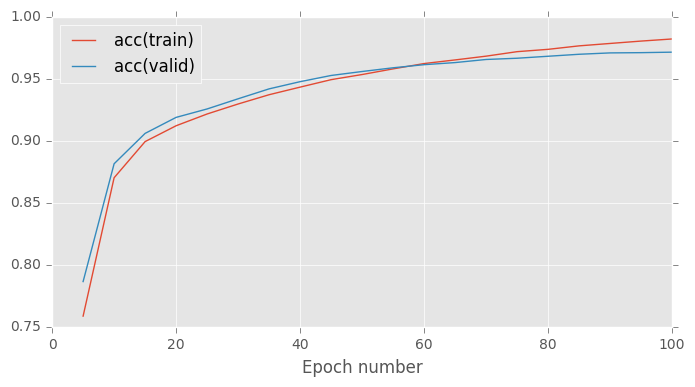

    final error(train) = 6.68e-02
    final error(valid) = 9.91e-02
    final acc(train)   = 9.82e-01
    final acc(valid)   = 9.72e-01
    run time per epoch = 1.45s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432', '0.03509021', '0.04027335', '0.03138287', '0.04565912', '0.05731860', '0.03651405', '0.06680219']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200', '0.08602184', '0.08762988', '0.08531713', '0.08963656', '0.09456435', '0.08676014', '0.09912128']


final accuracy (train): 
['0.93182000', '0.93168000

Epoch 5: 1.16s to complete
    error(train)=1.48e+00, acc(train)=6.73e-01, error(valid)=1.46e+00, acc(valid)=6.98e-01
Epoch 10: 1.13s to complete
    error(train)=6.88e-01, acc(train)=8.21e-01, error(valid)=6.52e-01, acc(valid)=8.41e-01
Epoch 15: 1.31s to complete
    error(train)=4.60e-01, acc(train)=8.77e-01, error(valid)=4.29e-01, acc(valid)=8.87e-01
Epoch 20: 1.10s to complete
    error(train)=3.67e-01, acc(train)=8.98e-01, error(valid)=3.43e-01, acc(valid)=9.04e-01
Epoch 25: 1.05s to complete
    error(train)=3.22e-01, acc(train)=9.09e-01, error(valid)=3.00e-01, acc(valid)=9.14e-01
Epoch 30: 1.16s to complete
    error(train)=2.89e-01, acc(train)=9.17e-01, error(valid)=2.71e-01, acc(valid)=9.22e-01
Epoch 35: 1.20s to complete
    error(train)=2.62e-01, acc(train)=9.24e-01, error(valid)=2.47e-01, acc(valid)=9.28e-01
Epoch 40: 1.21s to complete
    error(train)=2.40e-01, acc(train)=9.31e-01, error(valid)=2.27e-01, acc(valid)=9.34e-01
Epoch 45: 1.00s to complete
    error(train)=2.19

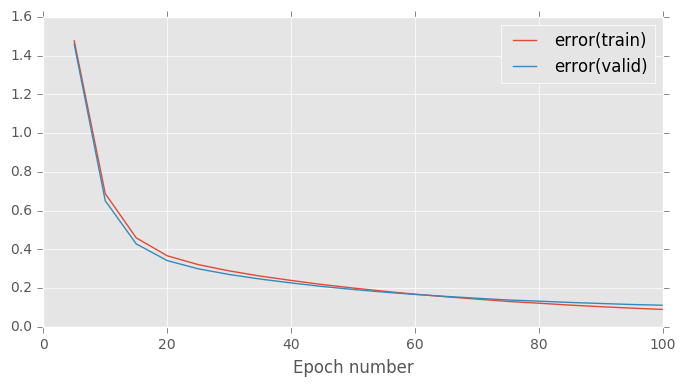

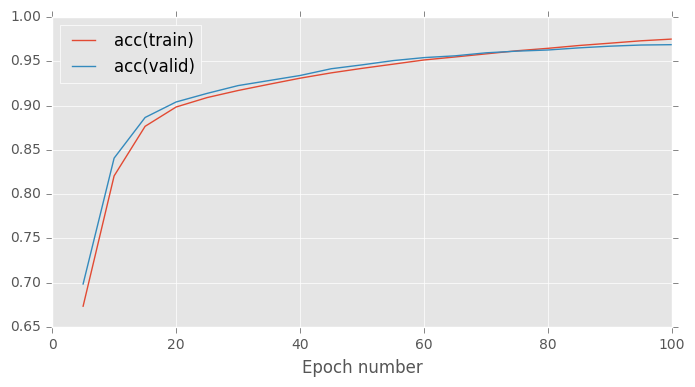

    final error(train) = 9.03e-02
    final error(valid) = 1.12e-01
    final acc(train)   = 9.75e-01
    final acc(valid)   = 9.69e-01
    run time per epoch = 1.60s


final errors (train): 
['0.23598215', '0.23624986', '0.23651138', '0.23606003', '0.23663545', '0.23719885', '0.23621472', '0.23739966', '0.23855849', '0.16750818', '0.16960257', '0.17145340', '0.16818010', '0.17272515', '0.17674648', '0.16950910', '0.17881267', '0.18693261', '0.02887432', '0.03509021', '0.04027335', '0.03138287', '0.04565912', '0.05731860', '0.03651405', '0.06680219', '0.09025389']


final errors (valid): 
['0.22395605', '0.22419003', '0.22441864', '0.22402409', '0.22452697', '0.22501955', '0.22415922', '0.22519494', '0.22620860', '0.16655601', '0.16821712', '0.16969097', '0.16708778', '0.17070688', '0.17393820', '0.16814215', '0.17560840', '0.18223675', '0.08477200', '0.08602184', '0.08762988', '0.08531713', '0.08963656', '0.09456435', '0.08676014', '0.09912128', '0.11197722']


final accuracy (train):

In [5]:
from mlp.learning_rules import MomentumLearningRule
from mlp.schedulers import IncreasingMomentumLearningRateScheduler

# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
learning_rate = 0.005  # learning rate for gradient descent
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

init_scale = 0.1  # scale for random parameter initialisation

alpha_infs = [0.1, 0.5, 0.9]
taos = [1, 3, 9]
gamma_to_taos = [0.1, 0.5, 0.9]

final_errors_train_mom_inc = []
final_errors_valid_mom_inc = []
final_accs_train_mom_inc = []
final_accs_valid_mom_inc = []

iter_key = []

# Iterate over momentum coefficients
for alpha_inf in alpha_infs:
    for tao in taos:
        for gamma in [x * tao for x in gamma_to_taos]:            
            
            iter_key.append([alpha_inf, tao, gamma])
            print('-' * 80)
            print 'alpha = ' + str(alpha_inf)
            print 'tao = ' + str(tao)
            print 'gamma = ' + str(gamma)
            print('-' * 80)
#             print iter_key
            
            schedulers = [IncreasingMomentumLearningRateScheduler(initial_learning_rate = learning_rate,
                                                                  alpha_inf            = alpha_inf,
                                                                  gamma                = gamma,
                                                                  tao                  = tao)]
#             print('-' * 80)
#             print('alpha_inf={0:.2f} tao={0:.2f} gamma={0:.2f}'
#                   .format(alpha_inf, tao, gamma))
#             print('-' * 80)

            # Reset random number generator and data provider states on each run
            # to ensure reproducibility of results
            rng.seed(seed)
            train_data.reset()
            valid_data.reset()

            # Alter data-provider batch size
            train_data.batch_size = batch_size 
            valid_data.batch_size = batch_size

            # Create a parameter initialiser which will sample random uniform values
            # from [-init_scale, init_scale]
            param_init = UniformInit(-init_scale, init_scale, rng=rng)

            # Create a model with two affine layers
            hidden_dim = 100
            model = MultipleLayerModel([
                AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
                SigmoidLayer(),
                AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
                SigmoidLayer(),
                AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
            ])

            # Initialise a cross entropy error object
            error = CrossEntropySoftmaxError()

            # Use a basic gradient descent learning rule
            learning_rule = MomentumLearningRule(learning_rate=learning_rate)

            stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
                model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedulers)

            plt.show()

            # Print stats for all 
            print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
            print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
            print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
            print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
            print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

            final_errors_train_mom_inc.append(stats[-1, keys['error(train)']])
            final_errors_valid_mom_inc.append(stats[-1, keys['error(valid)']])
            final_accs_train_mom_inc.append(stats[-1, keys['acc(train)']])
            final_accs_valid_mom_inc.append(stats[-1, keys['acc(valid)']])

            print '\n'

            print 'final errors (train): '
            print ["{0:.8f}".format(x) for x in final_errors_train_mom_inc]
            print '\n'

            print 'final errors (valid): '
            print ["{0:.8f}".format(x) for x in final_errors_valid_mom_inc]
            print '\n'

            print 'final accuracy (train): '
            print ["{0:.8f}".format(x) for x in final_accs_train_mom_inc]
            print '\n'

            print 'final accuracy (valid): '
            print ["{0:.8f}".format(x) for x in final_accs_valid_mom_inc]
            print '\n'

In [29]:
iter_key

[[0.1, 1, 0.1],
 [0.1, 1, 0.5],
 [0.1, 1, 0.9],
 [0.1, 3, 0.30000000000000004],
 [0.1, 3, 1.5],
 [0.1, 3, 2.7],
 [0.1, 9, 0.9],
 [0.1, 9, 4.5],
 [0.1, 9, 8.1],
 [0.5, 1, 0.1],
 [0.5, 1, 0.5],
 [0.5, 1, 0.9],
 [0.5, 3, 0.30000000000000004],
 [0.5, 3, 1.5],
 [0.5, 3, 2.7],
 [0.5, 9, 0.9],
 [0.5, 9, 4.5],
 [0.5, 9, 8.1],
 [0.9, 1, 0.1],
 [0.9, 1, 0.5],
 [0.9, 1, 0.9],
 [0.9, 3, 0.30000000000000004],
 [0.9, 3, 1.5],
 [0.9, 3, 2.7],
 [0.9, 9, 0.9],
 [0.9, 9, 4.5],
 [0.9, 9, 8.1]]

In [61]:
for k in iter_key:
    print '$$\\alpha_{\infty} = {0:.1f}, \\tau = {1:1.0f}, \\gamma = {2:1.1f}$$'.format(k[0], k[1], k[2])

print '\n'

for s in final_errors_valid_mom:
    print '{0:.8f}'.format(s)

print '\n'
    
for s in final_accs_valid_mom:
    print '{0:.4f}'.format(s)

$$\alpha = 0.1, \tau = 1, \gamma = 0.1$$
$$\alpha = 0.1, \tau = 1, \gamma = 0.5$$
$$\alpha = 0.1, \tau = 1, \gamma = 0.9$$
$$\alpha = 0.1, \tau = 3, \gamma = 0.3$$
$$\alpha = 0.1, \tau = 3, \gamma = 1.5$$
$$\alpha = 0.1, \tau = 3, \gamma = 2.7$$
$$\alpha = 0.1, \tau = 9, \gamma = 0.9$$
$$\alpha = 0.1, \tau = 9, \gamma = 4.5$$
$$\alpha = 0.1, \tau = 9, \gamma = 8.1$$
$$\alpha = 0.5, \tau = 1, \gamma = 0.1$$
$$\alpha = 0.5, \tau = 1, \gamma = 0.5$$
$$\alpha = 0.5, \tau = 1, \gamma = 0.9$$
$$\alpha = 0.5, \tau = 3, \gamma = 0.3$$
$$\alpha = 0.5, \tau = 3, \gamma = 1.5$$
$$\alpha = 0.5, \tau = 3, \gamma = 2.7$$
$$\alpha = 0.5, \tau = 9, \gamma = 0.9$$
$$\alpha = 0.5, \tau = 9, \gamma = 4.5$$
$$\alpha = 0.5, \tau = 9, \gamma = 8.1$$
$$\alpha = 0.9, \tau = 1, \gamma = 0.1$$
$$\alpha = 0.9, \tau = 1, \gamma = 0.5$$
$$\alpha = 0.9, \tau = 1, \gamma = 0.9$$
$$\alpha = 0.9, \tau = 3, \gamma = 0.3$$
$$\alpha = 0.9, \tau = 3, \gamma = 1.5$$
$$\alpha = 0.9, \tau = 3, \gamma = 2.7$$
$$\alpha = 0.9, 

## Part 3: Adaptive learning rules

In [ ]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=50, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=50, rng=rng)

In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit

input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()

### AdaGrad

--------------------------------------------------------------------------------
learning_rate=0.2
--------------------------------------------------------------------------------


Epoch 5: 3.10s to complete
    error(train)=5.91e-02, acc(train)=9.84e-01, error(valid)=1.18e-01, acc(valid)=9.67e-01
Epoch 10: 1.63s to complete
    error(train)=2.64e-02, acc(train)=9.94e-01, error(valid)=1.20e-01, acc(valid)=9.69e-01
Epoch 15: 2.58s to complete
    error(train)=1.23e-02, acc(train)=9.98e-01, error(valid)=1.24e-01, acc(valid)=9.71e-01
Epoch 20: 1.90s to complete
    error(train)=6.01e-03, acc(train)=9.99e-01, error(valid)=1.30e-01, acc(valid)=9.72e-01
Epoch 25: 1.67s to complete
    error(train)=3.58e-03, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.70e-01
Epoch 30: 1.82s to complete
    error(train)=2.48e-03, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.69e-01
Epoch 35: 1.53s to complete
    error(train)=1.78e-03, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.70e-01
Epoch 40: 1.60s to complete
    error(train)=1.33e-03, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.70e-01
Epoch 45: 1.61s to complete
    error(train)=1.03

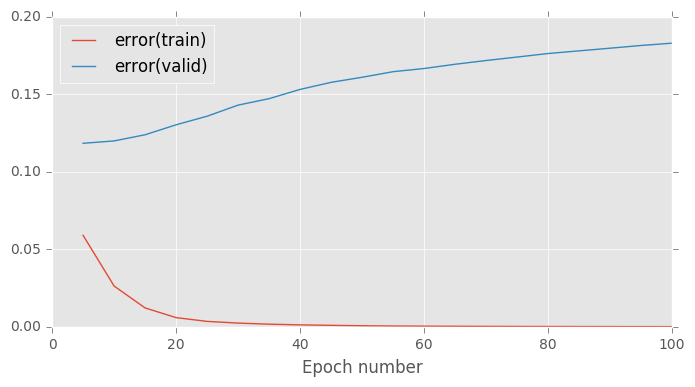

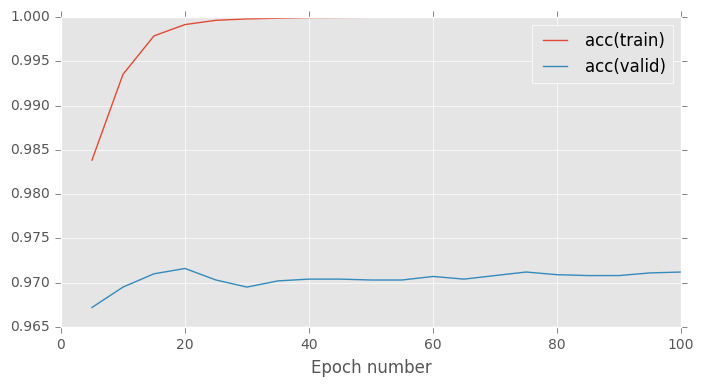

    final error(train) = 2.01e-04
    final error(valid) = 1.83e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.71e-01
    run time per epoch = 1.99s


final errors (train): 
['0.00020118']


final errors (valid): 
['0.18308162']


final accuracy (train): 
['1.00000000']


final accuracy (valid): 
['0.97120000']


final run time: 
['199.28608513']


--------------------------------------------------------------------------------
learning_rate=0.06667
--------------------------------------------------------------------------------


Epoch 5: 1.62s to complete
    error(train)=3.78e-02, acc(train)=9.90e-01, error(valid)=8.22e-02, acc(valid)=9.76e-01
Epoch 10: 2.01s to complete
    error(train)=1.53e-02, acc(train)=9.97e-01, error(valid)=7.89e-02, acc(valid)=9.76e-01
Epoch 15: 1.71s to complete
    error(train)=7.60e-03, acc(train)=9.99e-01, error(valid)=7.92e-02, acc(valid)=9.78e-01
Epoch 20: 1.66s to complete
    error(train)=4.16e-03, acc(train)=1.00e+00, error(valid)=8.18e-02, acc(valid)=9.78e-01
Epoch 25: 1.68s to complete
    error(train)=2.76e-03, acc(train)=1.00e+00, error(valid)=8.45e-02, acc(valid)=9.78e-01
Epoch 30: 2.36s to complete
    error(train)=1.95e-03, acc(train)=1.00e+00, error(valid)=8.63e-02, acc(valid)=9.79e-01
Epoch 35: 2.59s to complete
    error(train)=1.52e-03, acc(train)=1.00e+00, error(valid)=8.88e-02, acc(valid)=9.78e-01
Epoch 40: 1.59s to complete
    error(train)=1.24e-03, acc(train)=1.00e+00, error(valid)=9.02e-02, acc(valid)=9.79e-01
Epoch 45: 1.77s to complete
    error(train)=1.04

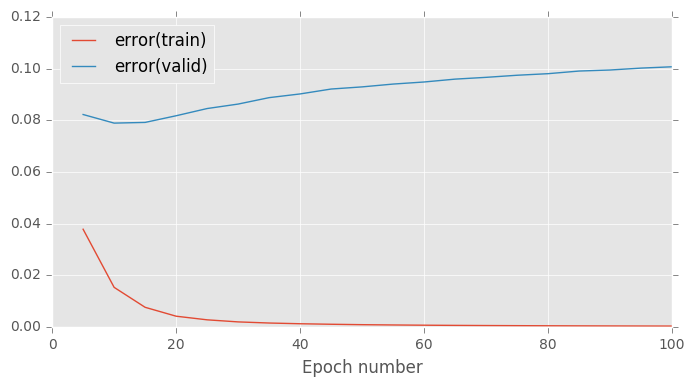

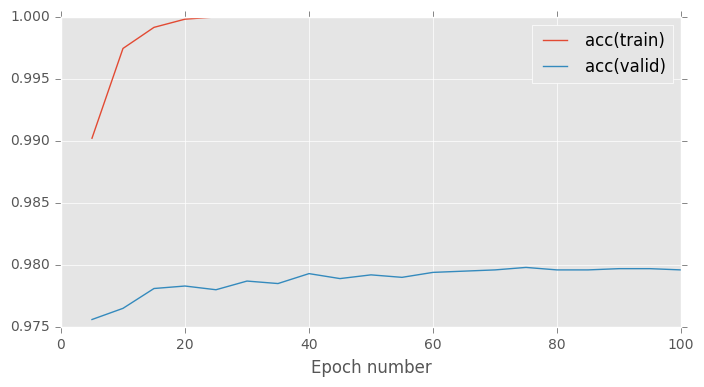

    final error(train) = 3.37e-04
    final error(valid) = 1.01e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.80e-01
    run time per epoch = 2.01s


final errors (train): 
['0.00020118', '0.00033660']


final errors (valid): 
['0.18308162', '0.10070961']


final accuracy (train): 
['1.00000000', '1.00000000']


final accuracy (valid): 
['0.97120000', '0.97960000']


final run time: 
['199.28608513', '200.80751801']


--------------------------------------------------------------------------------
learning_rate=0.02222
--------------------------------------------------------------------------------


Epoch 5: 3.62s to complete
    error(train)=1.20e-01, acc(train)=9.66e-01, error(valid)=1.32e-01, acc(valid)=9.62e-01
Epoch 10: 2.15s to complete
    error(train)=8.34e-02, acc(train)=9.77e-01, error(valid)=1.09e-01, acc(valid)=9.67e-01
Epoch 15: 2.49s to complete
    error(train)=6.47e-02, acc(train)=9.83e-01, error(valid)=9.79e-02, acc(valid)=9.71e-01
Epoch 20: 1.91s to complete
    error(train)=5.27e-02, acc(train)=9.86e-01, error(valid)=9.17e-02, acc(valid)=9.72e-01
Epoch 25: 1.60s to complete
    error(train)=4.41e-02, acc(train)=9.89e-01, error(valid)=8.74e-02, acc(valid)=9.74e-01
Epoch 30: 1.72s to complete
    error(train)=3.73e-02, acc(train)=9.92e-01, error(valid)=8.45e-02, acc(valid)=9.74e-01
Epoch 35: 3.18s to complete
    error(train)=3.23e-02, acc(train)=9.93e-01, error(valid)=8.37e-02, acc(valid)=9.74e-01
Epoch 40: 1.57s to complete
    error(train)=2.77e-02, acc(train)=9.94e-01, error(valid)=8.18e-02, acc(valid)=9.75e-01
Epoch 45: 1.60s to complete
    error(train)=2.42

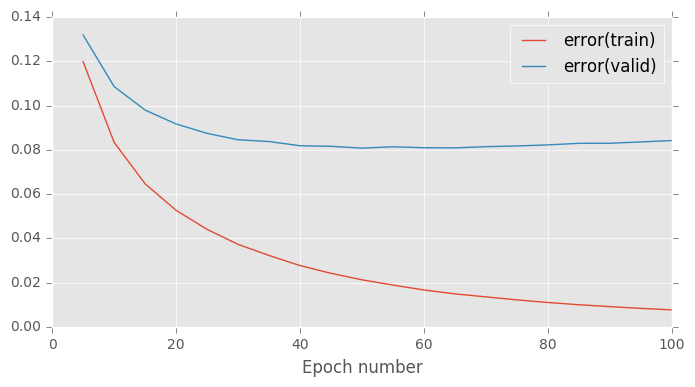

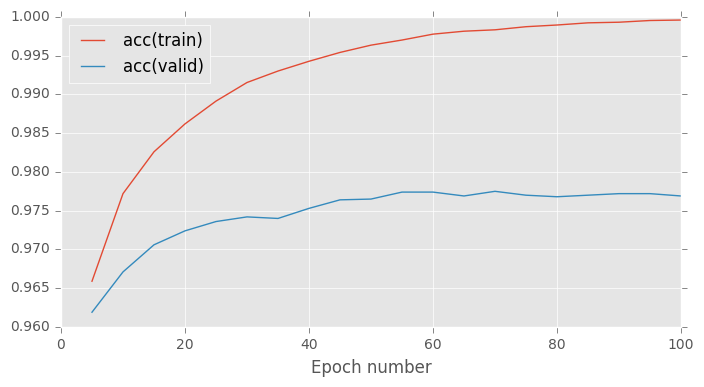

    final error(train) = 7.70e-03
    final error(valid) = 8.42e-02
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.77e-01
    run time per epoch = 2.33s


final errors (train): 
['0.00020118', '0.00033660', '0.00770021']


final errors (valid): 
['0.18308162', '0.10070961', '0.08419298']


final accuracy (train): 
['1.00000000', '1.00000000', '0.99960000']


final accuracy (valid): 
['0.97120000', '0.97960000', '0.97690000']


final run time: 
['199.28608513', '200.80751801', '233.09765482']


--------------------------------------------------------------------------------
learning_rate=0.007407
--------------------------------------------------------------------------------


Epoch 5: 1.89s to complete
    error(train)=2.41e-01, acc(train)=9.31e-01, error(valid)=2.28e-01, acc(valid)=9.34e-01
Epoch 10: 2.33s to complete
    error(train)=1.99e-01, acc(train)=9.43e-01, error(valid)=1.93e-01, acc(valid)=9.45e-01
Epoch 15: 2.21s to complete
    error(train)=1.75e-01, acc(train)=9.49e-01, error(valid)=1.74e-01, acc(valid)=9.51e-01
Epoch 20: 1.87s to complete
    error(train)=1.59e-01, acc(train)=9.54e-01, error(valid)=1.61e-01, acc(valid)=9.54e-01
Epoch 25: 1.93s to complete
    error(train)=1.47e-01, acc(train)=9.58e-01, error(valid)=1.52e-01, acc(valid)=9.57e-01
Epoch 30: 1.94s to complete
    error(train)=1.37e-01, acc(train)=9.60e-01, error(valid)=1.45e-01, acc(valid)=9.59e-01
Epoch 35: 1.95s to complete
    error(train)=1.29e-01, acc(train)=9.63e-01, error(valid)=1.39e-01, acc(valid)=9.60e-01
Epoch 40: 1.89s to complete
    error(train)=1.22e-01, acc(train)=9.65e-01, error(valid)=1.34e-01, acc(valid)=9.61e-01
Epoch 45: 2.06s to complete
    error(train)=1.15

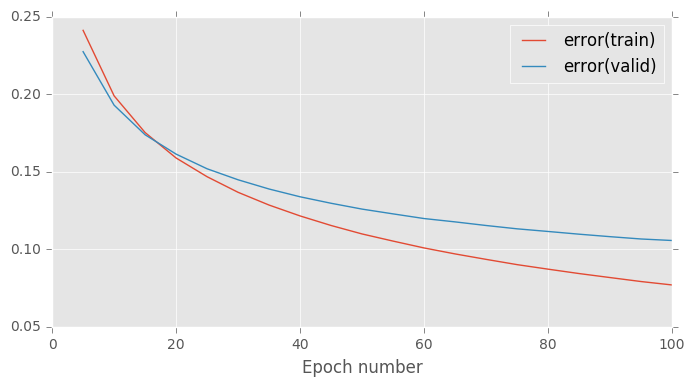

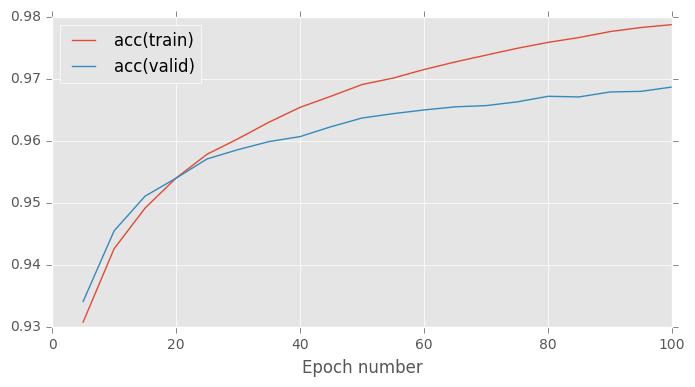

    final error(train) = 7.71e-02
    final error(valid) = 1.06e-01
    final acc(train)   = 9.79e-01
    final acc(valid)   = 9.69e-01
    run time per epoch = 2.25s


final errors (train): 
['0.00020118', '0.00033660', '0.00770021', '0.07708645']


final errors (valid): 
['0.18308162', '0.10070961', '0.08419298', '0.10576839']


final accuracy (train): 
['1.00000000', '1.00000000', '0.99960000', '0.97876000']


final accuracy (valid): 
['0.97120000', '0.97960000', '0.97690000', '0.96870000']


final run time: 
['199.28608513', '200.80751801', '233.09765482', '225.26620007']


--------------------------------------------------------------------------------
learning_rate=0.002469
--------------------------------------------------------------------------------


Epoch 5: 2.09s to complete
    error(train)=4.54e-01, acc(train)=8.89e-01, error(valid)=4.23e-01, acc(valid)=9.00e-01
Epoch 10: 1.63s to complete
    error(train)=3.55e-01, acc(train)=9.05e-01, error(valid)=3.29e-01, acc(valid)=9.14e-01
Epoch 15: 3.25s to complete
    error(train)=3.15e-01, acc(train)=9.14e-01, error(valid)=2.92e-01, acc(valid)=9.21e-01
Epoch 20: 2.90s to complete
    error(train)=2.91e-01, acc(train)=9.19e-01, error(valid)=2.70e-01, acc(valid)=9.25e-01
Epoch 25: 1.75s to complete
    error(train)=2.74e-01, acc(train)=9.23e-01, error(valid)=2.55e-01, acc(valid)=9.29e-01
Epoch 30: 1.75s to complete
    error(train)=2.62e-01, acc(train)=9.26e-01, error(valid)=2.45e-01, acc(valid)=9.31e-01
Epoch 35: 2.38s to complete
    error(train)=2.51e-01, acc(train)=9.28e-01, error(valid)=2.36e-01, acc(valid)=9.33e-01
Epoch 40: 1.94s to complete
    error(train)=2.43e-01, acc(train)=9.31e-01, error(valid)=2.29e-01, acc(valid)=9.35e-01
Epoch 45: 1.97s to complete
    error(train)=2.36

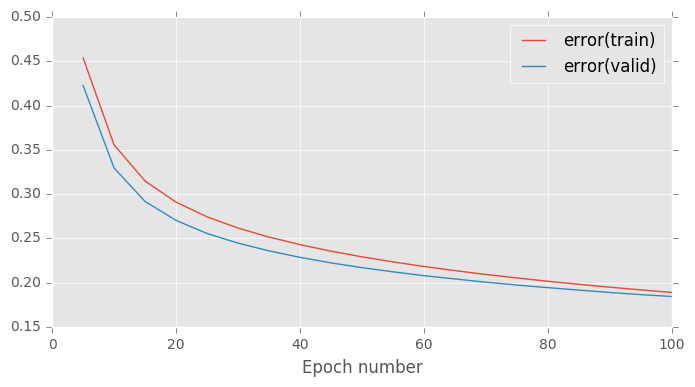

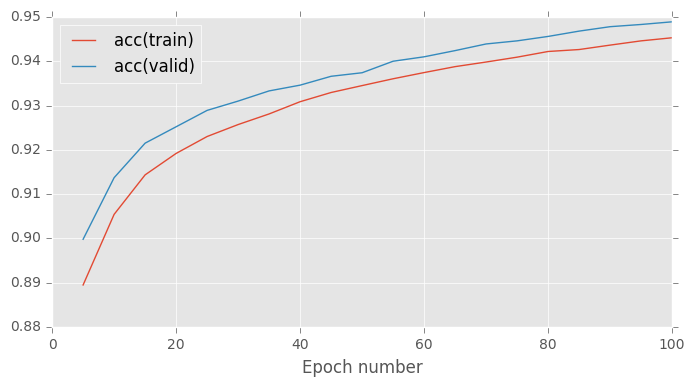

    final error(train) = 1.89e-01
    final error(valid) = 1.84e-01
    final acc(train)   = 9.45e-01
    final acc(valid)   = 9.49e-01
    run time per epoch = 2.39s


final errors (train): 
['0.00020118', '0.00033660', '0.00770021', '0.07708645', '0.18894904']


final errors (valid): 
['0.18308162', '0.10070961', '0.08419298', '0.10576839', '0.18433384']


final accuracy (train): 
['1.00000000', '1.00000000', '0.99960000', '0.97876000', '0.94530000']


final accuracy (valid): 
['0.97120000', '0.97960000', '0.97690000', '0.96870000', '0.94890000']


final run time: 
['199.28608513', '200.80751801', '233.09765482', '225.26620007', '239.45411491']


--------------------------------------------------------------------------------
learning_rate=0.000823
--------------------------------------------------------------------------------


Epoch 5: 3.10s to complete
    error(train)=1.10e+00, acc(train)=7.65e-01, error(valid)=1.07e+00, acc(valid)=7.91e-01
Epoch 10: 1.62s to complete
    error(train)=8.32e-01, acc(train)=8.21e-01, error(valid)=8.01e-01, acc(valid)=8.43e-01
Epoch 15: 1.68s to complete
    error(train)=7.02e-01, acc(train)=8.45e-01, error(valid)=6.69e-01, acc(valid)=8.64e-01
Epoch 20: 2.51s to complete
    error(train)=6.22e-01, acc(train)=8.59e-01, error(valid)=5.89e-01, acc(valid)=8.75e-01
Epoch 25: 1.64s to complete
    error(train)=5.67e-01, acc(train)=8.69e-01, error(valid)=5.34e-01, acc(valid)=8.83e-01
Epoch 30: 1.77s to complete
    error(train)=5.26e-01, acc(train)=8.77e-01, error(valid)=4.93e-01, acc(valid)=8.90e-01
Epoch 35: 1.65s to complete
    error(train)=4.95e-01, acc(train)=8.82e-01, error(valid)=4.63e-01, acc(valid)=8.94e-01
Epoch 40: 2.17s to complete
    error(train)=4.69e-01, acc(train)=8.86e-01, error(valid)=4.38e-01, acc(valid)=8.98e-01
Epoch 45: 2.21s to complete
    error(train)=4.49

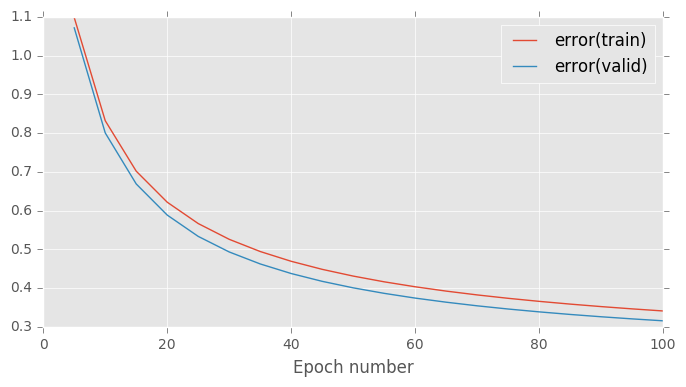

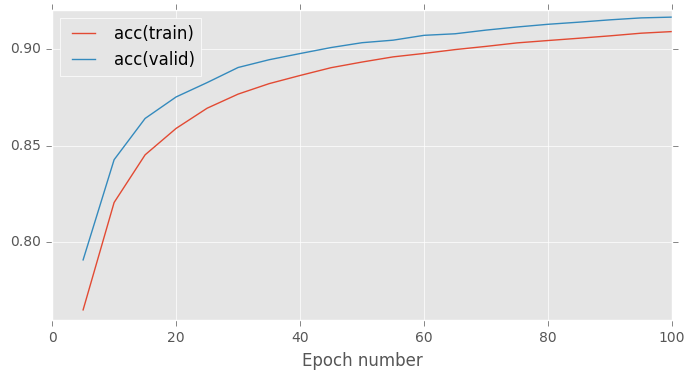

    final error(train) = 3.41e-01
    final error(valid) = 3.16e-01
    final acc(train)   = 9.09e-01
    final acc(valid)   = 9.16e-01
    run time per epoch = 2.30s


final errors (train): 
['0.00020118', '0.00033660', '0.00770021', '0.07708645', '0.18894904', '0.34121741']


final errors (valid): 
['0.18308162', '0.10070961', '0.08419298', '0.10576839', '0.18433384', '0.31580292']


final accuracy (train): 
['1.00000000', '1.00000000', '0.99960000', '0.97876000', '0.94530000', '0.90884000']


final accuracy (valid): 
['0.97120000', '0.97960000', '0.97690000', '0.96870000', '0.94890000', '0.91630000']


final run time: 
['199.28608513', '200.80751801', '233.09765482', '225.26620007', '239.45411491', '230.11724615']




In [14]:
from mlp.learning_rules import AdaGradLearningRule

# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
# learning_rate = 0.005  # learning rate for gradient descent
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

init_scale = 0.1  # scale for random parameter initialisation

learning_rates = [0.2, 0.2/3, 0.2/3**2, 0.2/3**3, 0.2/3**4, 0.2/3**5]  # scale for random parameter initialisation
final_errors_train_ada = []
final_errors_valid_ada = []
final_accs_train_ada = []
final_accs_valid_ada = []
run_time_ada = []

for learning_rate in learning_rates:

    # Iterate over momentum coefficients
    schedulers = [ConstantLearningRateScheduler(learning_rate)]

    print('-' * 80)
    print('learning_rate={0:.4}'
          .format(learning_rate))
    print('-' * 80)

    # Reset random number generator and data provider states on each run
    # to ensure reproducibility of results
    rng.seed(seed)
    train_data.reset()
    valid_data.reset()

    # Alter data-provider batch size
    train_data.batch_size = batch_size 
    valid_data.batch_size = batch_size

    # Create a parameter initialiser which will sample random uniform values
    # from [-init_scale, init_scale]
    param_init = UniformInit(-init_scale, init_scale, rng=rng)

    # Create a model with two affine layers
    hidden_dim = 100
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    # Initialise a cross entropy error object
    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = AdaGradLearningRule(learning_rate=learning_rate)

    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedulers)
    
    plt.show()

    # Print stats for all 
    print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
    print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
    print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
    print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
    print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)

    final_errors_train_ada.append(stats[-1, keys['error(train)']])
    final_errors_valid_ada.append(stats[-1, keys['error(valid)']])
    final_accs_train_ada.append(stats[-1, keys['acc(train)']])
    final_accs_valid_ada.append(stats[-1, keys['acc(valid)']])
    run_time_ada.append(run_time)

    print '\n'

    print 'final errors (train): '
    print ["{0:.8f}".format(x) for x in final_errors_train_ada]
    print '\n'

    print 'final errors (valid): '
    print ["{0:.8f}".format(x) for x in final_errors_valid_ada]
    print '\n'

    print 'final accuracy (train): '
    print ["{0:.8f}".format(x) for x in final_accs_train_ada]
    print '\n'

    print 'final accuracy (valid): '
    print ["{0:.8f}".format(x) for x in final_accs_valid_ada]
    print '\n'
    
    print 'final run time: '
    print ["{0:.8f}".format(x) for x in run_time_ada]
    print '\n'

In [24]:
print '\nLearning rates:'
for s in learning_rates:
    print '{0:.4f}'.format(s)

print '\nValidation error:'
for s in final_errors_valid_ada:
    print '{0:.8f}'.format(s)

print '\nValidation accuracy:'
for s in final_accs_valid_ada:
    print '{0:.4f}'.format(s)

print '\nRun times:'
for s in run_time_ada:
    print '{0:.0f}'.format(s)


Learning rates:
0.2000
0.0667
0.0222
0.0074
0.0025
0.0008

Validation error:
0.18308162
0.10070961
0.08419298
0.10576839
0.18433384
0.31580292

Validation accuracy:
0.9712
0.9796
0.9769
0.9687
0.9489
0.9163

Run times:
199
201
233
225
239
230


### RMSProp

--------------------------------------------------------------------------------
learning_rate=0.000274, beta=0.85
--------------------------------------------------------------------------------


Epoch 5: 1.64s to complete
    error(train)=2.17e-01, acc(train)=9.35e-01, error(valid)=2.05e-01, acc(valid)=9.40e-01
Epoch 10: 1.89s to complete
    error(train)=1.49e-01, acc(train)=9.55e-01, error(valid)=1.51e-01, acc(valid)=9.57e-01
Epoch 15: 2.03s to complete
    error(train)=1.12e-01, acc(train)=9.67e-01, error(valid)=1.26e-01, acc(valid)=9.63e-01
Epoch 20: 1.65s to complete
    error(train)=8.92e-02, acc(train)=9.74e-01, error(valid)=1.12e-01, acc(valid)=9.67e-01
Epoch 25: 1.65s to complete
    error(train)=7.39e-02, acc(train)=9.79e-01, error(valid)=1.05e-01, acc(valid)=9.69e-01
Epoch 30: 1.65s to complete
    error(train)=6.16e-02, acc(train)=9.83e-01, error(valid)=9.98e-02, acc(valid)=9.71e-01
Epoch 35: 1.65s to complete
    error(train)=5.40e-02, acc(train)=9.84e-01, error(valid)=1.00e-01, acc(valid)=9.71e-01
Epoch 40: 1.64s to complete
    error(train)=4.61e-02, acc(train)=9.87e-01, error(valid)=9.60e-02, acc(valid)=9.73e-01
Epoch 45: 1.64s to complete
    error(train)=3.88

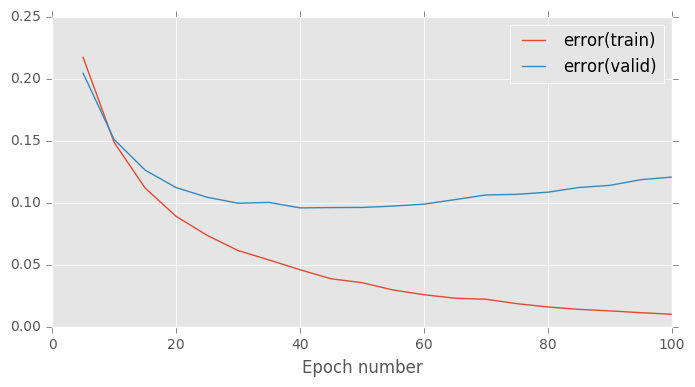

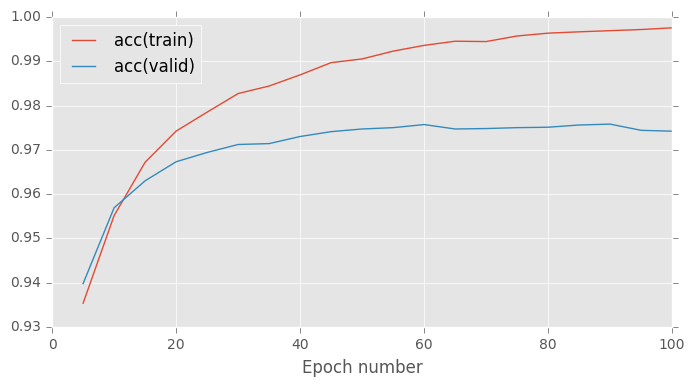

    final error(train) = 1.02e-02
    final error(valid) = 1.21e-01
    final acc(train)   = 9.98e-01
    final acc(valid)   = 9.74e-01
    run time per epoch = 1.87s


final errors (train): 
[[ 0.01022627         inf         inf]
 [        inf         inf         inf]
 [        inf         inf         inf]]


final errors (valid): 
[[ 0.12088047         inf         inf]
 [        inf         inf         inf]
 [        inf         inf         inf]]


final accuracy (train): 
[[ 0.99754      inf      inf]
 [     inf      inf      inf]
 [     inf      inf      inf]]


final accuracy (valid): 
[[ 0.9742     inf     inf]
 [    inf     inf     inf]
 [    inf     inf     inf]]


--------------------------------------------------------------------------------
learning_rate=0.000274, beta=0.90
--------------------------------------------------------------------------------


Epoch 5: 1.68s to complete
    error(train)=2.13e-01, acc(train)=9.37e-01, error(valid)=2.02e-01, acc(valid)=9.41e-01
Epoch 10: 1.67s to complete
    error(train)=1.43e-01, acc(train)=9.57e-01, error(valid)=1.48e-01, acc(valid)=9.57e-01
Epoch 15: 1.63s to complete
    error(train)=1.06e-01, acc(train)=9.69e-01, error(valid)=1.23e-01, acc(valid)=9.64e-01
Epoch 20: 1.62s to complete
    error(train)=8.29e-02, acc(train)=9.77e-01, error(valid)=1.08e-01, acc(valid)=9.68e-01
Epoch 25: 1.63s to complete
    error(train)=6.72e-02, acc(train)=9.81e-01, error(valid)=1.00e-01, acc(valid)=9.71e-01
Epoch 30: 1.72s to complete
    error(train)=5.47e-02, acc(train)=9.85e-01, error(valid)=9.55e-02, acc(valid)=9.72e-01
Epoch 35: 1.65s to complete
    error(train)=4.68e-02, acc(train)=9.87e-01, error(valid)=9.63e-02, acc(valid)=9.73e-01
Epoch 40: 1.63s to complete
    error(train)=3.84e-02, acc(train)=9.89e-01, error(valid)=9.20e-02, acc(valid)=9.75e-01
Epoch 45: 1.67s to complete
    error(train)=3.13

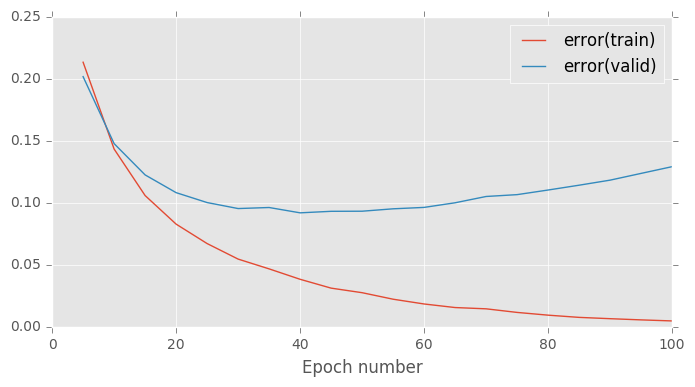

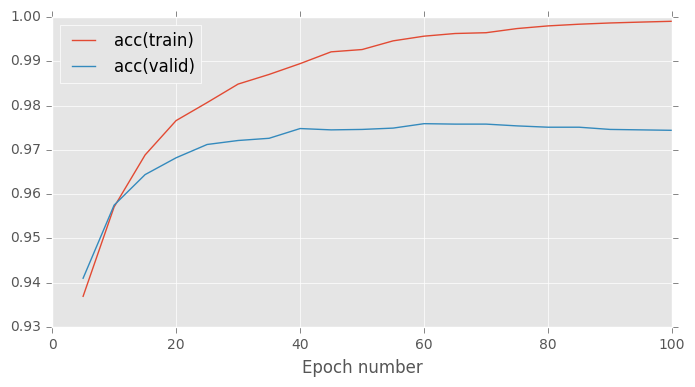

    final error(train) = 4.85e-03
    final error(valid) = 1.29e-01
    final acc(train)   = 9.99e-01
    final acc(valid)   = 9.74e-01
    run time per epoch = 1.88s


final errors (train): 
[[ 0.01022627  0.00484668         inf]
 [        inf         inf         inf]
 [        inf         inf         inf]]


final errors (valid): 
[[ 0.12088047  0.12926293         inf]
 [        inf         inf         inf]
 [        inf         inf         inf]]


final accuracy (train): 
[[ 0.99754  0.99902      inf]
 [     inf      inf      inf]
 [     inf      inf      inf]]


final accuracy (valid): 
[[ 0.9742  0.9744     inf]
 [    inf     inf     inf]
 [    inf     inf     inf]]


--------------------------------------------------------------------------------
learning_rate=0.000274, beta=0.95
--------------------------------------------------------------------------------


Epoch 5: 1.71s to complete
    error(train)=2.09e-01, acc(train)=9.38e-01, error(valid)=1.99e-01, acc(valid)=9.42e-01
Epoch 10: 1.67s to complete
    error(train)=1.37e-01, acc(train)=9.59e-01, error(valid)=1.44e-01, acc(valid)=9.58e-01
Epoch 15: 1.66s to complete
    error(train)=9.87e-02, acc(train)=9.72e-01, error(valid)=1.18e-01, acc(valid)=9.65e-01
Epoch 20: 1.66s to complete
    error(train)=7.53e-02, acc(train)=9.79e-01, error(valid)=1.04e-01, acc(valid)=9.69e-01
Epoch 25: 1.61s to complete
    error(train)=5.89e-02, acc(train)=9.83e-01, error(valid)=9.56e-02, acc(valid)=9.72e-01
Epoch 30: 1.67s to complete
    error(train)=4.62e-02, acc(train)=9.87e-01, error(valid)=9.13e-02, acc(valid)=9.73e-01
Epoch 35: 1.64s to complete
    error(train)=3.78e-02, acc(train)=9.90e-01, error(valid)=9.27e-02, acc(valid)=9.74e-01
Epoch 40: 1.68s to complete
    error(train)=2.90e-02, acc(train)=9.93e-01, error(valid)=8.87e-02, acc(valid)=9.76e-01
Epoch 45: 1.70s to complete
    error(train)=2.22

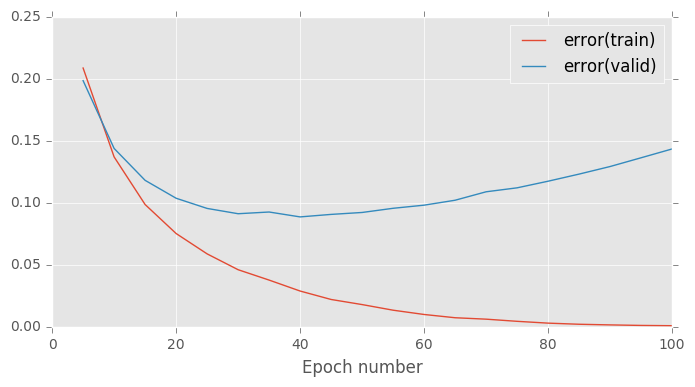

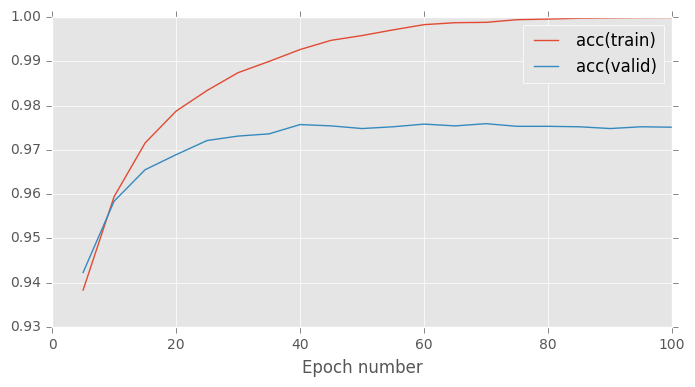

    final error(train) = 9.97e-04
    final error(valid) = 1.44e-01
    final acc(train)   = 1.00e+00
    final acc(valid)   = 9.75e-01
    run time per epoch = 1.84s


final errors (train): 
[[ 0.01022627  0.00484668  0.00099709]
 [        inf         inf         inf]
 [        inf         inf         inf]]


final errors (valid): 
[[ 0.12088047  0.12926293  0.14354705]
 [        inf         inf         inf]
 [        inf         inf         inf]]


final accuracy (train): 
[[ 0.99754  0.99902  0.99986]
 [     inf      inf      inf]
 [     inf      inf      inf]]


final accuracy (valid): 
[[ 0.9742  0.9744  0.9751]
 [    inf     inf     inf]
 [    inf     inf     inf]]


--------------------------------------------------------------------------------
learning_rate=0.000091, beta=0.85
--------------------------------------------------------------------------------


Epoch 5: 1.65s to complete
    error(train)=3.70e-01, acc(train)=9.01e-01, error(valid)=3.40e-01, acc(valid)=9.08e-01
Epoch 10: 1.70s to complete
    error(train)=2.60e-01, acc(train)=9.24e-01, error(valid)=2.42e-01, acc(valid)=9.30e-01
Epoch 15: 1.65s to complete
    error(train)=2.16e-01, acc(train)=9.36e-01, error(valid)=2.04e-01, acc(valid)=9.41e-01
Epoch 20: 1.67s to complete
    error(train)=1.87e-01, acc(train)=9.44e-01, error(valid)=1.80e-01, acc(valid)=9.49e-01
Epoch 25: 1.64s to complete
    error(train)=1.66e-01, acc(train)=9.50e-01, error(valid)=1.62e-01, acc(valid)=9.54e-01
Epoch 30: 1.67s to complete
    error(train)=1.48e-01, acc(train)=9.56e-01, error(valid)=1.50e-01, acc(valid)=9.57e-01
Epoch 35: 1.67s to complete
    error(train)=1.34e-01, acc(train)=9.60e-01, error(valid)=1.40e-01, acc(valid)=9.60e-01
Epoch 40: 1.66s to complete
    error(train)=1.22e-01, acc(train)=9.64e-01, error(valid)=1.31e-01, acc(valid)=9.61e-01
Epoch 45: 1.64s to complete
    error(train)=1.11

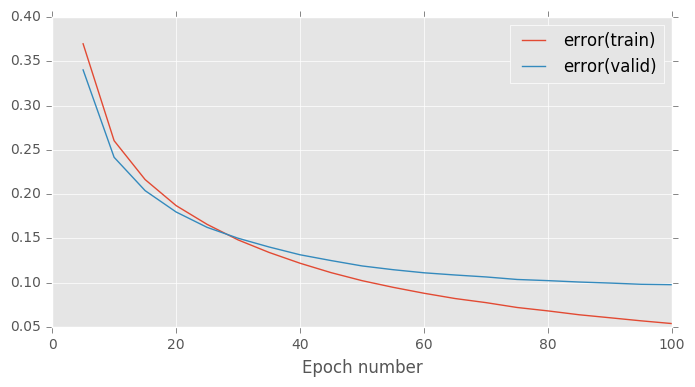

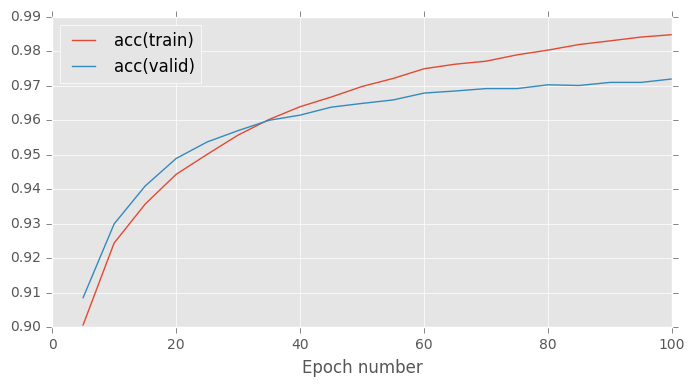

    final error(train) = 5.38e-02
    final error(valid) = 9.77e-02
    final acc(train)   = 9.85e-01
    final acc(valid)   = 9.72e-01
    run time per epoch = 2.07s


final errors (train): 
[[ 0.01022627  0.00484668  0.00099709]
 [ 0.05379265         inf         inf]
 [        inf         inf         inf]]


final errors (valid): 
[[ 0.12088047  0.12926293  0.14354705]
 [ 0.09770163         inf         inf]
 [        inf         inf         inf]]


final accuracy (train): 
[[ 0.99754  0.99902  0.99986]
 [ 0.98486      inf      inf]
 [     inf      inf      inf]]


final accuracy (valid): 
[[ 0.9742  0.9744  0.9751]
 [ 0.972      inf     inf]
 [    inf     inf     inf]]


--------------------------------------------------------------------------------
learning_rate=0.000091, beta=0.90
--------------------------------------------------------------------------------


Epoch 5: 2.04s to complete
    error(train)=3.65e-01, acc(train)=9.01e-01, error(valid)=3.37e-01, acc(valid)=9.09e-01
Epoch 10: 2.00s to complete
    error(train)=2.57e-01, acc(train)=9.26e-01, error(valid)=2.39e-01, acc(valid)=9.30e-01
Epoch 15: 1.95s to complete
    error(train)=2.12e-01, acc(train)=9.37e-01, error(valid)=2.01e-01, acc(valid)=9.43e-01
Epoch 20: 1.76s to complete
    error(train)=1.82e-01, acc(train)=9.46e-01, error(valid)=1.77e-01, acc(valid)=9.50e-01
Epoch 25: 2.22s to complete
    error(train)=1.61e-01, acc(train)=9.52e-01, error(valid)=1.59e-01, acc(valid)=9.55e-01
Epoch 30: 2.02s to complete
    error(train)=1.43e-01, acc(train)=9.58e-01, error(valid)=1.47e-01, acc(valid)=9.58e-01
Epoch 35: 2.04s to complete
    error(train)=1.28e-01, acc(train)=9.62e-01, error(valid)=1.36e-01, acc(valid)=9.61e-01
Epoch 40: 1.84s to complete
    error(train)=1.16e-01, acc(train)=9.66e-01, error(valid)=1.28e-01, acc(valid)=9.63e-01
Epoch 45: 2.59s to complete
    error(train)=1.05

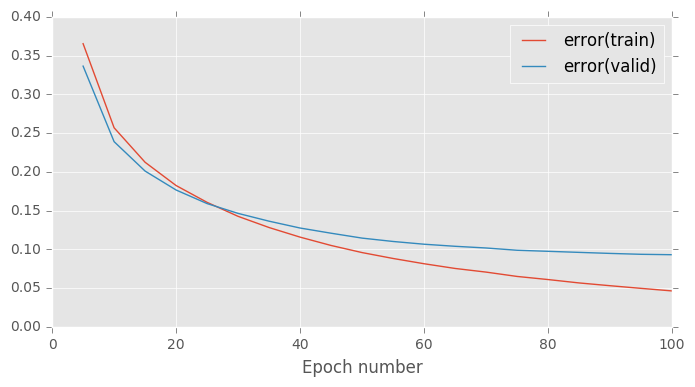

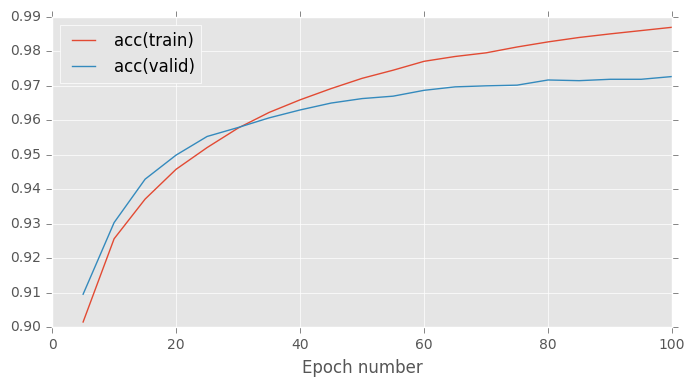

    final error(train) = 4.65e-02
    final error(valid) = 9.32e-02
    final acc(train)   = 9.87e-01
    final acc(valid)   = 9.73e-01
    run time per epoch = 2.29s


final errors (train): 
[[ 0.01022627  0.00484668  0.00099709]
 [ 0.05379265  0.04646767         inf]
 [        inf         inf         inf]]


final errors (valid): 
[[ 0.12088047  0.12926293  0.14354705]
 [ 0.09770163  0.09319776         inf]
 [        inf         inf         inf]]


final accuracy (train): 
[[ 0.99754  0.99902  0.99986]
 [ 0.98486  0.987        inf]
 [     inf      inf      inf]]


final accuracy (valid): 
[[ 0.9742  0.9744  0.9751]
 [ 0.972   0.9727     inf]
 [    inf     inf     inf]]


--------------------------------------------------------------------------------
learning_rate=0.000091, beta=0.95
--------------------------------------------------------------------------------


Epoch 5: 2.01s to complete
    error(train)=3.61e-01, acc(train)=9.03e-01, error(valid)=3.32e-01, acc(valid)=9.11e-01
Epoch 10: 1.69s to complete
    error(train)=2.53e-01, acc(train)=9.27e-01, error(valid)=2.36e-01, acc(valid)=9.32e-01
Epoch 15: 1.66s to complete
    error(train)=2.08e-01, acc(train)=9.39e-01, error(valid)=1.98e-01, acc(valid)=9.44e-01
Epoch 20: 2.10s to complete
    error(train)=1.77e-01, acc(train)=9.48e-01, error(valid)=1.73e-01, acc(valid)=9.51e-01
Epoch 25: 2.33s to complete
    error(train)=1.55e-01, acc(train)=9.54e-01, error(valid)=1.55e-01, acc(valid)=9.57e-01
Epoch 30: 1.86s to complete
    error(train)=1.36e-01, acc(train)=9.60e-01, error(valid)=1.42e-01, acc(valid)=9.59e-01
Epoch 35: 3.32s to complete
    error(train)=1.21e-01, acc(train)=9.65e-01, error(valid)=1.32e-01, acc(valid)=9.62e-01
Epoch 40: 1.95s to complete
    error(train)=1.08e-01, acc(train)=9.69e-01, error(valid)=1.23e-01, acc(valid)=9.65e-01
Epoch 45: 2.29s to complete
    error(train)=9.75

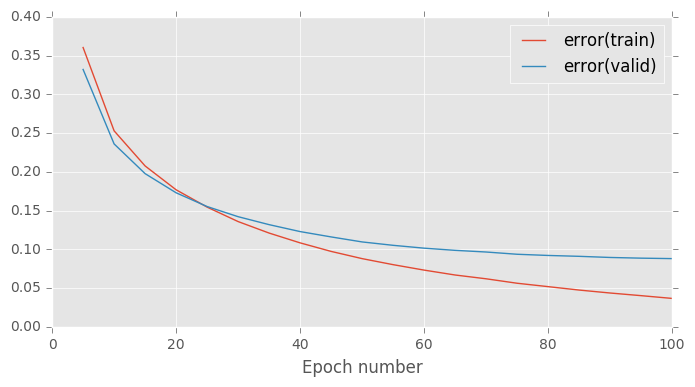

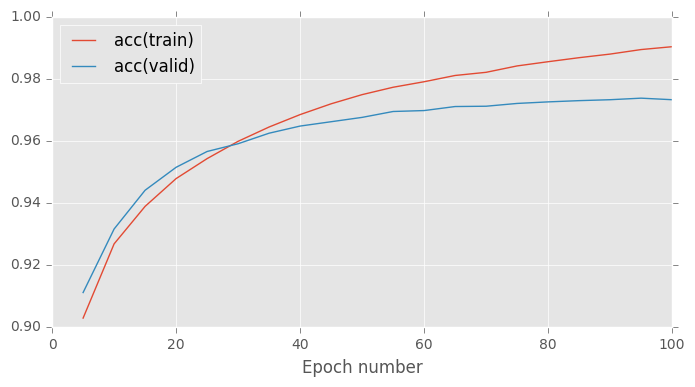

    final error(train) = 3.68e-02
    final error(valid) = 8.82e-02
    final acc(train)   = 9.90e-01
    final acc(valid)   = 9.73e-01
    run time per epoch = 2.30s


final errors (train): 
[[ 0.01022627  0.00484668  0.00099709]
 [ 0.05379265  0.04646767  0.03681406]
 [        inf         inf         inf]]


final errors (valid): 
[[ 0.12088047  0.12926293  0.14354705]
 [ 0.09770163  0.09319776  0.08817466]
 [        inf         inf         inf]]


final accuracy (train): 
[[ 0.99754  0.99902  0.99986]
 [ 0.98486  0.987    0.9904 ]
 [     inf      inf      inf]]


final accuracy (valid): 
[[ 0.9742  0.9744  0.9751]
 [ 0.972   0.9727  0.9733]
 [    inf     inf     inf]]


--------------------------------------------------------------------------------
learning_rate=0.000030, beta=0.85
--------------------------------------------------------------------------------


Epoch 5: 1.72s to complete
    error(train)=8.90e-01, acc(train)=7.97e-01, error(valid)=8.58e-01, acc(valid)=8.20e-01
Epoch 10: 2.30s to complete
    error(train)=4.95e-01, acc(train)=8.77e-01, error(valid)=4.62e-01, acc(valid)=8.90e-01
Epoch 15: 2.25s to complete
    error(train)=3.70e-01, acc(train)=9.00e-01, error(valid)=3.41e-01, acc(valid)=9.08e-01
Epoch 20: 2.65s to complete
    error(train)=3.14e-01, acc(train)=9.12e-01, error(valid)=2.89e-01, acc(valid)=9.19e-01
Epoch 25: 2.46s to complete
    error(train)=2.82e-01, acc(train)=9.19e-01, error(valid)=2.60e-01, acc(valid)=9.26e-01
Epoch 30: 2.72s to complete
    error(train)=2.59e-01, acc(train)=9.24e-01, error(valid)=2.40e-01, acc(valid)=9.29e-01
Epoch 35: 2.79s to complete
    error(train)=2.42e-01, acc(train)=9.29e-01, error(valid)=2.25e-01, acc(valid)=9.34e-01
Epoch 40: 2.96s to complete
    error(train)=2.28e-01, acc(train)=9.33e-01, error(valid)=2.13e-01, acc(valid)=9.37e-01
Epoch 45: 1.72s to complete
    error(train)=2.15

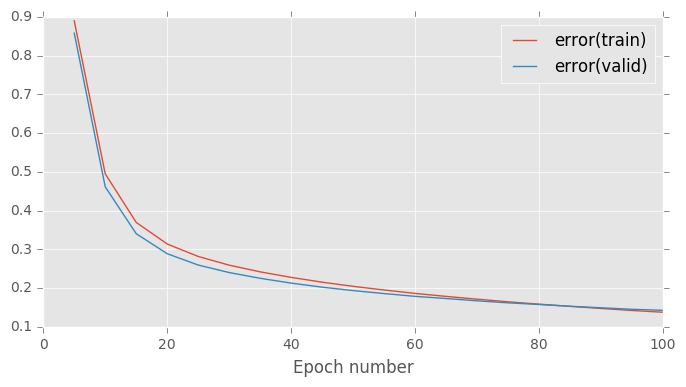

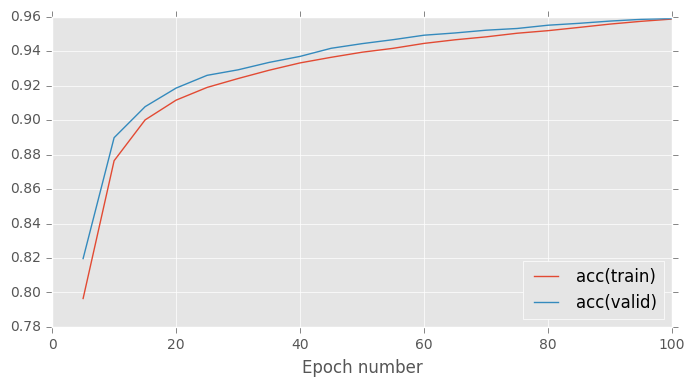

    final error(train) = 1.38e-01
    final error(valid) = 1.43e-01
    final acc(train)   = 9.59e-01
    final acc(valid)   = 9.59e-01
    run time per epoch = 2.37s


final errors (train): 
[[ 0.01022627  0.00484668  0.00099709]
 [ 0.05379265  0.04646767  0.03681406]
 [ 0.13790882         inf         inf]]


final errors (valid): 
[[ 0.12088047  0.12926293  0.14354705]
 [ 0.09770163  0.09319776  0.08817466]
 [ 0.1428466          inf         inf]]


final accuracy (train): 
[[ 0.99754  0.99902  0.99986]
 [ 0.98486  0.987    0.9904 ]
 [ 0.95878      inf      inf]]


final accuracy (valid): 
[[ 0.9742  0.9744  0.9751]
 [ 0.972   0.9727  0.9733]
 [ 0.9591     inf     inf]]


--------------------------------------------------------------------------------
learning_rate=0.000030, beta=0.90
--------------------------------------------------------------------------------


Epoch 5: 2.11s to complete
    error(train)=8.80e-01, acc(train)=7.99e-01, error(valid)=8.48e-01, acc(valid)=8.22e-01
Epoch 10: 1.88s to complete
    error(train)=4.89e-01, acc(train)=8.78e-01, error(valid)=4.56e-01, acc(valid)=8.91e-01
Epoch 15: 1.75s to complete
    error(train)=3.66e-01, acc(train)=9.01e-01, error(valid)=3.37e-01, acc(valid)=9.10e-01
Epoch 20: 1.67s to complete
    error(train)=3.11e-01, acc(train)=9.13e-01, error(valid)=2.86e-01, acc(valid)=9.20e-01
Epoch 25: 1.82s to complete
    error(train)=2.79e-01, acc(train)=9.20e-01, error(valid)=2.57e-01, acc(valid)=9.26e-01
Epoch 30: 2.04s to complete
    error(train)=2.56e-01, acc(train)=9.26e-01, error(valid)=2.38e-01, acc(valid)=9.30e-01
Epoch 35: 2.81s to complete
    error(train)=2.39e-01, acc(train)=9.30e-01, error(valid)=2.23e-01, acc(valid)=9.35e-01
Epoch 40: 2.18s to complete
    error(train)=2.24e-01, acc(train)=9.35e-01, error(valid)=2.10e-01, acc(valid)=9.38e-01
Epoch 45: 2.57s to complete
    error(train)=2.12

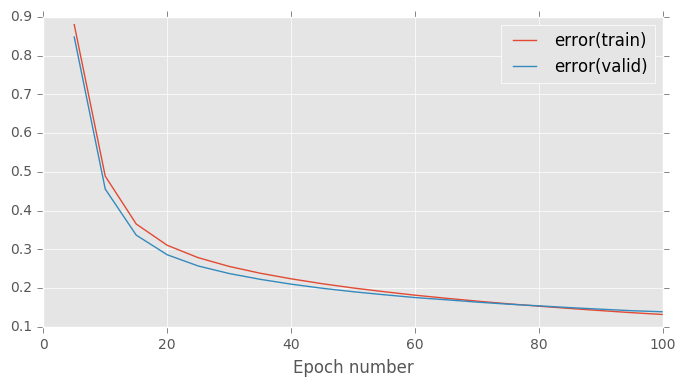

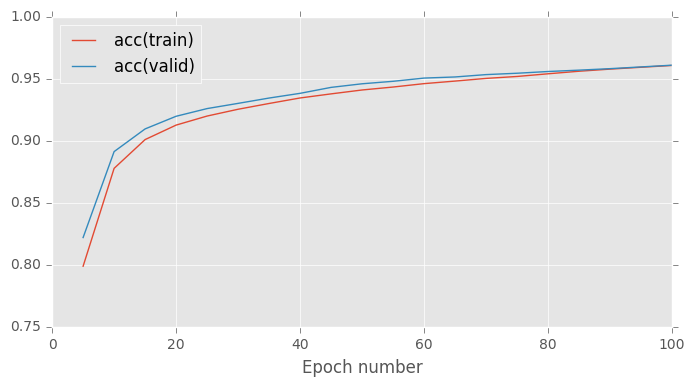

    final error(train) = 1.32e-01
    final error(valid) = 1.39e-01
    final acc(train)   = 9.61e-01
    final acc(valid)   = 9.61e-01
    run time per epoch = 2.38s


final errors (train): 
[[ 0.01022627  0.00484668  0.00099709]
 [ 0.05379265  0.04646767  0.03681406]
 [ 0.13790882  0.13210032         inf]]


final errors (valid): 
[[ 0.12088047  0.12926293  0.14354705]
 [ 0.09770163  0.09319776  0.08817466]
 [ 0.1428466   0.13905222         inf]]


final accuracy (train): 
[[ 0.99754  0.99902  0.99986]
 [ 0.98486  0.987    0.9904 ]
 [ 0.95878  0.96088      inf]]


final accuracy (valid): 
[[ 0.9742  0.9744  0.9751]
 [ 0.972   0.9727  0.9733]
 [ 0.9591  0.9611     inf]]


--------------------------------------------------------------------------------
learning_rate=0.000030, beta=0.95
--------------------------------------------------------------------------------


Epoch 5: 2.25s to complete
    error(train)=8.68e-01, acc(train)=8.02e-01, error(valid)=8.36e-01, acc(valid)=8.25e-01
Epoch 10: 1.89s to complete
    error(train)=4.82e-01, acc(train)=8.80e-01, error(valid)=4.49e-01, acc(valid)=8.93e-01
Epoch 15: 1.95s to complete
    error(train)=3.61e-01, acc(train)=9.03e-01, error(valid)=3.33e-01, acc(valid)=9.11e-01
Epoch 20: 1.97s to complete
    error(train)=3.07e-01, acc(train)=9.14e-01, error(valid)=2.83e-01, acc(valid)=9.21e-01
Epoch 25: 1.90s to complete
    error(train)=2.75e-01, acc(train)=9.21e-01, error(valid)=2.54e-01, acc(valid)=9.27e-01
Epoch 30: 1.94s to complete
    error(train)=2.52e-01, acc(train)=9.27e-01, error(valid)=2.35e-01, acc(valid)=9.32e-01
Epoch 35: 1.96s to complete
    error(train)=2.34e-01, acc(train)=9.32e-01, error(valid)=2.20e-01, acc(valid)=9.36e-01
Epoch 40: 2.29s to complete
    error(train)=2.20e-01, acc(train)=9.36e-01, error(valid)=2.07e-01, acc(valid)=9.40e-01
Epoch 45: 1.97s to complete
    error(train)=2.07

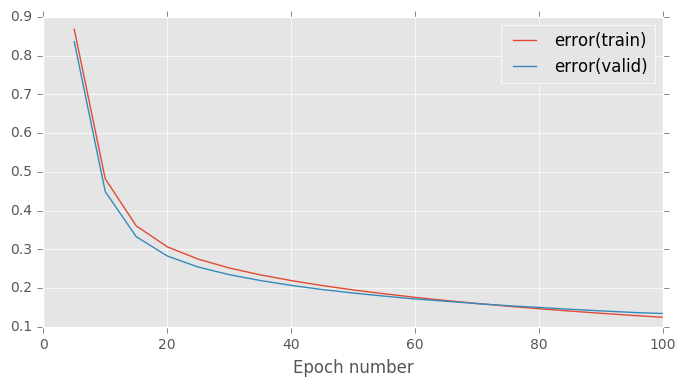

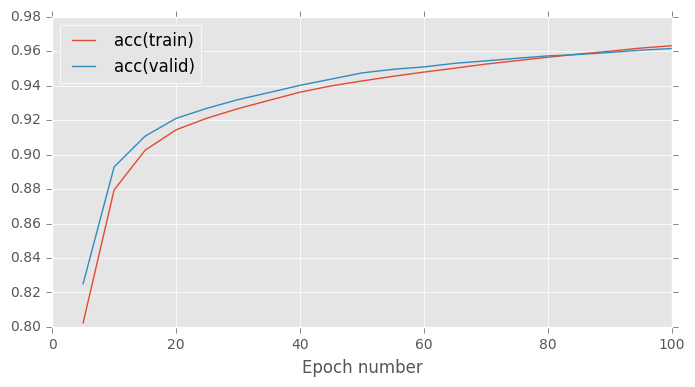

    final error(train) = 1.25e-01
    final error(valid) = 1.35e-01
    final acc(train)   = 9.63e-01
    final acc(valid)   = 9.62e-01
    run time per epoch = 2.18s


final errors (train): 
[[ 0.01022627  0.00484668  0.00099709]
 [ 0.05379265  0.04646767  0.03681406]
 [ 0.13790882  0.13210032  0.12492855]]


final errors (valid): 
[[ 0.12088047  0.12926293  0.14354705]
 [ 0.09770163  0.09319776  0.08817466]
 [ 0.1428466   0.13905222  0.13453742]]


final accuracy (train): 
[[ 0.99754  0.99902  0.99986]
 [ 0.98486  0.987    0.9904 ]
 [ 0.95878  0.96088  0.9633 ]]


final accuracy (valid): 
[[ 0.9742  0.9744  0.9751]
 [ 0.972   0.9727  0.9733]
 [ 0.9591  0.9611  0.9617]]




In [12]:
from mlp.learning_rules import RMSPropLearningRule

# Set training run hyperparameters
batch_size = 50  # number of data points in a batch
num_epochs = 100  # number of training epochs to perform
stats_interval = 5  # epoch interval between recording and printing stats
# learning_rate = 0.005  # learning rate for gradient descent
input_dim, output_dim, hidden_dim = 784, 10, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

init_scale = 0.1  # scale for random parameter initialisation

# learning_rates = [0.0001, 0.0001/3**1, 0.0001/3**2]  # scale for random parameter initialisation
learning_rates = [0.2/3**6, 0.2/3**7, 0.2/3**8]  # scale for random parameter initialisation
betas = [0.85, 0.90, 0.95]
# betas = [0.9]

initial_error_matrix = np.ones((len(learning_rates), len(betas)), dtype='float') * float('inf')

init_scale = 0.1  # scale for random parameter initialisation
final_errors_train_rms = initial_error_matrix.copy()
final_errors_valid_rms = initial_error_matrix.copy()
final_accs_train_rms = initial_error_matrix.copy()
final_accs_valid_rms = initial_error_matrix.copy()
index_values_rms = initial_error_matrix.copy()
run_time_rms = initial_error_matrix.copy()

for l_idx, learning_rate in enumerate(learning_rates):
    for b_idx, beta in enumerate(betas):
        
        # Iterate over momentum coefficients
        schedulers = [ConstantLearningRateScheduler(learning_rate)]

        print('-' * 80)
        print('learning_rate={0:.6f}, beta={1:.2f}'
              .format(learning_rate, beta))
        print('-' * 80)

        # Reset random number generator and data provider states on each run
        # to ensure reproducibility of results
        rng.seed(seed)
        train_data.reset()
        valid_data.reset()

        # Alter data-provider batch size
        train_data.batch_size = batch_size 
        valid_data.batch_size = batch_size

        # Create a parameter initialiser which will sample random uniform values
        # from [-init_scale, init_scale]
        param_init = UniformInit(-init_scale, init_scale, rng=rng)

        # Create a model with two affine layers
        hidden_dim = 100
        model = MultipleLayerModel([
            AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
            SigmoidLayer(),
            AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
        ])

        # Initialise a cross entropy error object
        error = CrossEntropySoftmaxError()
        
        # Use a basic gradient descent learning rule
        learning_rule = RMSPropLearningRule(learning_rate=learning_rate, beta=beta)

        stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, schedulers)

        plt.show()

        # Print stats for all 
        print('    final error(train) = {0:.2e}').format(stats[-1, keys['error(train)']])
        print('    final error(valid) = {0:.2e}').format(stats[-1, keys['error(valid)']])
        print('    final acc(train)   = {0:.2e}').format(stats[-1, keys['acc(train)']])
        print('    final acc(valid)   = {0:.2e}').format(stats[-1, keys['acc(valid)']])
        print('    run time per epoch = {0:.2f}s').format(run_time * 1. / num_epochs)
        
        final_errors_train_rms[l_idx, b_idx] = stats[-1, keys['error(train)']]
        final_errors_valid_rms[l_idx, b_idx] = stats[-1, keys['error(valid)']]
        final_accs_train_rms[l_idx, b_idx] = stats[-1, keys['acc(train)']]
        final_accs_valid_rms[l_idx, b_idx] = stats[-1, keys['acc(valid)']]
        run_time_rms[l_idx, b_idx] = run_time
        
        print '\n'
        
        print 'final errors (train): '
        print final_errors_train_rms
        print '\n'

        print 'final errors (valid): '
        print final_errors_valid_rms
        print '\n'

        print 'final accuracy (train): '
        print final_accs_train_rms
        print '\n'

        print 'final accuracy (valid): '
        print final_accs_valid_rms
        print '\n'
        
        

In [29]:
print '\nLearning rates:'
print learning_rates

print '\nValidation error:'
print final_errors_valid_rms

print '\nValidation accuracy:'
print final_accs_valid_rms

print '\nRun times:'
print run_time_rms


Learning rates:
[0.00027434842249657066, 9.144947416552355e-05, 3.0483158055174518e-05]

Validation error:
[[ 0.12088047  0.12926293  0.14354705]
 [ 0.09770163  0.09319776  0.08817466]
 [ 0.1428466   0.13905222  0.13453742]]

Validation accuracy:
[[ 0.9742  0.9744  0.9751]
 [ 0.972   0.9727  0.9733]
 [ 0.9591  0.9611  0.9617]]

Run times:
[[ 187.40028811  188.03063393  183.96833706]
 [ 207.26649094  228.73774695  230.229877  ]
 [ 236.80075097  237.54897904  217.50494504]]
